In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train.shape

(614, 13)

In [5]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
test.shape

(367, 12)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [10]:
train['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [11]:
train['Gender'] = train['Gender'].fillna(train['Gender'].dropna().mode()[0])

In [12]:
train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [13]:
train['Married'] = train['Married'].fillna(train['Married'].dropna().mode()[0])

In [14]:
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].dropna().mode()[0])

In [15]:
train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].dropna().mode()[0])

In [16]:
train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [17]:
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].dropna().mode()[0])

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [19]:
train[train['LoanAmount'].isna()].index.tolist()

[0,
 35,
 63,
 81,
 95,
 102,
 103,
 113,
 127,
 202,
 284,
 305,
 322,
 338,
 387,
 435,
 437,
 479,
 524,
 550,
 551,
 605]

In [20]:
train.loc[33:35, :]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
33,LP001098,Male,Yes,0,Graduate,No,3500,1667.0,114.0,360.0,1.0,Semiurban,Y
34,LP001100,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y


In [21]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [22]:
from sklearn.ensemble import RandomForestRegressor

imp = IterativeImputer(RandomForestRegressor(), max_iter= 10, random_state= 123 )

In [23]:
data1 = train.loc[:, ['LoanAmount','Loan_Amount_Term']]
data1 = pd.DataFrame(imp.fit_transform(data1), columns= ['LoanAmount','Loan_Amount_Term'] )

In [24]:
data1.loc[33:35, :]

,LoanAmount,Loan_Amount_Term
33,114.0000,360.0
34,320.0000,360.0
35,147.0907,360.0


In [25]:
train['LoanAmount'] = data1['LoanAmount']

In [26]:
train['Loan_Amount_Term'] = data1['Loan_Amount_Term']

In [27]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [29]:
test['Gender'] = test['Gender'].fillna(test['Gender'].dropna().mode()[0])
test['Dependents'] = test['Dependents'].fillna(test['Dependents'].dropna().mode()[0])
test['Self_Employed'] = test['Self_Employed'].fillna(test['Self_Employed'].dropna().mode()[0])
test['Credit_History'] = test['Credit_History'].fillna(test['Credit_History'].dropna().mode()[0])

In [30]:
data2 = test.loc[:, ['LoanAmount','Loan_Amount_Term']]

test_imp = IterativeImputer(RandomForestRegressor(), max_iter=10, random_state=123)
data2 = pd.DataFrame(test_imp.fit_transform(data2), columns = ['LoanAmount','Loan_Amount_term'])

In [31]:
test['LoanAmount'] = data2['LoanAmount']
test['Loan_Amount_Term'] = data2['Loan_Amount_term']

In [32]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [33]:
data = pd.concat([train,test])

In [34]:
data.shape

(981, 13)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             981 non-null    object 
 2   Married            981 non-null    object 
 3   Dependents         981 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      981 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         981 non-null    float64
 9   Loan_Amount_Term   981 non-null    float64
 10  Credit_History     981 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [36]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,147.0907,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0000,360.0,1.0,Urban,Y


In [37]:
data.drop(['Loan_ID'], axis = 1 , inplace=True)

In [38]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,147.0907,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0000,360.0,1.0,Urban,Y


In [39]:
for i in [data]:
    i['Gender'] = i['Gender'].map({'Male': 0, 'Female': 1})
    i['Education'] = i['Education'].map({'Not Graduate': 0, 'Graduate': 1})
    i['Married'] = i['Married'].map({'No' : 0, 'Yes': 1})
    i['Self_Employed'] = i['Self_Employed'].map({'No' : 0, 'Yes' : 1})
    i['Property_Area'] = i['Property_Area'].map({'Urban': 0,'Rural': 1})
    i['Dependents'] = i['Dependents'].map({'0': 0, '1': 1, '2': 2,'3+': 3})

In [40]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,147.0907,360.0,1.0,0.0,Y
1,0,1,1,1,0,4583,1508.0,128.0000,360.0,1.0,1.0,N
2,0,1,0,1,1,3000,0.0,66.0000,360.0,1.0,0.0,Y
3,0,1,0,0,0,2583,2358.0,120.0000,360.0,1.0,0.0,Y
4,0,0,0,1,0,6000,0.0,141.0000,360.0,1.0,0.0,Y


In [41]:
np.dtype(data['Property_Area'])

dtype('float64')

In [42]:
data['Property_Area'].isna().sum()

349

In [43]:
data['Property_Area'] = data['Property_Area'].fillna(data['Property_Area'].dropna().mode()[0])

In [44]:
data['Property_Area'].isna().sum()

0

In [45]:
data['Property_Area'] = data['Property_Area'].astype(int)

In [46]:
data['Credit_History'] = data['Credit_History'].astype(int)

In [47]:
data['Loan_Status'] = data['Loan_Status'].map({'N': 0,'Y': 1})

In [48]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,147.0907,360.0,1,0,1.0
1,0,1,1,1,0,4583,1508.0,128.0000,360.0,1,1,0.0
2,0,1,0,1,1,3000,0.0,66.0000,360.0,1,0,1.0
3,0,1,0,0,0,2583,2358.0,120.0000,360.0,1,0,1.0
4,0,0,0,1,0,6000,0.0,141.0000,360.0,1,0,1.0


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

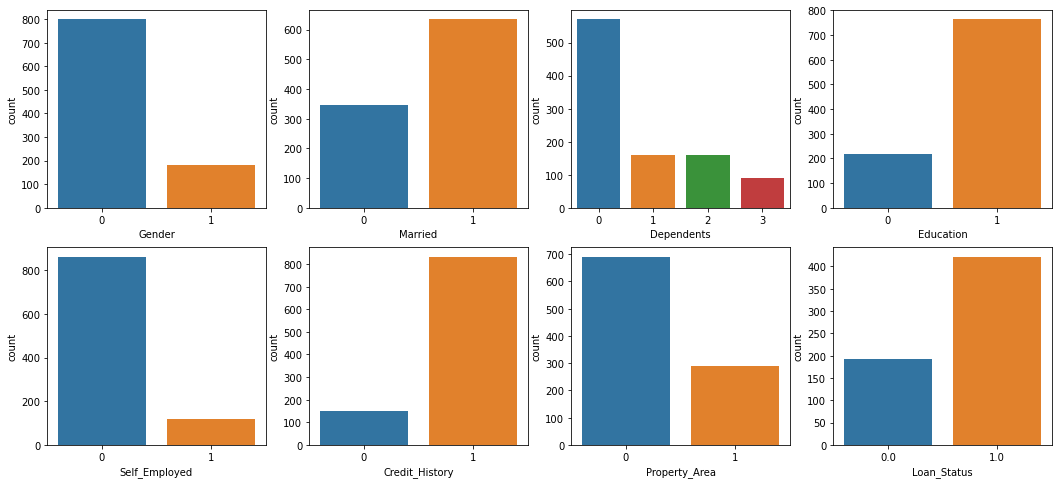

In [49]:
fig, ax = plt.subplots(2,4, figsize = [18,8])
sns.countplot('Gender',data= data, ax=ax[0][0])
sns.countplot('Married', data= data, ax= ax[0][1])
sns.countplot('Dependents', data= data, ax= ax[0][2])
sns.countplot('Education', data= data, ax= ax[0][3])
sns.countplot('Self_Employed', data= data, ax= ax[1][0])
sns.countplot('Credit_History', data= data, ax= ax[1][1])
sns.countplot('Property_Area', data= data, ax= ax[1][2])
sns.countplot('Loan_Status', data= data, ax= ax[1][3])

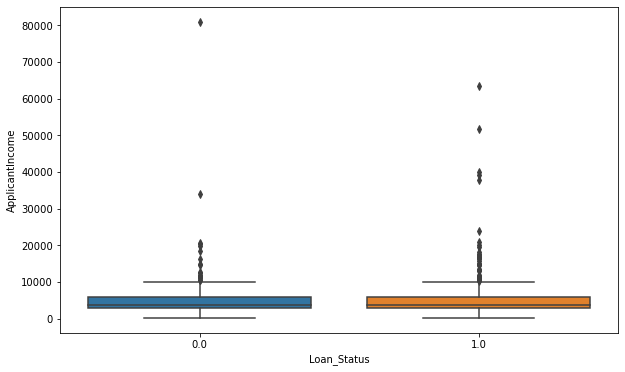

In [50]:
plt.figure(figsize = [10,6])
sns.boxplot(x='Loan_Status', y= 'ApplicantIncome', data= data)
plt.show()

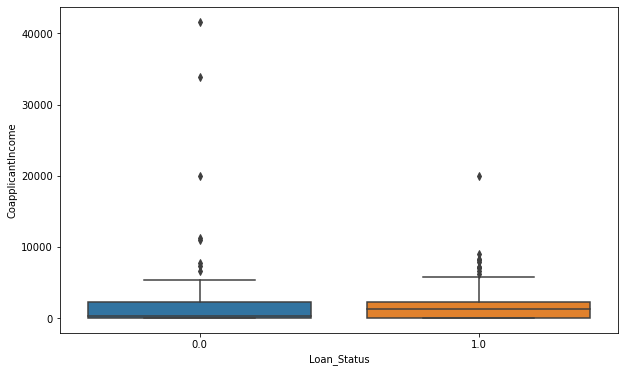

In [51]:
plt.figure(figsize = [10,6])
sns.boxplot(x='Loan_Status', y= 'CoapplicantIncome', data= data)
plt.show()

<Figure size 720x432 with 0 Axes>

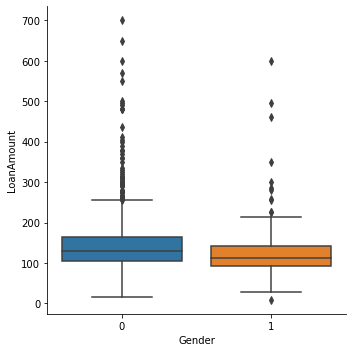

In [52]:
plt.figure(figsize=[10,6])
sns.catplot(x='Gender', y = 'LoanAmount', data=data, kind= 'box')
plt.show()

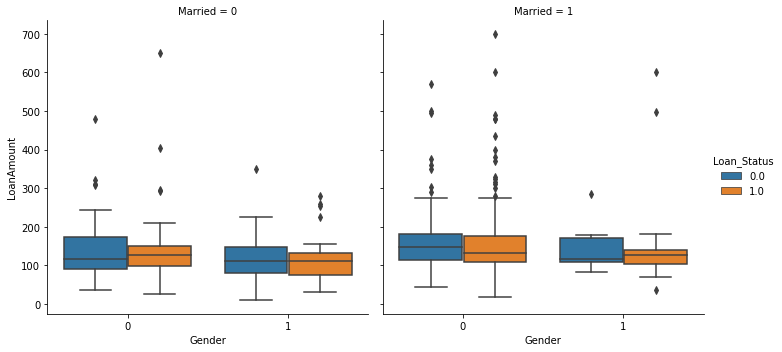

In [53]:
sns.catplot(x= 'Gender', y= 'LoanAmount', data= data, kind= 'box', hue= 'Loan_Status', col='Married' )

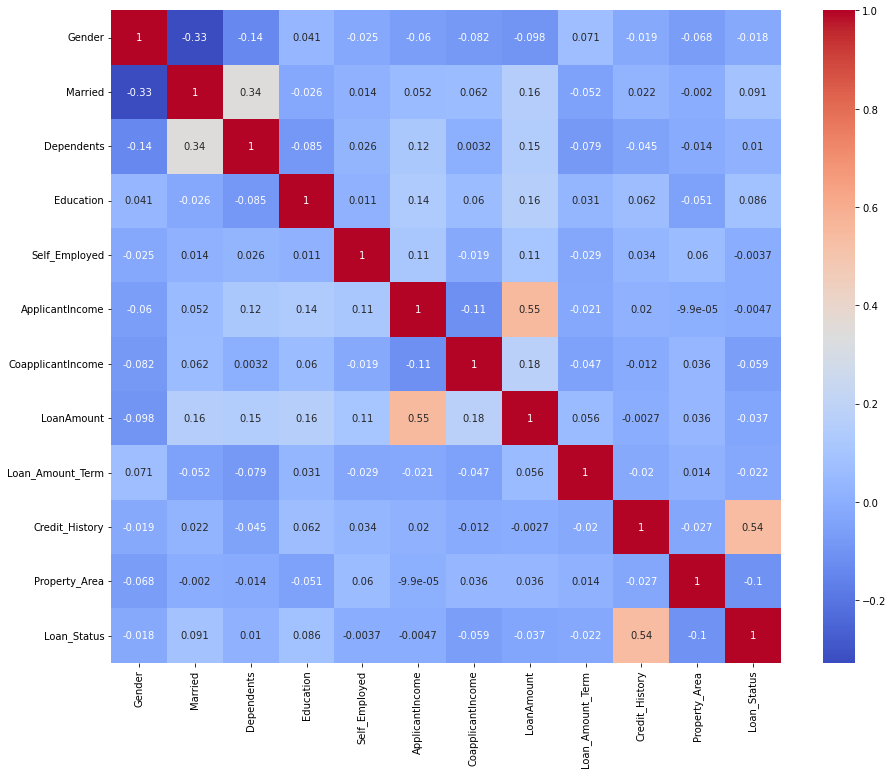

In [54]:
plt.figure(figsize=[15,12])
sns.heatmap(data= data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [55]:
data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']

In [56]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,0,0,0,1,0,5849,0.0,147.0907,360.0,1,0,1.0,5849.0
1,0,1,1,1,0,4583,1508.0,128.0000,360.0,1,1,0.0,6091.0
2,0,1,0,1,1,3000,0.0,66.0000,360.0,1,0,1.0,3000.0
3,0,1,0,0,0,2583,2358.0,120.0000,360.0,1,0,1.0,4941.0
4,0,0,0,1,0,6000,0.0,141.0000,360.0,1,0,1.0,6000.0


In [57]:
r = 0.00833
data['EMI'] = data.apply(lambda x: (x['LoanAmount'] *r*((1+r)**x['Loan_Amount_Term']))/((1+r)**((x['Loan_Amount_Term'])-1)), axis=1)

In [58]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,EMI
0,0,0,0,1,0,5849,0.0,147.0907,360.0,1,0,1.0,5849.0,1.235472
1,0,1,1,1,0,4583,1508.0,128.0000,360.0,1,1,0.0,6091.0,1.075122
2,0,1,0,1,1,3000,0.0,66.0000,360.0,1,0,1.0,3000.0,0.554360
3,0,1,0,0,0,2583,2358.0,120.0000,360.0,1,0,1.0,4941.0,1.007927
4,0,0,0,1,0,6000,0.0,141.0000,360.0,1,0,1.0,6000.0,1.184314


In [59]:
data['Depedents_EMI_mean'] = data.groupby(['Dependents'])['EMI'].transform('mean')

In [60]:
data['LoanAmount_per_TotalIncome'] = data['LoanAmount']/data['TotalIncome']

In [61]:
data['Loan_Amount_Term_per_TotalIncome'] = data['Loan_Amount_Term']/data['TotalIncome']

In [62]:
data['EMI_per_LoanAmount'] = data['EMI']/data['LoanAmount']
data['EMI_per_Loan_Amount_term'] = data['EMI']/data['LoanAmount']

In [63]:
data['Property_Area_LoanAmount_per_TotalIncome_mean'] = data.groupby(['Property_Area'])['LoanAmount_per_TotalIncome'].transform('mean')

In [64]:
data['Credit_History_TotalIncome_sum'] = data.groupby(['Credit_History'])['TotalIncome'].transform('sum')

In [65]:
data['Dependents_LoanAmount_sum'] = data.groupby(['Dependents'])['LoanAmount'].transform('sum')

In [66]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,TotalIncome,EMI,Depedents_EMI_mean,LoanAmount_per_TotalIncome,Loan_Amount_Term_per_TotalIncome,EMI_per_LoanAmount,EMI_per_Loan_Amount_term,Property_Area_LoanAmount_per_TotalIncome_mean,Credit_History_TotalIncome_sum,Dependents_LoanAmount_sum
0,0,0,0,1,0,5849,0.0,147.0907,360.0,1,...,5849.0,1.235472,1.122923,0.025148,0.061549,0.008399,0.008399,0.024230,5.678538e+06,76203.915288
1,0,1,1,1,0,4583,1508.0,128.0000,360.0,1,...,6091.0,1.075122,1.253278,0.021015,0.059104,0.008399,0.008399,0.023997,5.678538e+06,23873.702813
2,0,1,0,1,1,3000,0.0,66.0000,360.0,1,...,3000.0,0.554360,1.122923,0.022000,0.120000,0.008399,0.008399,0.024230,5.678538e+06,76203.915288
3,0,1,0,0,0,2583,2358.0,120.0000,360.0,1,...,4941.0,1.007927,1.122923,0.024287,0.072860,0.008399,0.008399,0.024230,5.678538e+06,76203.915288
4,0,0,0,1,0,6000,0.0,141.0000,360.0,1,...,6000.0,1.184314,1.122923,0.023500,0.060000,0.008399,0.008399,0.024230,5.678538e+06,76203.915288


In [67]:
from sklearn.preprocessing import KBinsDiscretizer

In [68]:
Loan_Amount_Term_Discretizer = KBinsDiscretizer(n_bins= 5, encode='ordinal', strategy='quantile')
data['Loan_Amount_term_Bins'] = Loan_Amount_Term_Discretizer.fit_transform(data['Loan_Amount_Term'].values.reshape(-1,1)).astype(float)

In [69]:
TotalIncome_Descritizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
data['TotalIncome_Bins'] = TotalIncome_Descritizer.fit_transform(data['TotalIncome'].values.reshape(-1,1)).astype(float)

In [70]:
LoanAmount_per_TotalIncome_Descritizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
data['LoanAmount_per_TotalIncome_Bins'] = LoanAmount_per_TotalIncome_Descritizer.fit_transform(data['LoanAmount_per_TotalIncome'].values.reshape(-1,1)).astype(float)

In [71]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,LoanAmount_per_TotalIncome,Loan_Amount_Term_per_TotalIncome,EMI_per_LoanAmount,EMI_per_Loan_Amount_term,Property_Area_LoanAmount_per_TotalIncome_mean,Credit_History_TotalIncome_sum,Dependents_LoanAmount_sum,Loan_Amount_term_Bins,TotalIncome_Bins,LoanAmount_per_TotalIncome_Bins
0,0,0,0,1,0,5849,0.0,147.0907,360.0,1,...,0.025148,0.061549,0.008399,0.008399,0.024230,5.678538e+06,76203.915288,1.0,2.0,2.0
1,0,1,1,1,0,4583,1508.0,128.0000,360.0,1,...,0.021015,0.059104,0.008399,0.008399,0.023997,5.678538e+06,23873.702813,1.0,3.0,1.0
2,0,1,0,1,1,3000,0.0,66.0000,360.0,1,...,0.022000,0.120000,0.008399,0.008399,0.024230,5.678538e+06,76203.915288,1.0,0.0,1.0
3,0,1,0,0,0,2583,2358.0,120.0000,360.0,1,...,0.024287,0.072860,0.008399,0.008399,0.024230,5.678538e+06,76203.915288,1.0,2.0,2.0
4,0,0,0,1,0,6000,0.0,141.0000,360.0,1,...,0.023500,0.060000,0.008399,0.008399,0.024230,5.678538e+06,76203.915288,1.0,3.0,2.0


In [72]:
data = data.drop(['EMI','TotalIncome','LoanAmount_per_TotalIncome'], axis=1)

In [73]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,Depedents_EMI_mean,Loan_Amount_Term_per_TotalIncome,EMI_per_LoanAmount,EMI_per_Loan_Amount_term,Property_Area_LoanAmount_per_TotalIncome_mean,Credit_History_TotalIncome_sum,Dependents_LoanAmount_sum,Loan_Amount_term_Bins,TotalIncome_Bins,LoanAmount_per_TotalIncome_Bins
0,0,0,0,1,0,5849,0.0,147.0907,360.0,1,...,1.122923,0.061549,0.008399,0.008399,0.024230,5.678538e+06,76203.915288,1.0,2.0,2.0
1,0,1,1,1,0,4583,1508.0,128.0000,360.0,1,...,1.253278,0.059104,0.008399,0.008399,0.023997,5.678538e+06,23873.702813,1.0,3.0,1.0
2,0,1,0,1,1,3000,0.0,66.0000,360.0,1,...,1.122923,0.120000,0.008399,0.008399,0.024230,5.678538e+06,76203.915288,1.0,0.0,1.0
3,0,1,0,0,0,2583,2358.0,120.0000,360.0,1,...,1.122923,0.072860,0.008399,0.008399,0.024230,5.678538e+06,76203.915288,1.0,2.0,2.0
4,0,0,0,1,0,6000,0.0,141.0000,360.0,1,...,1.122923,0.060000,0.008399,0.008399,0.024230,5.678538e+06,76203.915288,1.0,3.0,2.0


In [74]:
train_df = data[:614]
test_df = data[614:]

In [75]:
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,Depedents_EMI_mean,Loan_Amount_Term_per_TotalIncome,EMI_per_LoanAmount,EMI_per_Loan_Amount_term,Property_Area_LoanAmount_per_TotalIncome_mean,Credit_History_TotalIncome_sum,Dependents_LoanAmount_sum,Loan_Amount_term_Bins,TotalIncome_Bins,LoanAmount_per_TotalIncome_Bins
0,0,0,0,1,0,5849,0.0,147.0907,360.0,1,...,1.122923,0.061549,0.008399,0.008399,0.024230,5.678538e+06,76203.915288,1.0,2.0,2.0
1,0,1,1,1,0,4583,1508.0,128.0000,360.0,1,...,1.253278,0.059104,0.008399,0.008399,0.023997,5.678538e+06,23873.702813,1.0,3.0,1.0
2,0,1,0,1,1,3000,0.0,66.0000,360.0,1,...,1.122923,0.120000,0.008399,0.008399,0.024230,5.678538e+06,76203.915288,1.0,0.0,1.0
3,0,1,0,0,0,2583,2358.0,120.0000,360.0,1,...,1.122923,0.072860,0.008399,0.008399,0.024230,5.678538e+06,76203.915288,1.0,2.0,2.0
4,0,0,0,1,0,6000,0.0,141.0000,360.0,1,...,1.122923,0.060000,0.008399,0.008399,0.024230,5.678538e+06,76203.915288,1.0,3.0,2.0


In [76]:
train_df.shape

(614, 22)

In [77]:
train_df['Loan_Status'] = train_df['Loan_Status'].astype(int)

In [78]:
test_df.shape

(367, 22)

In [79]:
test_df.drop(['Loan_Status'], axis=1, inplace=True)

In [80]:
test_df.shape

(367, 21)

In [81]:
x = train_df.drop(['Loan_Status'], axis=1)
y = train_df['Loan_Status']

In [82]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= 0.7, random_state=123)

In [83]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((429, 21), (429,), (185, 21), (185,))

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score

In [85]:
lr_r = LogisticRegression()
lr_r.fit(x_train, y_train)

LogisticRegression()

In [86]:
train_pred_ = lr_r.predict(x_train)
print("Train accuracy = ", accuracy_score(train_pred_, y_train))

Train accuracy =  0.8275058275058275


In [87]:
test_pred = lr_r.predict(x_test)
print("Test accuracy = ", accuracy_score(test_pred, y_test))

Test accuracy =  0.7513513513513513


In [88]:
test_pred_ = lr_r.predict(test_df)
predData01 = pd.DataFrame(test_pred_)
test_val = pd.read_csv('sample_submission.csv')

In [89]:
Dataset01 = pd.concat([test_val['Loan_ID'], predData01], axis=1)
Dataset01.columns = test_val.columns
Dataset01['Loan_Status'] = Dataset01['Loan_Status'].map({0.0 : 'N', 1.0 : 'Y'})

In [90]:
Dataset01.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [91]:
Dataset01.to_csv('sample_submission01.csv', index= False)

In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
param_ = {'C' : [0.001,0.01,0.1, 10, 100, 1000],
         'penalty': ['l1', 'l2'],
         'max_iter': list(range(100,800,100)),
         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] }

In [94]:
lr_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_, refit=True, verbose=123, cv=5)

In [95]:
lr_search.fit(x_train, y_train)

Fitting 5 folds for each of 420 candidates, totalling 2100 fits
[CV 1/5; 1/420] START C=0.001, max_iter=100, penalty=l1, solver=newton-cg.......
[CV 1/5; 1/420] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5; 1/420] START C=0.001, max_iter=100, penalty=l1, solver=newton-cg.......
[CV 2/5; 1/420] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5; 1/420] START C=0.001, max_iter=100, penalty=l1, solver=newton-cg.......
[CV 3/5; 1/420] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5; 1/420] START C=0.001, max_iter=100, penalty=l1, solver=newton-cg.......
[CV 4/5; 1/420] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5; 1/420] START C=0.001, max_iter=100, penalty=l1, solver=newton-cg.......
[CV 5/5; 1/420] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5; 2/420] 

[CV 1/5; 11/420] END C=0.001, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5; 11/420] START C=0.001, max_iter=200, penalty=l1, solver=newton-cg......
[CV 2/5; 11/420] END C=0.001, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5; 11/420] START C=0.001, max_iter=200, penalty=l1, solver=newton-cg......
[CV 3/5; 11/420] END C=0.001, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5; 11/420] START C=0.001, max_iter=200, penalty=l1, solver=newton-cg......
[CV 4/5; 11/420] END C=0.001, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5; 11/420] START C=0.001, max_iter=200, penalty=l1, solver=newton-cg......
[CV 5/5; 11/420] END C=0.001, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5; 12/420] START C=0.001, max_iter=200, penalty=l1, solver=lbfgs..........
[CV 1/5; 12/420] END C=0.001, max_iter=200, penalty=l1, solver=lbfgs;, scor

[CV 3/5; 20/420] END C=0.001, max_iter=200, penalty=l2, solver=saga;, score=0.779 total time=   0.0s
[CV 4/5; 20/420] START C=0.001, max_iter=200, penalty=l2, solver=saga...........
[CV 4/5; 20/420] END C=0.001, max_iter=200, penalty=l2, solver=saga;, score=0.814 total time=   0.0s
[CV 5/5; 20/420] START C=0.001, max_iter=200, penalty=l2, solver=saga...........
[CV 5/5; 20/420] END C=0.001, max_iter=200, penalty=l2, solver=saga;, score=0.765 total time=   0.0s
[CV 1/5; 21/420] START C=0.001, max_iter=300, penalty=l1, solver=newton-cg......
[CV 1/5; 21/420] END C=0.001, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5; 21/420] START C=0.001, max_iter=300, penalty=l1, solver=newton-cg......
[CV 2/5; 21/420] END C=0.001, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5; 21/420] START C=0.001, max_iter=300, penalty=l1, solver=newton-cg......
[CV 3/5; 21/420] END C=0.001, max_iter=300, penalty=l1, solver=newton-cg;, score=nan

[CV 1/5; 30/420] END C=0.001, max_iter=300, penalty=l2, solver=saga;, score=0.791 total time=   0.0s
[CV 2/5; 30/420] START C=0.001, max_iter=300, penalty=l2, solver=saga...........
[CV 2/5; 30/420] END C=0.001, max_iter=300, penalty=l2, solver=saga;, score=0.733 total time=   0.0s
[CV 3/5; 30/420] START C=0.001, max_iter=300, penalty=l2, solver=saga...........
[CV 3/5; 30/420] END C=0.001, max_iter=300, penalty=l2, solver=saga;, score=0.779 total time=   0.0s
[CV 4/5; 30/420] START C=0.001, max_iter=300, penalty=l2, solver=saga...........
[CV 4/5; 30/420] END C=0.001, max_iter=300, penalty=l2, solver=saga;, score=0.814 total time=   0.0s
[CV 5/5; 30/420] START C=0.001, max_iter=300, penalty=l2, solver=saga...........
[CV 5/5; 30/420] END C=0.001, max_iter=300, penalty=l2, solver=saga;, score=0.765 total time=   0.0s
[CV 1/5; 31/420] START C=0.001, max_iter=400, penalty=l1, solver=newton-cg......
[CV 1/5; 31/420] END C=0.001, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total

[CV 1/5; 39/420] END C=0.001, max_iter=400, penalty=l2, solver=sag;, score=0.802 total time=   0.0s
[CV 2/5; 39/420] START C=0.001, max_iter=400, penalty=l2, solver=sag............
[CV 2/5; 39/420] END C=0.001, max_iter=400, penalty=l2, solver=sag;, score=0.802 total time=   0.0s
[CV 3/5; 39/420] START C=0.001, max_iter=400, penalty=l2, solver=sag............
[CV 3/5; 39/420] END C=0.001, max_iter=400, penalty=l2, solver=sag;, score=0.791 total time=   0.0s
[CV 4/5; 39/420] START C=0.001, max_iter=400, penalty=l2, solver=sag............
[CV 4/5; 39/420] END C=0.001, max_iter=400, penalty=l2, solver=sag;, score=0.849 total time=   0.0s
[CV 5/5; 39/420] START C=0.001, max_iter=400, penalty=l2, solver=sag............
[CV 5/5; 39/420] END C=0.001, max_iter=400, penalty=l2, solver=sag;, score=0.800 total time=   0.0s
[CV 1/5; 40/420] START C=0.001, max_iter=400, penalty=l2, solver=saga...........
[CV 1/5; 40/420] END C=0.001, max_iter=400, penalty=l2, solver=saga;, score=0.791 total time=  

[CV 1/5; 49/420] END C=0.001, max_iter=500, penalty=l2, solver=sag;, score=0.802 total time=   0.0s
[CV 2/5; 49/420] START C=0.001, max_iter=500, penalty=l2, solver=sag............
[CV 2/5; 49/420] END C=0.001, max_iter=500, penalty=l2, solver=sag;, score=0.802 total time=   0.0s
[CV 3/5; 49/420] START C=0.001, max_iter=500, penalty=l2, solver=sag............
[CV 3/5; 49/420] END C=0.001, max_iter=500, penalty=l2, solver=sag;, score=0.791 total time=   0.0s
[CV 4/5; 49/420] START C=0.001, max_iter=500, penalty=l2, solver=sag............
[CV 4/5; 49/420] END C=0.001, max_iter=500, penalty=l2, solver=sag;, score=0.849 total time=   0.0s
[CV 5/5; 49/420] START C=0.001, max_iter=500, penalty=l2, solver=sag............
[CV 5/5; 49/420] END C=0.001, max_iter=500, penalty=l2, solver=sag;, score=0.800 total time=   0.0s
[CV 1/5; 50/420] START C=0.001, max_iter=500, penalty=l2, solver=saga...........
[CV 1/5; 50/420] END C=0.001, max_iter=500, penalty=l2, solver=saga;, score=0.791 total time=  

[CV 1/5; 59/420] END C=0.001, max_iter=600, penalty=l2, solver=sag;, score=0.826 total time=   0.0s
[CV 2/5; 59/420] START C=0.001, max_iter=600, penalty=l2, solver=sag............
[CV 2/5; 59/420] END C=0.001, max_iter=600, penalty=l2, solver=sag;, score=0.802 total time=   0.0s
[CV 3/5; 59/420] START C=0.001, max_iter=600, penalty=l2, solver=sag............
[CV 3/5; 59/420] END C=0.001, max_iter=600, penalty=l2, solver=sag;, score=0.791 total time=   0.0s
[CV 4/5; 59/420] START C=0.001, max_iter=600, penalty=l2, solver=sag............
[CV 4/5; 59/420] END C=0.001, max_iter=600, penalty=l2, solver=sag;, score=0.849 total time=   0.0s
[CV 5/5; 59/420] START C=0.001, max_iter=600, penalty=l2, solver=sag............
[CV 5/5; 59/420] END C=0.001, max_iter=600, penalty=l2, solver=sag;, score=0.800 total time=   0.0s
[CV 1/5; 60/420] START C=0.001, max_iter=600, penalty=l2, solver=saga...........
[CV 1/5; 60/420] END C=0.001, max_iter=600, penalty=l2, solver=saga;, score=0.802 total time=  

[CV 1/5; 69/420] END C=0.001, max_iter=700, penalty=l2, solver=sag;, score=0.837 total time=   0.0s
[CV 2/5; 69/420] START C=0.001, max_iter=700, penalty=l2, solver=sag............
[CV 2/5; 69/420] END C=0.001, max_iter=700, penalty=l2, solver=sag;, score=0.802 total time=   0.0s
[CV 3/5; 69/420] START C=0.001, max_iter=700, penalty=l2, solver=sag............
[CV 3/5; 69/420] END C=0.001, max_iter=700, penalty=l2, solver=sag;, score=0.791 total time=   0.0s
[CV 4/5; 69/420] START C=0.001, max_iter=700, penalty=l2, solver=sag............
[CV 4/5; 69/420] END C=0.001, max_iter=700, penalty=l2, solver=sag;, score=0.849 total time=   0.0s
[CV 5/5; 69/420] START C=0.001, max_iter=700, penalty=l2, solver=sag............
[CV 5/5; 69/420] END C=0.001, max_iter=700, penalty=l2, solver=sag;, score=0.800 total time=   0.0s
[CV 1/5; 70/420] START C=0.001, max_iter=700, penalty=l2, solver=saga...........
[CV 1/5; 70/420] END C=0.001, max_iter=700, penalty=l2, solver=saga;, score=0.802 total time=  

[CV 1/5; 78/420] END C=0.01, max_iter=100, penalty=l2, solver=liblinear;, score=0.860 total time=   0.0s
[CV 2/5; 78/420] START C=0.01, max_iter=100, penalty=l2, solver=liblinear.......
[CV 2/5; 78/420] END C=0.01, max_iter=100, penalty=l2, solver=liblinear;, score=0.802 total time=   0.0s
[CV 3/5; 78/420] START C=0.01, max_iter=100, penalty=l2, solver=liblinear.......
[CV 3/5; 78/420] END C=0.01, max_iter=100, penalty=l2, solver=liblinear;, score=0.791 total time=   0.0s
[CV 4/5; 78/420] START C=0.01, max_iter=100, penalty=l2, solver=liblinear.......
[CV 4/5; 78/420] END C=0.01, max_iter=100, penalty=l2, solver=liblinear;, score=0.849 total time=   0.0s
[CV 5/5; 78/420] START C=0.01, max_iter=100, penalty=l2, solver=liblinear.......
[CV 5/5; 78/420] END C=0.01, max_iter=100, penalty=l2, solver=liblinear;, score=0.812 total time=   0.0s
[CV 1/5; 79/420] START C=0.01, max_iter=100, penalty=l2, solver=sag.............
[CV 1/5; 79/420] END C=0.01, max_iter=100, penalty=l2, solver=sag;, sc

[CV 2/5; 89/420] END C=0.01, max_iter=200, penalty=l2, solver=sag;, score=0.733 total time=   0.0s
[CV 3/5; 89/420] START C=0.01, max_iter=200, penalty=l2, solver=sag.............
[CV 3/5; 89/420] END C=0.01, max_iter=200, penalty=l2, solver=sag;, score=0.779 total time=   0.0s
[CV 4/5; 89/420] START C=0.01, max_iter=200, penalty=l2, solver=sag.............
[CV 4/5; 89/420] END C=0.01, max_iter=200, penalty=l2, solver=sag;, score=0.814 total time=   0.0s
[CV 5/5; 89/420] START C=0.01, max_iter=200, penalty=l2, solver=sag.............
[CV 5/5; 89/420] END C=0.01, max_iter=200, penalty=l2, solver=sag;, score=0.776 total time=   0.0s
[CV 1/5; 90/420] START C=0.01, max_iter=200, penalty=l2, solver=saga............
[CV 1/5; 90/420] END C=0.01, max_iter=200, penalty=l2, solver=saga;, score=0.791 total time=   0.0s
[CV 2/5; 90/420] START C=0.01, max_iter=200, penalty=l2, solver=saga............
[CV 2/5; 90/420] END C=0.01, max_iter=200, penalty=l2, solver=saga;, score=0.733 total time=   0.0s

[CV 2/5; 99/420] END C=0.01, max_iter=300, penalty=l2, solver=sag;, score=0.802 total time=   0.0s
[CV 3/5; 99/420] START C=0.01, max_iter=300, penalty=l2, solver=sag.............
[CV 3/5; 99/420] END C=0.01, max_iter=300, penalty=l2, solver=sag;, score=0.791 total time=   0.0s
[CV 4/5; 99/420] START C=0.01, max_iter=300, penalty=l2, solver=sag.............
[CV 4/5; 99/420] END C=0.01, max_iter=300, penalty=l2, solver=sag;, score=0.814 total time=   0.0s
[CV 5/5; 99/420] START C=0.01, max_iter=300, penalty=l2, solver=sag.............
[CV 5/5; 99/420] END C=0.01, max_iter=300, penalty=l2, solver=sag;, score=0.800 total time=   0.0s
[CV 1/5; 100/420] START C=0.01, max_iter=300, penalty=l2, solver=saga...........
[CV 1/5; 100/420] END C=0.01, max_iter=300, penalty=l2, solver=saga;, score=0.791 total time=   0.0s
[CV 2/5; 100/420] START C=0.01, max_iter=300, penalty=l2, solver=saga...........
[CV 2/5; 100/420] END C=0.01, max_iter=300, penalty=l2, solver=saga;, score=0.733 total time=   0.

[CV 2/5; 109/420] END C=0.01, max_iter=400, penalty=l2, solver=sag;, score=0.802 total time=   0.0s
[CV 3/5; 109/420] START C=0.01, max_iter=400, penalty=l2, solver=sag............
[CV 3/5; 109/420] END C=0.01, max_iter=400, penalty=l2, solver=sag;, score=0.791 total time=   0.0s
[CV 4/5; 109/420] START C=0.01, max_iter=400, penalty=l2, solver=sag............
[CV 4/5; 109/420] END C=0.01, max_iter=400, penalty=l2, solver=sag;, score=0.849 total time=   0.0s
[CV 5/5; 109/420] START C=0.01, max_iter=400, penalty=l2, solver=sag............
[CV 5/5; 109/420] END C=0.01, max_iter=400, penalty=l2, solver=sag;, score=0.800 total time=   0.0s
[CV 1/5; 110/420] START C=0.01, max_iter=400, penalty=l2, solver=saga...........
[CV 1/5; 110/420] END C=0.01, max_iter=400, penalty=l2, solver=saga;, score=0.791 total time=   0.0s
[CV 2/5; 110/420] START C=0.01, max_iter=400, penalty=l2, solver=saga...........
[CV 2/5; 110/420] END C=0.01, max_iter=400, penalty=l2, solver=saga;, score=0.733 total time= 

[CV 1/5; 119/420] END C=0.01, max_iter=500, penalty=l2, solver=sag;, score=0.802 total time=   0.0s
[CV 2/5; 119/420] START C=0.01, max_iter=500, penalty=l2, solver=sag............
[CV 2/5; 119/420] END C=0.01, max_iter=500, penalty=l2, solver=sag;, score=0.802 total time=   0.0s
[CV 3/5; 119/420] START C=0.01, max_iter=500, penalty=l2, solver=sag............
[CV 3/5; 119/420] END C=0.01, max_iter=500, penalty=l2, solver=sag;, score=0.791 total time=   0.0s
[CV 4/5; 119/420] START C=0.01, max_iter=500, penalty=l2, solver=sag............
[CV 4/5; 119/420] END C=0.01, max_iter=500, penalty=l2, solver=sag;, score=0.849 total time=   0.0s
[CV 5/5; 119/420] START C=0.01, max_iter=500, penalty=l2, solver=sag............
[CV 5/5; 119/420] END C=0.01, max_iter=500, penalty=l2, solver=sag;, score=0.800 total time=   0.0s
[CV 1/5; 120/420] START C=0.01, max_iter=500, penalty=l2, solver=saga...........
[CV 1/5; 120/420] END C=0.01, max_iter=500, penalty=l2, solver=saga;, score=0.791 total time=  

[CV 1/5; 129/420] END C=0.01, max_iter=600, penalty=l2, solver=sag;, score=0.826 total time=   0.0s
[CV 2/5; 129/420] START C=0.01, max_iter=600, penalty=l2, solver=sag............
[CV 2/5; 129/420] END C=0.01, max_iter=600, penalty=l2, solver=sag;, score=0.802 total time=   0.0s
[CV 3/5; 129/420] START C=0.01, max_iter=600, penalty=l2, solver=sag............
[CV 3/5; 129/420] END C=0.01, max_iter=600, penalty=l2, solver=sag;, score=0.791 total time=   0.0s
[CV 4/5; 129/420] START C=0.01, max_iter=600, penalty=l2, solver=sag............
[CV 4/5; 129/420] END C=0.01, max_iter=600, penalty=l2, solver=sag;, score=0.849 total time=   0.0s
[CV 5/5; 129/420] START C=0.01, max_iter=600, penalty=l2, solver=sag............
[CV 5/5; 129/420] END C=0.01, max_iter=600, penalty=l2, solver=sag;, score=0.800 total time=   0.0s
[CV 1/5; 130/420] START C=0.01, max_iter=600, penalty=l2, solver=saga...........
[CV 1/5; 130/420] END C=0.01, max_iter=600, penalty=l2, solver=saga;, score=0.802 total time=  

[CV 1/5; 139/420] END C=0.01, max_iter=700, penalty=l2, solver=sag;, score=0.837 total time=   0.0s
[CV 2/5; 139/420] START C=0.01, max_iter=700, penalty=l2, solver=sag............
[CV 2/5; 139/420] END C=0.01, max_iter=700, penalty=l2, solver=sag;, score=0.802 total time=   0.0s
[CV 3/5; 139/420] START C=0.01, max_iter=700, penalty=l2, solver=sag............
[CV 3/5; 139/420] END C=0.01, max_iter=700, penalty=l2, solver=sag;, score=0.791 total time=   0.0s
[CV 4/5; 139/420] START C=0.01, max_iter=700, penalty=l2, solver=sag............
[CV 4/5; 139/420] END C=0.01, max_iter=700, penalty=l2, solver=sag;, score=0.849 total time=   0.0s
[CV 5/5; 139/420] START C=0.01, max_iter=700, penalty=l2, solver=sag............
[CV 5/5; 139/420] END C=0.01, max_iter=700, penalty=l2, solver=sag;, score=0.800 total time=   0.0s
[CV 1/5; 140/420] START C=0.01, max_iter=700, penalty=l2, solver=saga...........
[CV 1/5; 140/420] END C=0.01, max_iter=700, penalty=l2, solver=saga;, score=0.802 total time=  

[CV 4/5; 148/420] END C=0.1, max_iter=100, penalty=l2, solver=liblinear;, score=0.849 total time=   0.0s
[CV 5/5; 148/420] START C=0.1, max_iter=100, penalty=l2, solver=liblinear.......
[CV 5/5; 148/420] END C=0.1, max_iter=100, penalty=l2, solver=liblinear;, score=0.812 total time=   0.0s
[CV 1/5; 149/420] START C=0.1, max_iter=100, penalty=l2, solver=sag.............
[CV 1/5; 149/420] END C=0.1, max_iter=100, penalty=l2, solver=sag;, score=0.791 total time=   0.0s
[CV 2/5; 149/420] START C=0.1, max_iter=100, penalty=l2, solver=sag.............
[CV 2/5; 149/420] END C=0.1, max_iter=100, penalty=l2, solver=sag;, score=0.733 total time=   0.0s
[CV 3/5; 149/420] START C=0.1, max_iter=100, penalty=l2, solver=sag.............
[CV 3/5; 149/420] END C=0.1, max_iter=100, penalty=l2, solver=sag;, score=0.779 total time=   0.0s
[CV 4/5; 149/420] START C=0.1, max_iter=100, penalty=l2, solver=sag.............
[CV 4/5; 149/420] END C=0.1, max_iter=100, penalty=l2, solver=sag;, score=0.814 total ti

[CV 4/5; 158/420] END C=0.1, max_iter=200, penalty=l2, solver=liblinear;, score=0.849 total time=   0.0s
[CV 5/5; 158/420] START C=0.1, max_iter=200, penalty=l2, solver=liblinear.......
[CV 5/5; 158/420] END C=0.1, max_iter=200, penalty=l2, solver=liblinear;, score=0.812 total time=   0.0s
[CV 1/5; 159/420] START C=0.1, max_iter=200, penalty=l2, solver=sag.............
[CV 1/5; 159/420] END C=0.1, max_iter=200, penalty=l2, solver=sag;, score=0.791 total time=   0.0s
[CV 2/5; 159/420] START C=0.1, max_iter=200, penalty=l2, solver=sag.............
[CV 2/5; 159/420] END C=0.1, max_iter=200, penalty=l2, solver=sag;, score=0.733 total time=   0.0s
[CV 3/5; 159/420] START C=0.1, max_iter=200, penalty=l2, solver=sag.............
[CV 3/5; 159/420] END C=0.1, max_iter=200, penalty=l2, solver=sag;, score=0.779 total time=   0.0s
[CV 4/5; 159/420] START C=0.1, max_iter=200, penalty=l2, solver=sag.............
[CV 4/5; 159/420] END C=0.1, max_iter=200, penalty=l2, solver=sag;, score=0.814 total ti

[CV 5/5; 168/420] END C=0.1, max_iter=300, penalty=l2, solver=liblinear;, score=0.812 total time=   0.0s
[CV 1/5; 169/420] START C=0.1, max_iter=300, penalty=l2, solver=sag.............
[CV 1/5; 169/420] END C=0.1, max_iter=300, penalty=l2, solver=sag;, score=0.802 total time=   0.0s
[CV 2/5; 169/420] START C=0.1, max_iter=300, penalty=l2, solver=sag.............
[CV 2/5; 169/420] END C=0.1, max_iter=300, penalty=l2, solver=sag;, score=0.802 total time=   0.0s
[CV 3/5; 169/420] START C=0.1, max_iter=300, penalty=l2, solver=sag.............
[CV 3/5; 169/420] END C=0.1, max_iter=300, penalty=l2, solver=sag;, score=0.791 total time=   0.0s
[CV 4/5; 169/420] START C=0.1, max_iter=300, penalty=l2, solver=sag.............
[CV 4/5; 169/420] END C=0.1, max_iter=300, penalty=l2, solver=sag;, score=0.814 total time=   0.0s
[CV 5/5; 169/420] START C=0.1, max_iter=300, penalty=l2, solver=sag.............
[CV 5/5; 169/420] END C=0.1, max_iter=300, penalty=l2, solver=sag;, score=0.800 total time=   

[CV 2/5; 178/420] END C=0.1, max_iter=400, penalty=l2, solver=liblinear;, score=0.802 total time=   0.0s
[CV 3/5; 178/420] START C=0.1, max_iter=400, penalty=l2, solver=liblinear.......
[CV 3/5; 178/420] END C=0.1, max_iter=400, penalty=l2, solver=liblinear;, score=0.791 total time=   0.0s
[CV 4/5; 178/420] START C=0.1, max_iter=400, penalty=l2, solver=liblinear.......
[CV 4/5; 178/420] END C=0.1, max_iter=400, penalty=l2, solver=liblinear;, score=0.849 total time=   0.0s
[CV 5/5; 178/420] START C=0.1, max_iter=400, penalty=l2, solver=liblinear.......
[CV 5/5; 178/420] END C=0.1, max_iter=400, penalty=l2, solver=liblinear;, score=0.812 total time=   0.0s
[CV 1/5; 179/420] START C=0.1, max_iter=400, penalty=l2, solver=sag.............
[CV 1/5; 179/420] END C=0.1, max_iter=400, penalty=l2, solver=sag;, score=0.802 total time=   0.0s
[CV 2/5; 179/420] START C=0.1, max_iter=400, penalty=l2, solver=sag.............
[CV 2/5; 179/420] END C=0.1, max_iter=400, penalty=l2, solver=sag;, score=0.

[CV 1/5; 189/420] END C=0.1, max_iter=500, penalty=l2, solver=sag;, score=0.802 total time=   0.0s
[CV 2/5; 189/420] START C=0.1, max_iter=500, penalty=l2, solver=sag.............
[CV 2/5; 189/420] END C=0.1, max_iter=500, penalty=l2, solver=sag;, score=0.802 total time=   0.0s
[CV 3/5; 189/420] START C=0.1, max_iter=500, penalty=l2, solver=sag.............
[CV 3/5; 189/420] END C=0.1, max_iter=500, penalty=l2, solver=sag;, score=0.791 total time=   0.0s
[CV 4/5; 189/420] START C=0.1, max_iter=500, penalty=l2, solver=sag.............
[CV 4/5; 189/420] END C=0.1, max_iter=500, penalty=l2, solver=sag;, score=0.849 total time=   0.0s
[CV 5/5; 189/420] START C=0.1, max_iter=500, penalty=l2, solver=sag.............
[CV 5/5; 189/420] END C=0.1, max_iter=500, penalty=l2, solver=sag;, score=0.800 total time=   0.0s
[CV 1/5; 190/420] START C=0.1, max_iter=500, penalty=l2, solver=saga............
[CV 1/5; 190/420] END C=0.1, max_iter=500, penalty=l2, solver=saga;, score=0.791 total time=   0.0s


[CV 1/5; 199/420] END C=0.1, max_iter=600, penalty=l2, solver=sag;, score=0.826 total time=   0.0s
[CV 2/5; 199/420] START C=0.1, max_iter=600, penalty=l2, solver=sag.............
[CV 2/5; 199/420] END C=0.1, max_iter=600, penalty=l2, solver=sag;, score=0.802 total time=   0.0s
[CV 3/5; 199/420] START C=0.1, max_iter=600, penalty=l2, solver=sag.............
[CV 3/5; 199/420] END C=0.1, max_iter=600, penalty=l2, solver=sag;, score=0.791 total time=   0.0s
[CV 4/5; 199/420] START C=0.1, max_iter=600, penalty=l2, solver=sag.............
[CV 4/5; 199/420] END C=0.1, max_iter=600, penalty=l2, solver=sag;, score=0.849 total time=   0.0s
[CV 5/5; 199/420] START C=0.1, max_iter=600, penalty=l2, solver=sag.............
[CV 5/5; 199/420] END C=0.1, max_iter=600, penalty=l2, solver=sag;, score=0.800 total time=   0.0s
[CV 1/5; 200/420] START C=0.1, max_iter=600, penalty=l2, solver=saga............
[CV 1/5; 200/420] END C=0.1, max_iter=600, penalty=l2, solver=saga;, score=0.802 total time=   0.0s


[CV 1/5; 209/420] END C=0.1, max_iter=700, penalty=l2, solver=sag;, score=0.837 total time=   0.1s
[CV 2/5; 209/420] START C=0.1, max_iter=700, penalty=l2, solver=sag.............
[CV 2/5; 209/420] END C=0.1, max_iter=700, penalty=l2, solver=sag;, score=0.802 total time=   0.1s
[CV 3/5; 209/420] START C=0.1, max_iter=700, penalty=l2, solver=sag.............
[CV 3/5; 209/420] END C=0.1, max_iter=700, penalty=l2, solver=sag;, score=0.791 total time=   0.1s
[CV 4/5; 209/420] START C=0.1, max_iter=700, penalty=l2, solver=sag.............
[CV 4/5; 209/420] END C=0.1, max_iter=700, penalty=l2, solver=sag;, score=0.849 total time=   0.1s
[CV 5/5; 209/420] START C=0.1, max_iter=700, penalty=l2, solver=sag.............
[CV 5/5; 209/420] END C=0.1, max_iter=700, penalty=l2, solver=sag;, score=0.800 total time=   0.0s
[CV 1/5; 210/420] START C=0.1, max_iter=700, penalty=l2, solver=saga............
[CV 1/5; 210/420] END C=0.1, max_iter=700, penalty=l2, solver=saga;, score=0.802 total time=   0.0s


[CV 2/5; 219/420] END C=10, max_iter=100, penalty=l2, solver=sag;, score=0.733 total time=   0.0s
[CV 3/5; 219/420] START C=10, max_iter=100, penalty=l2, solver=sag..............
[CV 3/5; 219/420] END C=10, max_iter=100, penalty=l2, solver=sag;, score=0.779 total time=   0.0s
[CV 4/5; 219/420] START C=10, max_iter=100, penalty=l2, solver=sag..............
[CV 4/5; 219/420] END C=10, max_iter=100, penalty=l2, solver=sag;, score=0.814 total time=   0.0s
[CV 5/5; 219/420] START C=10, max_iter=100, penalty=l2, solver=sag..............
[CV 5/5; 219/420] END C=10, max_iter=100, penalty=l2, solver=sag;, score=0.765 total time=   0.0s
[CV 1/5; 220/420] START C=10, max_iter=100, penalty=l2, solver=saga.............
[CV 1/5; 220/420] END C=10, max_iter=100, penalty=l2, solver=saga;, score=0.791 total time=   0.0s
[CV 2/5; 220/420] START C=10, max_iter=100, penalty=l2, solver=saga.............
[CV 2/5; 220/420] END C=10, max_iter=100, penalty=l2, solver=saga;, score=0.733 total time=   0.0s
[CV 3

[CV 1/5; 229/420] END C=10, max_iter=200, penalty=l2, solver=sag;, score=0.791 total time=   0.0s
[CV 2/5; 229/420] START C=10, max_iter=200, penalty=l2, solver=sag..............
[CV 2/5; 229/420] END C=10, max_iter=200, penalty=l2, solver=sag;, score=0.733 total time=   0.0s
[CV 3/5; 229/420] START C=10, max_iter=200, penalty=l2, solver=sag..............
[CV 3/5; 229/420] END C=10, max_iter=200, penalty=l2, solver=sag;, score=0.779 total time=   0.0s
[CV 4/5; 229/420] START C=10, max_iter=200, penalty=l2, solver=sag..............
[CV 4/5; 229/420] END C=10, max_iter=200, penalty=l2, solver=sag;, score=0.814 total time=   0.0s
[CV 5/5; 229/420] START C=10, max_iter=200, penalty=l2, solver=sag..............
[CV 5/5; 229/420] END C=10, max_iter=200, penalty=l2, solver=sag;, score=0.776 total time=   0.0s
[CV 1/5; 230/420] START C=10, max_iter=200, penalty=l2, solver=saga.............
[CV 1/5; 230/420] END C=10, max_iter=200, penalty=l2, solver=saga;, score=0.791 total time=   0.0s
[CV 2/

[CV 1/5; 239/420] END C=10, max_iter=300, penalty=l2, solver=sag;, score=0.802 total time=   0.0s
[CV 2/5; 239/420] START C=10, max_iter=300, penalty=l2, solver=sag..............
[CV 2/5; 239/420] END C=10, max_iter=300, penalty=l2, solver=sag;, score=0.802 total time=   0.0s
[CV 3/5; 239/420] START C=10, max_iter=300, penalty=l2, solver=sag..............
[CV 3/5; 239/420] END C=10, max_iter=300, penalty=l2, solver=sag;, score=0.791 total time=   0.0s
[CV 4/5; 239/420] START C=10, max_iter=300, penalty=l2, solver=sag..............
[CV 4/5; 239/420] END C=10, max_iter=300, penalty=l2, solver=sag;, score=0.814 total time=   0.0s
[CV 5/5; 239/420] START C=10, max_iter=300, penalty=l2, solver=sag..............
[CV 5/5; 239/420] END C=10, max_iter=300, penalty=l2, solver=sag;, score=0.800 total time=   0.0s
[CV 1/5; 240/420] START C=10, max_iter=300, penalty=l2, solver=saga.............
[CV 1/5; 240/420] END C=10, max_iter=300, penalty=l2, solver=saga;, score=0.791 total time=   0.0s
[CV 2/

[CV 4/5; 248/420] END C=10, max_iter=400, penalty=l2, solver=liblinear;, score=0.849 total time=   0.0s
[CV 5/5; 248/420] START C=10, max_iter=400, penalty=l2, solver=liblinear........
[CV 5/5; 248/420] END C=10, max_iter=400, penalty=l2, solver=liblinear;, score=0.812 total time=   0.0s
[CV 1/5; 249/420] START C=10, max_iter=400, penalty=l2, solver=sag..............
[CV 1/5; 249/420] END C=10, max_iter=400, penalty=l2, solver=sag;, score=0.802 total time=   0.0s
[CV 2/5; 249/420] START C=10, max_iter=400, penalty=l2, solver=sag..............
[CV 2/5; 249/420] END C=10, max_iter=400, penalty=l2, solver=sag;, score=0.802 total time=   0.0s
[CV 3/5; 249/420] START C=10, max_iter=400, penalty=l2, solver=sag..............
[CV 3/5; 249/420] END C=10, max_iter=400, penalty=l2, solver=sag;, score=0.791 total time=   0.0s
[CV 4/5; 249/420] START C=10, max_iter=400, penalty=l2, solver=sag..............
[CV 4/5; 249/420] END C=10, max_iter=400, penalty=l2, solver=sag;, score=0.849 total time=   

[CV 1/5; 258/420] END C=10, max_iter=500, penalty=l2, solver=liblinear;, score=0.860 total time=   0.0s
[CV 2/5; 258/420] START C=10, max_iter=500, penalty=l2, solver=liblinear........
[CV 2/5; 258/420] END C=10, max_iter=500, penalty=l2, solver=liblinear;, score=0.802 total time=   0.0s
[CV 3/5; 258/420] START C=10, max_iter=500, penalty=l2, solver=liblinear........
[CV 3/5; 258/420] END C=10, max_iter=500, penalty=l2, solver=liblinear;, score=0.791 total time=   0.0s
[CV 4/5; 258/420] START C=10, max_iter=500, penalty=l2, solver=liblinear........
[CV 4/5; 258/420] END C=10, max_iter=500, penalty=l2, solver=liblinear;, score=0.849 total time=   0.0s
[CV 5/5; 258/420] START C=10, max_iter=500, penalty=l2, solver=liblinear........
[CV 5/5; 258/420] END C=10, max_iter=500, penalty=l2, solver=liblinear;, score=0.812 total time=   0.0s
[CV 1/5; 259/420] START C=10, max_iter=500, penalty=l2, solver=sag..............
[CV 1/5; 259/420] END C=10, max_iter=500, penalty=l2, solver=sag;, score=0.

[CV 1/5; 269/420] END C=10, max_iter=600, penalty=l2, solver=sag;, score=0.826 total time=   0.0s
[CV 2/5; 269/420] START C=10, max_iter=600, penalty=l2, solver=sag..............
[CV 2/5; 269/420] END C=10, max_iter=600, penalty=l2, solver=sag;, score=0.802 total time=   0.0s
[CV 3/5; 269/420] START C=10, max_iter=600, penalty=l2, solver=sag..............
[CV 3/5; 269/420] END C=10, max_iter=600, penalty=l2, solver=sag;, score=0.791 total time=   0.0s
[CV 4/5; 269/420] START C=10, max_iter=600, penalty=l2, solver=sag..............
[CV 4/5; 269/420] END C=10, max_iter=600, penalty=l2, solver=sag;, score=0.849 total time=   0.0s
[CV 5/5; 269/420] START C=10, max_iter=600, penalty=l2, solver=sag..............
[CV 5/5; 269/420] END C=10, max_iter=600, penalty=l2, solver=sag;, score=0.800 total time=   0.0s
[CV 1/5; 270/420] START C=10, max_iter=600, penalty=l2, solver=saga.............
[CV 1/5; 270/420] END C=10, max_iter=600, penalty=l2, solver=saga;, score=0.802 total time=   0.0s
[CV 2/

[CV 3/5; 278/420] END C=10, max_iter=700, penalty=l2, solver=liblinear;, score=0.791 total time=   0.0s
[CV 4/5; 278/420] START C=10, max_iter=700, penalty=l2, solver=liblinear........
[CV 4/5; 278/420] END C=10, max_iter=700, penalty=l2, solver=liblinear;, score=0.849 total time=   0.0s
[CV 5/5; 278/420] START C=10, max_iter=700, penalty=l2, solver=liblinear........
[CV 5/5; 278/420] END C=10, max_iter=700, penalty=l2, solver=liblinear;, score=0.812 total time=   0.0s
[CV 1/5; 279/420] START C=10, max_iter=700, penalty=l2, solver=sag..............
[CV 1/5; 279/420] END C=10, max_iter=700, penalty=l2, solver=sag;, score=0.837 total time=   0.1s
[CV 2/5; 279/420] START C=10, max_iter=700, penalty=l2, solver=sag..............
[CV 2/5; 279/420] END C=10, max_iter=700, penalty=l2, solver=sag;, score=0.802 total time=   0.0s
[CV 3/5; 279/420] START C=10, max_iter=700, penalty=l2, solver=sag..............
[CV 3/5; 279/420] END C=10, max_iter=700, penalty=l2, solver=sag;, score=0.791 total ti

[CV 4/5; 287/420] END C=100, max_iter=100, penalty=l2, solver=lbfgs;, score=0.849 total time=   0.0s
[CV 5/5; 287/420] START C=100, max_iter=100, penalty=l2, solver=lbfgs...........
[CV 5/5; 287/420] END C=100, max_iter=100, penalty=l2, solver=lbfgs;, score=0.812 total time=   0.0s
[CV 1/5; 288/420] START C=100, max_iter=100, penalty=l2, solver=liblinear.......
[CV 1/5; 288/420] END C=100, max_iter=100, penalty=l2, solver=liblinear;, score=0.860 total time=   0.0s
[CV 2/5; 288/420] START C=100, max_iter=100, penalty=l2, solver=liblinear.......
[CV 2/5; 288/420] END C=100, max_iter=100, penalty=l2, solver=liblinear;, score=0.802 total time=   0.0s
[CV 3/5; 288/420] START C=100, max_iter=100, penalty=l2, solver=liblinear.......
[CV 3/5; 288/420] END C=100, max_iter=100, penalty=l2, solver=liblinear;, score=0.791 total time=   0.0s
[CV 4/5; 288/420] START C=100, max_iter=100, penalty=l2, solver=liblinear.......
[CV 4/5; 288/420] END C=100, max_iter=100, penalty=l2, solver=liblinear;, scor

[CV 4/5; 296/420] END C=100, max_iter=200, penalty=l2, solver=newton-cg;, score=0.849 total time=   0.6s
[CV 5/5; 296/420] START C=100, max_iter=200, penalty=l2, solver=newton-cg.......
[CV 5/5; 296/420] END C=100, max_iter=200, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.6s
[CV 1/5; 297/420] START C=100, max_iter=200, penalty=l2, solver=lbfgs...........
[CV 1/5; 297/420] END C=100, max_iter=200, penalty=l2, solver=lbfgs;, score=0.849 total time=   0.0s
[CV 2/5; 297/420] START C=100, max_iter=200, penalty=l2, solver=lbfgs...........
[CV 2/5; 297/420] END C=100, max_iter=200, penalty=l2, solver=lbfgs;, score=0.802 total time=   0.0s
[CV 3/5; 297/420] START C=100, max_iter=200, penalty=l2, solver=lbfgs...........
[CV 3/5; 297/420] END C=100, max_iter=200, penalty=l2, solver=lbfgs;, score=0.791 total time=   0.0s
[CV 4/5; 297/420] START C=100, max_iter=200, penalty=l2, solver=lbfgs...........
[CV 4/5; 297/420] END C=100, max_iter=200, penalty=l2, solver=lbfgs;, score=0.849 

[CV 5/5; 305/420] END C=100, max_iter=300, penalty=l1, solver=saga;, score=0.765 total time=   0.0s
[CV 1/5; 306/420] START C=100, max_iter=300, penalty=l2, solver=newton-cg.......
[CV 1/5; 306/420] END C=100, max_iter=300, penalty=l2, solver=newton-cg;, score=0.860 total time=   0.4s
[CV 2/5; 306/420] START C=100, max_iter=300, penalty=l2, solver=newton-cg.......
[CV 2/5; 306/420] END C=100, max_iter=300, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.3s
[CV 3/5; 306/420] START C=100, max_iter=300, penalty=l2, solver=newton-cg.......
[CV 3/5; 306/420] END C=100, max_iter=300, penalty=l2, solver=newton-cg;, score=0.814 total time=   0.5s
[CV 4/5; 306/420] START C=100, max_iter=300, penalty=l2, solver=newton-cg.......
[CV 4/5; 306/420] END C=100, max_iter=300, penalty=l2, solver=newton-cg;, score=0.849 total time=   1.0s
[CV 5/5; 306/420] START C=100, max_iter=300, penalty=l2, solver=newton-cg.......
[CV 5/5; 306/420] END C=100, max_iter=300, penalty=l2, solver=newton-cg;, s

[CV 1/5; 315/420] END C=100, max_iter=400, penalty=l1, solver=saga;, score=0.791 total time=   0.0s
[CV 2/5; 315/420] START C=100, max_iter=400, penalty=l1, solver=saga............
[CV 2/5; 315/420] END C=100, max_iter=400, penalty=l1, solver=saga;, score=0.733 total time=   0.0s
[CV 3/5; 315/420] START C=100, max_iter=400, penalty=l1, solver=saga............
[CV 3/5; 315/420] END C=100, max_iter=400, penalty=l1, solver=saga;, score=0.779 total time=   0.0s
[CV 4/5; 315/420] START C=100, max_iter=400, penalty=l1, solver=saga............
[CV 4/5; 315/420] END C=100, max_iter=400, penalty=l1, solver=saga;, score=0.814 total time=   0.0s
[CV 5/5; 315/420] START C=100, max_iter=400, penalty=l1, solver=saga............
[CV 5/5; 315/420] END C=100, max_iter=400, penalty=l1, solver=saga;, score=0.776 total time=   0.0s
[CV 1/5; 316/420] START C=100, max_iter=400, penalty=l2, solver=newton-cg.......
[CV 1/5; 316/420] END C=100, max_iter=400, penalty=l2, solver=newton-cg;, score=0.860 total tim

[CV 2/5; 325/420] END C=100, max_iter=500, penalty=l1, solver=saga;, score=0.744 total time=   0.0s
[CV 3/5; 325/420] START C=100, max_iter=500, penalty=l1, solver=saga............
[CV 3/5; 325/420] END C=100, max_iter=500, penalty=l1, solver=saga;, score=0.791 total time=   0.0s
[CV 4/5; 325/420] START C=100, max_iter=500, penalty=l1, solver=saga............
[CV 4/5; 325/420] END C=100, max_iter=500, penalty=l1, solver=saga;, score=0.814 total time=   0.0s
[CV 5/5; 325/420] START C=100, max_iter=500, penalty=l1, solver=saga............
[CV 5/5; 325/420] END C=100, max_iter=500, penalty=l1, solver=saga;, score=0.788 total time=   0.0s
[CV 1/5; 326/420] START C=100, max_iter=500, penalty=l2, solver=newton-cg.......
[CV 1/5; 326/420] END C=100, max_iter=500, penalty=l2, solver=newton-cg;, score=0.860 total time=   0.3s
[CV 2/5; 326/420] START C=100, max_iter=500, penalty=l2, solver=newton-cg.......
[CV 2/5; 326/420] END C=100, max_iter=500, penalty=l2, solver=newton-cg;, score=0.802 tota

[CV 1/5; 335/420] END C=100, max_iter=600, penalty=l1, solver=saga;, score=0.802 total time=   0.0s
[CV 2/5; 335/420] START C=100, max_iter=600, penalty=l1, solver=saga............
[CV 2/5; 335/420] END C=100, max_iter=600, penalty=l1, solver=saga;, score=0.802 total time=   0.0s
[CV 3/5; 335/420] START C=100, max_iter=600, penalty=l1, solver=saga............
[CV 3/5; 335/420] END C=100, max_iter=600, penalty=l1, solver=saga;, score=0.791 total time=   0.0s
[CV 4/5; 335/420] START C=100, max_iter=600, penalty=l1, solver=saga............
[CV 4/5; 335/420] END C=100, max_iter=600, penalty=l1, solver=saga;, score=0.814 total time=   0.0s
[CV 5/5; 335/420] START C=100, max_iter=600, penalty=l1, solver=saga............
[CV 5/5; 335/420] END C=100, max_iter=600, penalty=l1, solver=saga;, score=0.800 total time=   0.0s
[CV 1/5; 336/420] START C=100, max_iter=600, penalty=l2, solver=newton-cg.......
[CV 1/5; 336/420] END C=100, max_iter=600, penalty=l2, solver=newton-cg;, score=0.860 total tim

[CV 1/5; 345/420] END C=100, max_iter=700, penalty=l1, solver=saga;, score=0.802 total time=   0.0s
[CV 2/5; 345/420] START C=100, max_iter=700, penalty=l1, solver=saga............
[CV 2/5; 345/420] END C=100, max_iter=700, penalty=l1, solver=saga;, score=0.802 total time=   0.0s
[CV 3/5; 345/420] START C=100, max_iter=700, penalty=l1, solver=saga............
[CV 3/5; 345/420] END C=100, max_iter=700, penalty=l1, solver=saga;, score=0.791 total time=   0.0s
[CV 4/5; 345/420] START C=100, max_iter=700, penalty=l1, solver=saga............
[CV 4/5; 345/420] END C=100, max_iter=700, penalty=l1, solver=saga;, score=0.826 total time=   0.0s
[CV 5/5; 345/420] START C=100, max_iter=700, penalty=l1, solver=saga............
[CV 5/5; 345/420] END C=100, max_iter=700, penalty=l1, solver=saga;, score=0.800 total time=   0.0s
[CV 1/5; 346/420] START C=100, max_iter=700, penalty=l2, solver=newton-cg.......
[CV 1/5; 346/420] END C=100, max_iter=700, penalty=l2, solver=newton-cg;, score=0.860 total tim

[CV 5/5; 355/420] END C=1000, max_iter=100, penalty=l1, solver=saga;, score=0.765 total time=   0.0s
[CV 1/5; 356/420] START C=1000, max_iter=100, penalty=l2, solver=newton-cg......
[CV 1/5; 356/420] END C=1000, max_iter=100, penalty=l2, solver=newton-cg;, score=0.860 total time=   0.1s
[CV 2/5; 356/420] START C=1000, max_iter=100, penalty=l2, solver=newton-cg......
[CV 2/5; 356/420] END C=1000, max_iter=100, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.1s
[CV 3/5; 356/420] START C=1000, max_iter=100, penalty=l2, solver=newton-cg......
[CV 3/5; 356/420] END C=1000, max_iter=100, penalty=l2, solver=newton-cg;, score=0.791 total time=   0.1s
[CV 4/5; 356/420] START C=1000, max_iter=100, penalty=l2, solver=newton-cg......
[CV 4/5; 356/420] END C=1000, max_iter=100, penalty=l2, solver=newton-cg;, score=0.849 total time=   0.1s
[CV 5/5; 356/420] START C=1000, max_iter=100, penalty=l2, solver=newton-cg......
[CV 5/5; 356/420] END C=1000, max_iter=100, penalty=l2, solver=newton-

[CV 5/5; 365/420] END C=1000, max_iter=200, penalty=l1, solver=saga;, score=0.765 total time=   0.0s
[CV 1/5; 366/420] START C=1000, max_iter=200, penalty=l2, solver=newton-cg......
[CV 1/5; 366/420] END C=1000, max_iter=200, penalty=l2, solver=newton-cg;, score=0.860 total time=   0.3s
[CV 2/5; 366/420] START C=1000, max_iter=200, penalty=l2, solver=newton-cg......
[CV 2/5; 366/420] END C=1000, max_iter=200, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.3s
[CV 3/5; 366/420] START C=1000, max_iter=200, penalty=l2, solver=newton-cg......
[CV 3/5; 366/420] END C=1000, max_iter=200, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.3s
[CV 4/5; 366/420] START C=1000, max_iter=200, penalty=l2, solver=newton-cg......
[CV 4/5; 366/420] END C=1000, max_iter=200, penalty=l2, solver=newton-cg;, score=0.849 total time=   0.3s
[CV 5/5; 366/420] START C=1000, max_iter=200, penalty=l2, solver=newton-cg......
[CV 5/5; 366/420] END C=1000, max_iter=200, penalty=l2, solver=newton-

[CV 1/5; 375/420] END C=1000, max_iter=300, penalty=l1, solver=saga;, score=0.791 total time=   0.0s
[CV 2/5; 375/420] START C=1000, max_iter=300, penalty=l1, solver=saga...........
[CV 2/5; 375/420] END C=1000, max_iter=300, penalty=l1, solver=saga;, score=0.733 total time=   0.0s
[CV 3/5; 375/420] START C=1000, max_iter=300, penalty=l1, solver=saga...........
[CV 3/5; 375/420] END C=1000, max_iter=300, penalty=l1, solver=saga;, score=0.779 total time=   0.0s
[CV 4/5; 375/420] START C=1000, max_iter=300, penalty=l1, solver=saga...........
[CV 4/5; 375/420] END C=1000, max_iter=300, penalty=l1, solver=saga;, score=0.814 total time=   0.0s
[CV 5/5; 375/420] START C=1000, max_iter=300, penalty=l1, solver=saga...........
[CV 5/5; 375/420] END C=1000, max_iter=300, penalty=l1, solver=saga;, score=0.765 total time=   0.0s
[CV 1/5; 376/420] START C=1000, max_iter=300, penalty=l2, solver=newton-cg......
[CV 1/5; 376/420] END C=1000, max_iter=300, penalty=l2, solver=newton-cg;, score=0.860 tot

[CV 3/5; 385/420] END C=1000, max_iter=400, penalty=l1, solver=saga;, score=0.779 total time=   0.0s
[CV 4/5; 385/420] START C=1000, max_iter=400, penalty=l1, solver=saga...........
[CV 4/5; 385/420] END C=1000, max_iter=400, penalty=l1, solver=saga;, score=0.814 total time=   0.0s
[CV 5/5; 385/420] START C=1000, max_iter=400, penalty=l1, solver=saga...........
[CV 5/5; 385/420] END C=1000, max_iter=400, penalty=l1, solver=saga;, score=0.776 total time=   0.0s
[CV 1/5; 386/420] START C=1000, max_iter=400, penalty=l2, solver=newton-cg......
[CV 1/5; 386/420] END C=1000, max_iter=400, penalty=l2, solver=newton-cg;, score=0.860 total time=   0.4s
[CV 2/5; 386/420] START C=1000, max_iter=400, penalty=l2, solver=newton-cg......
[CV 2/5; 386/420] END C=1000, max_iter=400, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.5s
[CV 3/5; 386/420] START C=1000, max_iter=400, penalty=l2, solver=newton-cg......
[CV 3/5; 386/420] END C=1000, max_iter=400, penalty=l2, solver=newton-cg;, score

[CV 3/5; 394/420] END C=1000, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5; 394/420] START C=1000, max_iter=500, penalty=l1, solver=sag............
[CV 4/5; 394/420] END C=1000, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5; 394/420] START C=1000, max_iter=500, penalty=l1, solver=sag............
[CV 5/5; 394/420] END C=1000, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5; 395/420] START C=1000, max_iter=500, penalty=l1, solver=saga...........
[CV 1/5; 395/420] END C=1000, max_iter=500, penalty=l1, solver=saga;, score=0.791 total time=   0.0s
[CV 2/5; 395/420] START C=1000, max_iter=500, penalty=l1, solver=saga...........
[CV 2/5; 395/420] END C=1000, max_iter=500, penalty=l1, solver=saga;, score=0.744 total time=   0.1s
[CV 3/5; 395/420] START C=1000, max_iter=500, penalty=l1, solver=saga...........
[CV 3/5; 395/420] END C=1000, max_iter=500, penalty=l1, solver=saga;, score=0.791 total time=   0.0

[CV 2/5; 405/420] END C=1000, max_iter=600, penalty=l1, solver=saga;, score=0.802 total time=   0.0s
[CV 3/5; 405/420] START C=1000, max_iter=600, penalty=l1, solver=saga...........
[CV 3/5; 405/420] END C=1000, max_iter=600, penalty=l1, solver=saga;, score=0.791 total time=   0.0s
[CV 4/5; 405/420] START C=1000, max_iter=600, penalty=l1, solver=saga...........
[CV 4/5; 405/420] END C=1000, max_iter=600, penalty=l1, solver=saga;, score=0.814 total time=   0.0s
[CV 5/5; 405/420] START C=1000, max_iter=600, penalty=l1, solver=saga...........
[CV 5/5; 405/420] END C=1000, max_iter=600, penalty=l1, solver=saga;, score=0.800 total time=   0.0s
[CV 1/5; 406/420] START C=1000, max_iter=600, penalty=l2, solver=newton-cg......
[CV 1/5; 406/420] END C=1000, max_iter=600, penalty=l2, solver=newton-cg;, score=0.860 total time=   0.3s
[CV 2/5; 406/420] START C=1000, max_iter=600, penalty=l2, solver=newton-cg......
[CV 2/5; 406/420] END C=1000, max_iter=600, penalty=l2, solver=newton-cg;, score=0.80

[CV 1/5; 415/420] END C=1000, max_iter=700, penalty=l1, solver=saga;, score=0.802 total time=   0.1s
[CV 2/5; 415/420] START C=1000, max_iter=700, penalty=l1, solver=saga...........
[CV 2/5; 415/420] END C=1000, max_iter=700, penalty=l1, solver=saga;, score=0.802 total time=   0.0s
[CV 3/5; 415/420] START C=1000, max_iter=700, penalty=l1, solver=saga...........
[CV 3/5; 415/420] END C=1000, max_iter=700, penalty=l1, solver=saga;, score=0.791 total time=   0.0s
[CV 4/5; 415/420] START C=1000, max_iter=700, penalty=l1, solver=saga...........
[CV 4/5; 415/420] END C=1000, max_iter=700, penalty=l1, solver=saga;, score=0.826 total time=   0.0s
[CV 5/5; 415/420] START C=1000, max_iter=700, penalty=l1, solver=saga...........
[CV 5/5; 415/420] END C=1000, max_iter=700, penalty=l1, solver=saga;, score=0.800 total time=   0.0s
[CV 1/5; 416/420] START C=1000, max_iter=700, penalty=l2, solver=newton-cg......
[CV 1/5; 416/420] END C=1000, max_iter=700, penalty=l2, solver=newton-cg;, score=0.860 tot

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 10, 100, 1000],
                         'max_iter': [100, 200, 300, 400, 500, 600, 700],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=123)

In [96]:
lr_search.best_params_

{'C': 1000, 'max_iter': 300, 'penalty': 'l2', 'solver': 'newton-cg'}

In [97]:
lr_search_pred = lr_search.predict(x_test)

In [99]:
print("Test accuracy = ", accuracy_score(lr_search_pred, y_test))

Test accuracy =  0.7675675675675676


In [100]:
lr_search_pred_ = lr_search.predict(test_df)
predData02 = pd.DataFrame(lr_search_pred_)
Dataset02 = pd.concat([test_val['Loan_ID'], predData02], axis=1)

In [101]:
Dataset02.columns = test_val.columns
Dataset02['Loan_Status'] = Dataset02['Loan_Status'].map({0.0 : 'N', 1.0 : 'Y'})

In [102]:
Dataset02.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [103]:
Dataset02.to_csv('sample_submission02.csv', index=False)

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
rfc = RandomForestClassifier()

In [106]:
rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_test)

In [107]:
print("Test accuracy = ", accuracy_score(rfc_pred, y_test))

Test accuracy =  0.7675675675675676


In [108]:
rfc_pred_ = rfc.predict(test_df)
predData03 = pd.DataFrame(rfc_pred_)
Dataset03 = pd.concat([test_val['Loan_ID'], predData03], axis=1)

In [109]:
Dataset03.columns = test_val.columns
Dataset03['Loan_Status'] = Dataset03['Loan_Status'].map({0.0 : 'N', 1.0 : 'Y'})

In [110]:
Dataset03.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [111]:
Dataset03.to_csv('sample_submission03.csv', index=False)

In [112]:
params_ = {'max_depth' : [7,9,11,15,17,19],
          'ccp_alpha' : [0.01,0.1,1,10],
          'criterion' : ['entropy', 'gini'],
          'n_estimators' : [100,200,300,400,500]}

In [113]:
rfc_search = GridSearchCV(estimator= RandomForestClassifier(), param_grid= params_,verbose=123, n_jobs= -1, cv=10)

In [114]:
rfc_search.fit(x_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.01, 0.1, 1, 10],
                         'criterion': ['entropy', 'gini'],
                         'max_depth': [7, 9, 11, 15, 17, 19],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=123)

In [115]:
rfc_search.best_estimator_

RandomForestClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=7,
                       n_estimators=300)

In [116]:
rfc_serach_pred = rfc_search.predict(x_test)
print("Test accuracy = ", accuracy_score(rfc_serach_pred, y_test))

Test accuracy =  0.7783783783783784


In [117]:
rfc_serach_pred_ = rfc_search.predict(test_df)
predData04 = pd.DataFrame(rfc_serach_pred_)
Dataset04 = pd.concat([test_val['Loan_ID'], predData04], axis=1)

In [118]:
Dataset04.columns = test_val.columns
Dataset04['Loan_Status'] = Dataset04['Loan_Status'].map({0.0 : 'N', 1.0 : 'Y'})

In [119]:
Dataset04.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [120]:
Dataset04.to_csv('sample_submission04.csv', index=False)

In [127]:
from xgboost import XGBClassifier

In [128]:
xgbc = XGBClassifier()
xgbc.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [129]:
xgb_pred = xgbc.predict(x_test)
print("Test accuracy = ", accuracy_score(xgb_pred, y_test))

Test accuracy =  0.7567567567567568


In [130]:
xgb_pred_ = xgbc.predict(test_df)
predData05 = pd.DataFrame(xgb_pred_)
Dataset05 = pd.concat([test_val['Loan_ID'], predData05], axis=1)

In [131]:
Dataset05.columns = test_val.columns
Dataset05['Loan_Status'] = Dataset05['Loan_Status'].map({0.0 : 'N', 1.0 : 'Y'})
Dataset05.to_csv('sample_submission05.csv', index=False)

In [133]:
params01_ = {'max_depth' : [7,9,11,15,17,19],
          'base_score' : [0.5,1,1.5,2,2.5],
          'learning_rate' : [0.1,0.2,0.3,0.5],
          'n_estimators' : [100,200,300,400,500]}

In [134]:
xgbc_search = GridSearchCV(estimator= XGBClassifier(), param_grid= params01_, verbose=123, cv=10)

In [135]:
xgbc_search.fit(x_train, y_train)

Fitting 10 folds for each of 600 candidates, totalling 6000 fits
[CV 1/10; 1/600] START base_score=0.5, learning_rate=0.1, max_depth=7, n_estimators=100
[CV 1/10; 1/600] END base_score=0.5, learning_rate=0.1, max_depth=7, n_estimators=100;, score=0.860 total time=   0.2s
[CV 2/10; 1/600] START base_score=0.5, learning_rate=0.1, max_depth=7, n_estimators=100
[CV 2/10; 1/600] END base_score=0.5, learning_rate=0.1, max_depth=7, n_estimators=100;, score=0.767 total time=   0.1s
[CV 3/10; 1/600] START base_score=0.5, learning_rate=0.1, max_depth=7, n_estimators=100
[CV 3/10; 1/600] END base_score=0.5, learning_rate=0.1, max_depth=7, n_estimators=100;, score=0.767 total time=   0.1s
[CV 4/10; 1/600] START base_score=0.5, learning_rate=0.1, max_depth=7, n_estimators=100
[CV 4/10; 1/600] END base_score=0.5, learning_rate=0.1, max_depth=7, n_estimators=100;, score=0.791 total time=   0.1s
[CV 5/10; 1/600] START base_score=0.5, learning_rate=0.1, max_depth=7, n_estimators=100
[CV 5/10; 1/600] EN

[CV 10/10; 4/600] END base_score=0.5, learning_rate=0.1, max_depth=7, n_estimators=400;, score=0.833 total time=   0.9s
[CV 1/10; 5/600] START base_score=0.5, learning_rate=0.1, max_depth=7, n_estimators=500
[CV 1/10; 5/600] END base_score=0.5, learning_rate=0.1, max_depth=7, n_estimators=500;, score=0.860 total time=   1.2s
[CV 2/10; 5/600] START base_score=0.5, learning_rate=0.1, max_depth=7, n_estimators=500
[CV 2/10; 5/600] END base_score=0.5, learning_rate=0.1, max_depth=7, n_estimators=500;, score=0.767 total time=   1.0s
[CV 3/10; 5/600] START base_score=0.5, learning_rate=0.1, max_depth=7, n_estimators=500
[CV 3/10; 5/600] END base_score=0.5, learning_rate=0.1, max_depth=7, n_estimators=500;, score=0.767 total time=   1.0s
[CV 4/10; 5/600] START base_score=0.5, learning_rate=0.1, max_depth=7, n_estimators=500
[CV 4/10; 5/600] END base_score=0.5, learning_rate=0.1, max_depth=7, n_estimators=500;, score=0.791 total time=   0.8s
[CV 5/10; 5/600] START base_score=0.5, learning_rate

[CV 10/10; 8/600] END base_score=0.5, learning_rate=0.1, max_depth=9, n_estimators=300;, score=0.881 total time=   0.8s
[CV 1/10; 9/600] START base_score=0.5, learning_rate=0.1, max_depth=9, n_estimators=400
[CV 1/10; 9/600] END base_score=0.5, learning_rate=0.1, max_depth=9, n_estimators=400;, score=0.907 total time=   0.7s
[CV 2/10; 9/600] START base_score=0.5, learning_rate=0.1, max_depth=9, n_estimators=400
[CV 2/10; 9/600] END base_score=0.5, learning_rate=0.1, max_depth=9, n_estimators=400;, score=0.767 total time=   0.5s
[CV 3/10; 9/600] START base_score=0.5, learning_rate=0.1, max_depth=9, n_estimators=400
[CV 3/10; 9/600] END base_score=0.5, learning_rate=0.1, max_depth=9, n_estimators=400;, score=0.767 total time=   0.5s
[CV 4/10; 9/600] START base_score=0.5, learning_rate=0.1, max_depth=9, n_estimators=400
[CV 4/10; 9/600] END base_score=0.5, learning_rate=0.1, max_depth=9, n_estimators=400;, score=0.767 total time=   0.6s
[CV 5/10; 9/600] START base_score=0.5, learning_rate

[CV 10/10; 12/600] END base_score=0.5, learning_rate=0.1, max_depth=11, n_estimators=200;, score=0.833 total time=   0.4s
[CV 1/10; 13/600] START base_score=0.5, learning_rate=0.1, max_depth=11, n_estimators=300
[CV 1/10; 13/600] END base_score=0.5, learning_rate=0.1, max_depth=11, n_estimators=300;, score=0.907 total time=   0.4s
[CV 2/10; 13/600] START base_score=0.5, learning_rate=0.1, max_depth=11, n_estimators=300
[CV 2/10; 13/600] END base_score=0.5, learning_rate=0.1, max_depth=11, n_estimators=300;, score=0.721 total time=   0.4s
[CV 3/10; 13/600] START base_score=0.5, learning_rate=0.1, max_depth=11, n_estimators=300
[CV 3/10; 13/600] END base_score=0.5, learning_rate=0.1, max_depth=11, n_estimators=300;, score=0.767 total time=   0.5s
[CV 4/10; 13/600] START base_score=0.5, learning_rate=0.1, max_depth=11, n_estimators=300
[CV 4/10; 13/600] END base_score=0.5, learning_rate=0.1, max_depth=11, n_estimators=300;, score=0.814 total time=   0.5s
[CV 5/10; 13/600] START base_score

[CV 9/10; 16/600] END base_score=0.5, learning_rate=0.1, max_depth=15, n_estimators=100;, score=0.698 total time=   0.1s
[CV 10/10; 16/600] START base_score=0.5, learning_rate=0.1, max_depth=15, n_estimators=100
[CV 10/10; 16/600] END base_score=0.5, learning_rate=0.1, max_depth=15, n_estimators=100;, score=0.833 total time=   0.1s
[CV 1/10; 17/600] START base_score=0.5, learning_rate=0.1, max_depth=15, n_estimators=200
[CV 1/10; 17/600] END base_score=0.5, learning_rate=0.1, max_depth=15, n_estimators=200;, score=0.884 total time=   0.3s
[CV 2/10; 17/600] START base_score=0.5, learning_rate=0.1, max_depth=15, n_estimators=200
[CV 2/10; 17/600] END base_score=0.5, learning_rate=0.1, max_depth=15, n_estimators=200;, score=0.698 total time=   0.3s
[CV 3/10; 17/600] START base_score=0.5, learning_rate=0.1, max_depth=15, n_estimators=200
[CV 3/10; 17/600] END base_score=0.5, learning_rate=0.1, max_depth=15, n_estimators=200;, score=0.767 total time=   0.3s
[CV 4/10; 17/600] START base_scor

[CV 8/10; 20/600] END base_score=0.5, learning_rate=0.1, max_depth=15, n_estimators=500;, score=0.907 total time=   0.7s
[CV 9/10; 20/600] START base_score=0.5, learning_rate=0.1, max_depth=15, n_estimators=500
[CV 9/10; 20/600] END base_score=0.5, learning_rate=0.1, max_depth=15, n_estimators=500;, score=0.721 total time=   0.7s
[CV 10/10; 20/600] START base_score=0.5, learning_rate=0.1, max_depth=15, n_estimators=500
[CV 10/10; 20/600] END base_score=0.5, learning_rate=0.1, max_depth=15, n_estimators=500;, score=0.857 total time=   0.7s
[CV 1/10; 21/600] START base_score=0.5, learning_rate=0.1, max_depth=17, n_estimators=100
[CV 1/10; 21/600] END base_score=0.5, learning_rate=0.1, max_depth=17, n_estimators=100;, score=0.884 total time=   0.1s
[CV 2/10; 21/600] START base_score=0.5, learning_rate=0.1, max_depth=17, n_estimators=100
[CV 2/10; 21/600] END base_score=0.5, learning_rate=0.1, max_depth=17, n_estimators=100;, score=0.721 total time=   0.1s
[CV 3/10; 21/600] START base_scor

[CV 7/10; 24/600] END base_score=0.5, learning_rate=0.1, max_depth=17, n_estimators=400;, score=0.698 total time=   0.5s
[CV 8/10; 24/600] START base_score=0.5, learning_rate=0.1, max_depth=17, n_estimators=400
[CV 8/10; 24/600] END base_score=0.5, learning_rate=0.1, max_depth=17, n_estimators=400;, score=0.907 total time=   0.6s
[CV 9/10; 24/600] START base_score=0.5, learning_rate=0.1, max_depth=17, n_estimators=400
[CV 9/10; 24/600] END base_score=0.5, learning_rate=0.1, max_depth=17, n_estimators=400;, score=0.721 total time=   0.5s
[CV 10/10; 24/600] START base_score=0.5, learning_rate=0.1, max_depth=17, n_estimators=400
[CV 10/10; 24/600] END base_score=0.5, learning_rate=0.1, max_depth=17, n_estimators=400;, score=0.857 total time=   0.5s
[CV 1/10; 25/600] START base_score=0.5, learning_rate=0.1, max_depth=17, n_estimators=500
[CV 1/10; 25/600] END base_score=0.5, learning_rate=0.1, max_depth=17, n_estimators=500;, score=0.907 total time=   0.8s
[CV 2/10; 25/600] START base_scor

[CV 6/10; 28/600] END base_score=0.5, learning_rate=0.1, max_depth=19, n_estimators=300;, score=0.744 total time=   0.5s
[CV 7/10; 28/600] START base_score=0.5, learning_rate=0.1, max_depth=19, n_estimators=300
[CV 7/10; 28/600] END base_score=0.5, learning_rate=0.1, max_depth=19, n_estimators=300;, score=0.698 total time=   0.5s
[CV 8/10; 28/600] START base_score=0.5, learning_rate=0.1, max_depth=19, n_estimators=300
[CV 8/10; 28/600] END base_score=0.5, learning_rate=0.1, max_depth=19, n_estimators=300;, score=0.907 total time=   0.5s
[CV 9/10; 28/600] START base_score=0.5, learning_rate=0.1, max_depth=19, n_estimators=300
[CV 9/10; 28/600] END base_score=0.5, learning_rate=0.1, max_depth=19, n_estimators=300;, score=0.721 total time=   0.5s
[CV 10/10; 28/600] START base_score=0.5, learning_rate=0.1, max_depth=19, n_estimators=300
[CV 10/10; 28/600] END base_score=0.5, learning_rate=0.1, max_depth=19, n_estimators=300;, score=0.857 total time=   0.6s
[CV 1/10; 29/600] START base_scor

[CV 5/10; 32/600] END base_score=0.5, learning_rate=0.2, max_depth=7, n_estimators=200;, score=0.814 total time=   0.2s
[CV 6/10; 32/600] START base_score=0.5, learning_rate=0.2, max_depth=7, n_estimators=200
[CV 6/10; 32/600] END base_score=0.5, learning_rate=0.2, max_depth=7, n_estimators=200;, score=0.744 total time=   0.2s
[CV 7/10; 32/600] START base_score=0.5, learning_rate=0.2, max_depth=7, n_estimators=200
[CV 7/10; 32/600] END base_score=0.5, learning_rate=0.2, max_depth=7, n_estimators=200;, score=0.698 total time=   0.2s
[CV 8/10; 32/600] START base_score=0.5, learning_rate=0.2, max_depth=7, n_estimators=200
[CV 8/10; 32/600] END base_score=0.5, learning_rate=0.2, max_depth=7, n_estimators=200;, score=0.907 total time=   0.2s
[CV 9/10; 32/600] START base_score=0.5, learning_rate=0.2, max_depth=7, n_estimators=200
[CV 9/10; 32/600] END base_score=0.5, learning_rate=0.2, max_depth=7, n_estimators=200;, score=0.721 total time=   0.2s
[CV 10/10; 32/600] START base_score=0.5, lea

[CV 5/10; 36/600] START base_score=0.5, learning_rate=0.2, max_depth=9, n_estimators=100
[CV 5/10; 36/600] END base_score=0.5, learning_rate=0.2, max_depth=9, n_estimators=100;, score=0.791 total time=   0.1s
[CV 6/10; 36/600] START base_score=0.5, learning_rate=0.2, max_depth=9, n_estimators=100
[CV 6/10; 36/600] END base_score=0.5, learning_rate=0.2, max_depth=9, n_estimators=100;, score=0.791 total time=   0.1s
[CV 7/10; 36/600] START base_score=0.5, learning_rate=0.2, max_depth=9, n_estimators=100
[CV 7/10; 36/600] END base_score=0.5, learning_rate=0.2, max_depth=9, n_estimators=100;, score=0.698 total time=   0.1s
[CV 8/10; 36/600] START base_score=0.5, learning_rate=0.2, max_depth=9, n_estimators=100
[CV 8/10; 36/600] END base_score=0.5, learning_rate=0.2, max_depth=9, n_estimators=100;, score=0.884 total time=   0.1s
[CV 9/10; 36/600] START base_score=0.5, learning_rate=0.2, max_depth=9, n_estimators=100
[CV 9/10; 36/600] END base_score=0.5, learning_rate=0.2, max_depth=9, n_est

[CV 4/10; 40/600] END base_score=0.5, learning_rate=0.2, max_depth=9, n_estimators=500;, score=0.791 total time=   0.6s
[CV 5/10; 40/600] START base_score=0.5, learning_rate=0.2, max_depth=9, n_estimators=500
[CV 5/10; 40/600] END base_score=0.5, learning_rate=0.2, max_depth=9, n_estimators=500;, score=0.837 total time=   0.6s
[CV 6/10; 40/600] START base_score=0.5, learning_rate=0.2, max_depth=9, n_estimators=500
[CV 6/10; 40/600] END base_score=0.5, learning_rate=0.2, max_depth=9, n_estimators=500;, score=0.767 total time=   0.6s
[CV 7/10; 40/600] START base_score=0.5, learning_rate=0.2, max_depth=9, n_estimators=500
[CV 7/10; 40/600] END base_score=0.5, learning_rate=0.2, max_depth=9, n_estimators=500;, score=0.674 total time=   0.6s
[CV 8/10; 40/600] START base_score=0.5, learning_rate=0.2, max_depth=9, n_estimators=500
[CV 8/10; 40/600] END base_score=0.5, learning_rate=0.2, max_depth=9, n_estimators=500;, score=0.884 total time=   0.6s
[CV 9/10; 40/600] START base_score=0.5, lear

[CV 3/10; 44/600] END base_score=0.5, learning_rate=0.2, max_depth=11, n_estimators=400;, score=0.767 total time=   0.5s
[CV 4/10; 44/600] START base_score=0.5, learning_rate=0.2, max_depth=11, n_estimators=400
[CV 4/10; 44/600] END base_score=0.5, learning_rate=0.2, max_depth=11, n_estimators=400;, score=0.791 total time=   0.5s
[CV 5/10; 44/600] START base_score=0.5, learning_rate=0.2, max_depth=11, n_estimators=400
[CV 5/10; 44/600] END base_score=0.5, learning_rate=0.2, max_depth=11, n_estimators=400;, score=0.860 total time=   0.5s
[CV 6/10; 44/600] START base_score=0.5, learning_rate=0.2, max_depth=11, n_estimators=400
[CV 6/10; 44/600] END base_score=0.5, learning_rate=0.2, max_depth=11, n_estimators=400;, score=0.721 total time=   0.5s
[CV 7/10; 44/600] START base_score=0.5, learning_rate=0.2, max_depth=11, n_estimators=400
[CV 7/10; 44/600] END base_score=0.5, learning_rate=0.2, max_depth=11, n_estimators=400;, score=0.698 total time=   0.5s
[CV 8/10; 44/600] START base_score=

[CV 2/10; 48/600] END base_score=0.5, learning_rate=0.2, max_depth=15, n_estimators=300;, score=0.791 total time=   0.4s
[CV 3/10; 48/600] START base_score=0.5, learning_rate=0.2, max_depth=15, n_estimators=300
[CV 3/10; 48/600] END base_score=0.5, learning_rate=0.2, max_depth=15, n_estimators=300;, score=0.767 total time=   0.4s
[CV 4/10; 48/600] START base_score=0.5, learning_rate=0.2, max_depth=15, n_estimators=300
[CV 4/10; 48/600] END base_score=0.5, learning_rate=0.2, max_depth=15, n_estimators=300;, score=0.814 total time=   0.4s
[CV 5/10; 48/600] START base_score=0.5, learning_rate=0.2, max_depth=15, n_estimators=300
[CV 5/10; 48/600] END base_score=0.5, learning_rate=0.2, max_depth=15, n_estimators=300;, score=0.791 total time=   0.4s
[CV 6/10; 48/600] START base_score=0.5, learning_rate=0.2, max_depth=15, n_estimators=300
[CV 6/10; 48/600] END base_score=0.5, learning_rate=0.2, max_depth=15, n_estimators=300;, score=0.767 total time=   0.5s
[CV 7/10; 48/600] START base_score=

[CV 1/10; 52/600] END base_score=0.5, learning_rate=0.2, max_depth=17, n_estimators=200;, score=0.884 total time=   0.4s
[CV 2/10; 52/600] START base_score=0.5, learning_rate=0.2, max_depth=17, n_estimators=200
[CV 2/10; 52/600] END base_score=0.5, learning_rate=0.2, max_depth=17, n_estimators=200;, score=0.744 total time=   0.3s
[CV 3/10; 52/600] START base_score=0.5, learning_rate=0.2, max_depth=17, n_estimators=200
[CV 3/10; 52/600] END base_score=0.5, learning_rate=0.2, max_depth=17, n_estimators=200;, score=0.767 total time=   0.3s
[CV 4/10; 52/600] START base_score=0.5, learning_rate=0.2, max_depth=17, n_estimators=200
[CV 4/10; 52/600] END base_score=0.5, learning_rate=0.2, max_depth=17, n_estimators=200;, score=0.814 total time=   0.3s
[CV 5/10; 52/600] START base_score=0.5, learning_rate=0.2, max_depth=17, n_estimators=200
[CV 5/10; 52/600] END base_score=0.5, learning_rate=0.2, max_depth=17, n_estimators=200;, score=0.744 total time=   0.3s
[CV 6/10; 52/600] START base_score=

[CV 10/10; 55/600] END base_score=0.5, learning_rate=0.2, max_depth=17, n_estimators=500;, score=0.833 total time=   0.7s
[CV 1/10; 56/600] START base_score=0.5, learning_rate=0.2, max_depth=19, n_estimators=100
[CV 1/10; 56/600] END base_score=0.5, learning_rate=0.2, max_depth=19, n_estimators=100;, score=0.884 total time=   0.1s
[CV 2/10; 56/600] START base_score=0.5, learning_rate=0.2, max_depth=19, n_estimators=100
[CV 2/10; 56/600] END base_score=0.5, learning_rate=0.2, max_depth=19, n_estimators=100;, score=0.744 total time=   0.1s
[CV 3/10; 56/600] START base_score=0.5, learning_rate=0.2, max_depth=19, n_estimators=100
[CV 3/10; 56/600] END base_score=0.5, learning_rate=0.2, max_depth=19, n_estimators=100;, score=0.767 total time=   0.1s
[CV 4/10; 56/600] START base_score=0.5, learning_rate=0.2, max_depth=19, n_estimators=100
[CV 4/10; 56/600] END base_score=0.5, learning_rate=0.2, max_depth=19, n_estimators=100;, score=0.814 total time=   0.1s
[CV 5/10; 56/600] START base_score

[CV 9/10; 59/600] END base_score=0.5, learning_rate=0.2, max_depth=19, n_estimators=400;, score=0.698 total time=   0.6s
[CV 10/10; 59/600] START base_score=0.5, learning_rate=0.2, max_depth=19, n_estimators=400
[CV 10/10; 59/600] END base_score=0.5, learning_rate=0.2, max_depth=19, n_estimators=400;, score=0.833 total time=   0.7s
[CV 1/10; 60/600] START base_score=0.5, learning_rate=0.2, max_depth=19, n_estimators=500
[CV 1/10; 60/600] END base_score=0.5, learning_rate=0.2, max_depth=19, n_estimators=500;, score=0.884 total time=   1.1s
[CV 2/10; 60/600] START base_score=0.5, learning_rate=0.2, max_depth=19, n_estimators=500
[CV 2/10; 60/600] END base_score=0.5, learning_rate=0.2, max_depth=19, n_estimators=500;, score=0.814 total time=   0.8s
[CV 3/10; 60/600] START base_score=0.5, learning_rate=0.2, max_depth=19, n_estimators=500
[CV 3/10; 60/600] END base_score=0.5, learning_rate=0.2, max_depth=19, n_estimators=500;, score=0.767 total time=   0.8s
[CV 4/10; 60/600] START base_scor

[CV 9/10; 63/600] END base_score=0.5, learning_rate=0.3, max_depth=7, n_estimators=300;, score=0.744 total time=   0.4s
[CV 10/10; 63/600] START base_score=0.5, learning_rate=0.3, max_depth=7, n_estimators=300
[CV 10/10; 63/600] END base_score=0.5, learning_rate=0.3, max_depth=7, n_estimators=300;, score=0.833 total time=   0.5s
[CV 1/10; 64/600] START base_score=0.5, learning_rate=0.3, max_depth=7, n_estimators=400
[CV 1/10; 64/600] END base_score=0.5, learning_rate=0.3, max_depth=7, n_estimators=400;, score=0.884 total time=   0.6s
[CV 2/10; 64/600] START base_score=0.5, learning_rate=0.3, max_depth=7, n_estimators=400
[CV 2/10; 64/600] END base_score=0.5, learning_rate=0.3, max_depth=7, n_estimators=400;, score=0.744 total time=   0.6s
[CV 3/10; 64/600] START base_score=0.5, learning_rate=0.3, max_depth=7, n_estimators=400
[CV 3/10; 64/600] END base_score=0.5, learning_rate=0.3, max_depth=7, n_estimators=400;, score=0.767 total time=   0.6s
[CV 4/10; 64/600] START base_score=0.5, le

[CV 9/10; 67/600] END base_score=0.5, learning_rate=0.3, max_depth=9, n_estimators=200;, score=0.744 total time=   0.2s
[CV 10/10; 67/600] START base_score=0.5, learning_rate=0.3, max_depth=9, n_estimators=200
[CV 10/10; 67/600] END base_score=0.5, learning_rate=0.3, max_depth=9, n_estimators=200;, score=0.857 total time=   0.2s
[CV 1/10; 68/600] START base_score=0.5, learning_rate=0.3, max_depth=9, n_estimators=300
[CV 1/10; 68/600] END base_score=0.5, learning_rate=0.3, max_depth=9, n_estimators=300;, score=0.907 total time=   0.3s
[CV 2/10; 68/600] START base_score=0.5, learning_rate=0.3, max_depth=9, n_estimators=300
[CV 2/10; 68/600] END base_score=0.5, learning_rate=0.3, max_depth=9, n_estimators=300;, score=0.767 total time=   0.3s
[CV 3/10; 68/600] START base_score=0.5, learning_rate=0.3, max_depth=9, n_estimators=300
[CV 3/10; 68/600] END base_score=0.5, learning_rate=0.3, max_depth=9, n_estimators=300;, score=0.767 total time=   0.4s
[CV 4/10; 68/600] START base_score=0.5, le

[CV 9/10; 71/600] START base_score=0.5, learning_rate=0.3, max_depth=11, n_estimators=100
[CV 9/10; 71/600] END base_score=0.5, learning_rate=0.3, max_depth=11, n_estimators=100;, score=0.744 total time=   0.1s
[CV 10/10; 71/600] START base_score=0.5, learning_rate=0.3, max_depth=11, n_estimators=100
[CV 10/10; 71/600] END base_score=0.5, learning_rate=0.3, max_depth=11, n_estimators=100;, score=0.833 total time=   0.1s
[CV 1/10; 72/600] START base_score=0.5, learning_rate=0.3, max_depth=11, n_estimators=200
[CV 1/10; 72/600] END base_score=0.5, learning_rate=0.3, max_depth=11, n_estimators=200;, score=0.884 total time=   0.2s
[CV 2/10; 72/600] START base_score=0.5, learning_rate=0.3, max_depth=11, n_estimators=200
[CV 2/10; 72/600] END base_score=0.5, learning_rate=0.3, max_depth=11, n_estimators=200;, score=0.744 total time=   0.3s
[CV 3/10; 72/600] START base_score=0.5, learning_rate=0.3, max_depth=11, n_estimators=200
[CV 3/10; 72/600] END base_score=0.5, learning_rate=0.3, max_dep

[CV 8/10; 75/600] END base_score=0.5, learning_rate=0.3, max_depth=11, n_estimators=500;, score=0.907 total time=   0.6s
[CV 9/10; 75/600] START base_score=0.5, learning_rate=0.3, max_depth=11, n_estimators=500
[CV 9/10; 75/600] END base_score=0.5, learning_rate=0.3, max_depth=11, n_estimators=500;, score=0.721 total time=   0.6s
[CV 10/10; 75/600] START base_score=0.5, learning_rate=0.3, max_depth=11, n_estimators=500
[CV 10/10; 75/600] END base_score=0.5, learning_rate=0.3, max_depth=11, n_estimators=500;, score=0.857 total time=   0.7s
[CV 1/10; 76/600] START base_score=0.5, learning_rate=0.3, max_depth=15, n_estimators=100
[CV 1/10; 76/600] END base_score=0.5, learning_rate=0.3, max_depth=15, n_estimators=100;, score=0.884 total time=   0.1s
[CV 2/10; 76/600] START base_score=0.5, learning_rate=0.3, max_depth=15, n_estimators=100
[CV 2/10; 76/600] END base_score=0.5, learning_rate=0.3, max_depth=15, n_estimators=100;, score=0.744 total time=   0.1s
[CV 3/10; 76/600] START base_scor

[CV 7/10; 79/600] END base_score=0.5, learning_rate=0.3, max_depth=15, n_estimators=400;, score=0.744 total time=   0.4s
[CV 8/10; 79/600] START base_score=0.5, learning_rate=0.3, max_depth=15, n_estimators=400
[CV 8/10; 79/600] END base_score=0.5, learning_rate=0.3, max_depth=15, n_estimators=400;, score=0.907 total time=   0.4s
[CV 9/10; 79/600] START base_score=0.5, learning_rate=0.3, max_depth=15, n_estimators=400
[CV 9/10; 79/600] END base_score=0.5, learning_rate=0.3, max_depth=15, n_estimators=400;, score=0.698 total time=   0.4s
[CV 10/10; 79/600] START base_score=0.5, learning_rate=0.3, max_depth=15, n_estimators=400
[CV 10/10; 79/600] END base_score=0.5, learning_rate=0.3, max_depth=15, n_estimators=400;, score=0.833 total time=   0.7s
[CV 1/10; 80/600] START base_score=0.5, learning_rate=0.3, max_depth=15, n_estimators=500
[CV 1/10; 80/600] END base_score=0.5, learning_rate=0.3, max_depth=15, n_estimators=500;, score=0.884 total time=   0.6s
[CV 2/10; 80/600] START base_scor

[CV 6/10; 83/600] END base_score=0.5, learning_rate=0.3, max_depth=17, n_estimators=300;, score=0.767 total time=   0.3s
[CV 7/10; 83/600] START base_score=0.5, learning_rate=0.3, max_depth=17, n_estimators=300
[CV 7/10; 83/600] END base_score=0.5, learning_rate=0.3, max_depth=17, n_estimators=300;, score=0.721 total time=   0.4s
[CV 8/10; 83/600] START base_score=0.5, learning_rate=0.3, max_depth=17, n_estimators=300
[CV 8/10; 83/600] END base_score=0.5, learning_rate=0.3, max_depth=17, n_estimators=300;, score=0.907 total time=   0.6s
[CV 9/10; 83/600] START base_score=0.5, learning_rate=0.3, max_depth=17, n_estimators=300
[CV 9/10; 83/600] END base_score=0.5, learning_rate=0.3, max_depth=17, n_estimators=300;, score=0.721 total time=   0.4s
[CV 10/10; 83/600] START base_score=0.5, learning_rate=0.3, max_depth=17, n_estimators=300
[CV 10/10; 83/600] END base_score=0.5, learning_rate=0.3, max_depth=17, n_estimators=300;, score=0.833 total time=   0.4s
[CV 1/10; 84/600] START base_scor

[CV 5/10; 87/600] END base_score=0.5, learning_rate=0.3, max_depth=19, n_estimators=200;, score=0.860 total time=   0.3s
[CV 6/10; 87/600] START base_score=0.5, learning_rate=0.3, max_depth=19, n_estimators=200
[CV 6/10; 87/600] END base_score=0.5, learning_rate=0.3, max_depth=19, n_estimators=200;, score=0.767 total time=   0.3s
[CV 7/10; 87/600] START base_score=0.5, learning_rate=0.3, max_depth=19, n_estimators=200
[CV 7/10; 87/600] END base_score=0.5, learning_rate=0.3, max_depth=19, n_estimators=200;, score=0.721 total time=   0.3s
[CV 8/10; 87/600] START base_score=0.5, learning_rate=0.3, max_depth=19, n_estimators=200
[CV 8/10; 87/600] END base_score=0.5, learning_rate=0.3, max_depth=19, n_estimators=200;, score=0.907 total time=   0.2s
[CV 9/10; 87/600] START base_score=0.5, learning_rate=0.3, max_depth=19, n_estimators=200
[CV 9/10; 87/600] END base_score=0.5, learning_rate=0.3, max_depth=19, n_estimators=200;, score=0.721 total time=   0.2s
[CV 10/10; 87/600] START base_score

[CV 4/10; 91/600] END base_score=0.5, learning_rate=0.5, max_depth=7, n_estimators=100;, score=0.791 total time=   0.1s
[CV 5/10; 91/600] START base_score=0.5, learning_rate=0.5, max_depth=7, n_estimators=100
[CV 5/10; 91/600] END base_score=0.5, learning_rate=0.5, max_depth=7, n_estimators=100;, score=0.791 total time=   0.1s
[CV 6/10; 91/600] START base_score=0.5, learning_rate=0.5, max_depth=7, n_estimators=100
[CV 6/10; 91/600] END base_score=0.5, learning_rate=0.5, max_depth=7, n_estimators=100;, score=0.744 total time=   0.1s
[CV 7/10; 91/600] START base_score=0.5, learning_rate=0.5, max_depth=7, n_estimators=100
[CV 7/10; 91/600] END base_score=0.5, learning_rate=0.5, max_depth=7, n_estimators=100;, score=0.674 total time=   0.1s
[CV 8/10; 91/600] START base_score=0.5, learning_rate=0.5, max_depth=7, n_estimators=100
[CV 8/10; 91/600] END base_score=0.5, learning_rate=0.5, max_depth=7, n_estimators=100;, score=0.907 total time=   0.1s
[CV 9/10; 91/600] START base_score=0.5, lear

[CV 4/10; 95/600] END base_score=0.5, learning_rate=0.5, max_depth=7, n_estimators=500;, score=0.791 total time=   0.5s
[CV 5/10; 95/600] START base_score=0.5, learning_rate=0.5, max_depth=7, n_estimators=500
[CV 5/10; 95/600] END base_score=0.5, learning_rate=0.5, max_depth=7, n_estimators=500;, score=0.791 total time=   0.5s
[CV 6/10; 95/600] START base_score=0.5, learning_rate=0.5, max_depth=7, n_estimators=500
[CV 6/10; 95/600] END base_score=0.5, learning_rate=0.5, max_depth=7, n_estimators=500;, score=0.744 total time=   0.6s
[CV 7/10; 95/600] START base_score=0.5, learning_rate=0.5, max_depth=7, n_estimators=500
[CV 7/10; 95/600] END base_score=0.5, learning_rate=0.5, max_depth=7, n_estimators=500;, score=0.674 total time=   0.5s
[CV 8/10; 95/600] START base_score=0.5, learning_rate=0.5, max_depth=7, n_estimators=500
[CV 8/10; 95/600] END base_score=0.5, learning_rate=0.5, max_depth=7, n_estimators=500;, score=0.930 total time=   0.5s
[CV 9/10; 95/600] START base_score=0.5, lear

[CV 4/10; 99/600] END base_score=0.5, learning_rate=0.5, max_depth=9, n_estimators=400;, score=0.791 total time=   0.4s
[CV 5/10; 99/600] START base_score=0.5, learning_rate=0.5, max_depth=9, n_estimators=400
[CV 5/10; 99/600] END base_score=0.5, learning_rate=0.5, max_depth=9, n_estimators=400;, score=0.837 total time=   0.4s
[CV 6/10; 99/600] START base_score=0.5, learning_rate=0.5, max_depth=9, n_estimators=400
[CV 6/10; 99/600] END base_score=0.5, learning_rate=0.5, max_depth=9, n_estimators=400;, score=0.744 total time=   0.4s
[CV 7/10; 99/600] START base_score=0.5, learning_rate=0.5, max_depth=9, n_estimators=400
[CV 7/10; 99/600] END base_score=0.5, learning_rate=0.5, max_depth=9, n_estimators=400;, score=0.744 total time=   0.4s
[CV 8/10; 99/600] START base_score=0.5, learning_rate=0.5, max_depth=9, n_estimators=400
[CV 8/10; 99/600] END base_score=0.5, learning_rate=0.5, max_depth=9, n_estimators=400;, score=0.930 total time=   1.5s
[CV 9/10; 99/600] START base_score=0.5, lear

[CV 3/10; 103/600] END base_score=0.5, learning_rate=0.5, max_depth=11, n_estimators=300;, score=0.744 total time=   0.4s
[CV 4/10; 103/600] START base_score=0.5, learning_rate=0.5, max_depth=11, n_estimators=300
[CV 4/10; 103/600] END base_score=0.5, learning_rate=0.5, max_depth=11, n_estimators=300;, score=0.767 total time=   0.4s
[CV 5/10; 103/600] START base_score=0.5, learning_rate=0.5, max_depth=11, n_estimators=300
[CV 5/10; 103/600] END base_score=0.5, learning_rate=0.5, max_depth=11, n_estimators=300;, score=0.837 total time=   0.4s
[CV 6/10; 103/600] START base_score=0.5, learning_rate=0.5, max_depth=11, n_estimators=300
[CV 6/10; 103/600] END base_score=0.5, learning_rate=0.5, max_depth=11, n_estimators=300;, score=0.744 total time=   0.4s
[CV 7/10; 103/600] START base_score=0.5, learning_rate=0.5, max_depth=11, n_estimators=300
[CV 7/10; 103/600] END base_score=0.5, learning_rate=0.5, max_depth=11, n_estimators=300;, score=0.674 total time=   0.4s
[CV 8/10; 103/600] START b

[CV 2/10; 107/600] END base_score=0.5, learning_rate=0.5, max_depth=15, n_estimators=200;, score=0.744 total time=   0.3s
[CV 3/10; 107/600] START base_score=0.5, learning_rate=0.5, max_depth=15, n_estimators=200
[CV 3/10; 107/600] END base_score=0.5, learning_rate=0.5, max_depth=15, n_estimators=200;, score=0.744 total time=   0.2s
[CV 4/10; 107/600] START base_score=0.5, learning_rate=0.5, max_depth=15, n_estimators=200
[CV 4/10; 107/600] END base_score=0.5, learning_rate=0.5, max_depth=15, n_estimators=200;, score=0.791 total time=   0.3s
[CV 5/10; 107/600] START base_score=0.5, learning_rate=0.5, max_depth=15, n_estimators=200
[CV 5/10; 107/600] END base_score=0.5, learning_rate=0.5, max_depth=15, n_estimators=200;, score=0.767 total time=   0.3s
[CV 6/10; 107/600] START base_score=0.5, learning_rate=0.5, max_depth=15, n_estimators=200
[CV 6/10; 107/600] END base_score=0.5, learning_rate=0.5, max_depth=15, n_estimators=200;, score=0.698 total time=   0.3s
[CV 7/10; 107/600] START b

[CV 1/10; 111/600] END base_score=0.5, learning_rate=0.5, max_depth=17, n_estimators=100;, score=0.884 total time=   0.1s
[CV 2/10; 111/600] START base_score=0.5, learning_rate=0.5, max_depth=17, n_estimators=100
[CV 2/10; 111/600] END base_score=0.5, learning_rate=0.5, max_depth=17, n_estimators=100;, score=0.744 total time=   0.1s
[CV 3/10; 111/600] START base_score=0.5, learning_rate=0.5, max_depth=17, n_estimators=100
[CV 3/10; 111/600] END base_score=0.5, learning_rate=0.5, max_depth=17, n_estimators=100;, score=0.767 total time=   0.1s
[CV 4/10; 111/600] START base_score=0.5, learning_rate=0.5, max_depth=17, n_estimators=100
[CV 4/10; 111/600] END base_score=0.5, learning_rate=0.5, max_depth=17, n_estimators=100;, score=0.791 total time=   0.1s
[CV 5/10; 111/600] START base_score=0.5, learning_rate=0.5, max_depth=17, n_estimators=100
[CV 5/10; 111/600] END base_score=0.5, learning_rate=0.5, max_depth=17, n_estimators=100;, score=0.767 total time=   0.1s
[CV 6/10; 111/600] START b

[CV 10/10; 114/600] END base_score=0.5, learning_rate=0.5, max_depth=17, n_estimators=400;, score=0.833 total time=   0.5s
[CV 1/10; 115/600] START base_score=0.5, learning_rate=0.5, max_depth=17, n_estimators=500
[CV 1/10; 115/600] END base_score=0.5, learning_rate=0.5, max_depth=17, n_estimators=500;, score=0.884 total time=   0.6s
[CV 2/10; 115/600] START base_score=0.5, learning_rate=0.5, max_depth=17, n_estimators=500
[CV 2/10; 115/600] END base_score=0.5, learning_rate=0.5, max_depth=17, n_estimators=500;, score=0.744 total time=   0.6s
[CV 3/10; 115/600] START base_score=0.5, learning_rate=0.5, max_depth=17, n_estimators=500
[CV 3/10; 115/600] END base_score=0.5, learning_rate=0.5, max_depth=17, n_estimators=500;, score=0.744 total time=   0.6s
[CV 4/10; 115/600] START base_score=0.5, learning_rate=0.5, max_depth=17, n_estimators=500
[CV 4/10; 115/600] END base_score=0.5, learning_rate=0.5, max_depth=17, n_estimators=500;, score=0.791 total time=   0.6s
[CV 5/10; 115/600] START 

[CV 9/10; 118/600] END base_score=0.5, learning_rate=0.5, max_depth=19, n_estimators=300;, score=0.698 total time=   0.4s
[CV 10/10; 118/600] START base_score=0.5, learning_rate=0.5, max_depth=19, n_estimators=300
[CV 10/10; 118/600] END base_score=0.5, learning_rate=0.5, max_depth=19, n_estimators=300;, score=0.833 total time=   0.5s
[CV 1/10; 119/600] START base_score=0.5, learning_rate=0.5, max_depth=19, n_estimators=400
[CV 1/10; 119/600] END base_score=0.5, learning_rate=0.5, max_depth=19, n_estimators=400;, score=0.884 total time=   0.6s
[CV 2/10; 119/600] START base_score=0.5, learning_rate=0.5, max_depth=19, n_estimators=400
[CV 2/10; 119/600] END base_score=0.5, learning_rate=0.5, max_depth=19, n_estimators=400;, score=0.744 total time=   0.5s
[CV 3/10; 119/600] START base_score=0.5, learning_rate=0.5, max_depth=19, n_estimators=400
[CV 3/10; 119/600] END base_score=0.5, learning_rate=0.5, max_depth=19, n_estimators=400;, score=0.744 total time=   0.5s
[CV 4/10; 119/600] START

[CV 6/10; 123/600] START base_score=1, learning_rate=0.1, max_depth=7, n_estimators=300
[CV 6/10; 123/600] END base_score=1, learning_rate=0.1, max_depth=7, n_estimators=300;, score=nan total time=   0.0s
[CV 7/10; 123/600] START base_score=1, learning_rate=0.1, max_depth=7, n_estimators=300
[CV 7/10; 123/600] END base_score=1, learning_rate=0.1, max_depth=7, n_estimators=300;, score=nan total time=   0.0s
[CV 8/10; 123/600] START base_score=1, learning_rate=0.1, max_depth=7, n_estimators=300
[CV 8/10; 123/600] END base_score=1, learning_rate=0.1, max_depth=7, n_estimators=300;, score=nan total time=   0.0s
[CV 9/10; 123/600] START base_score=1, learning_rate=0.1, max_depth=7, n_estimators=300
[CV 9/10; 123/600] END base_score=1, learning_rate=0.1, max_depth=7, n_estimators=300;, score=nan total time=   0.0s
[CV 10/10; 123/600] START base_score=1, learning_rate=0.1, max_depth=7, n_estimators=300
[CV 10/10; 123/600] END base_score=1, learning_rate=0.1, max_depth=7, n_estimators=300;, sc

[CV 4/10; 128/600] START base_score=1, learning_rate=0.1, max_depth=9, n_estimators=300
[CV 4/10; 128/600] END base_score=1, learning_rate=0.1, max_depth=9, n_estimators=300;, score=nan total time=   0.0s
[CV 5/10; 128/600] START base_score=1, learning_rate=0.1, max_depth=9, n_estimators=300
[CV 5/10; 128/600] END base_score=1, learning_rate=0.1, max_depth=9, n_estimators=300;, score=nan total time=   0.0s
[CV 6/10; 128/600] START base_score=1, learning_rate=0.1, max_depth=9, n_estimators=300
[CV 6/10; 128/600] END base_score=1, learning_rate=0.1, max_depth=9, n_estimators=300;, score=nan total time=   0.0s
[CV 7/10; 128/600] START base_score=1, learning_rate=0.1, max_depth=9, n_estimators=300
[CV 7/10; 128/600] END base_score=1, learning_rate=0.1, max_depth=9, n_estimators=300;, score=nan total time=   0.0s
[CV 8/10; 128/600] START base_score=1, learning_rate=0.1, max_depth=9, n_estimators=300
[CV 8/10; 128/600] END base_score=1, learning_rate=0.1, max_depth=9, n_estimators=300;, scor

[CV 4/10; 132/600] START base_score=1, learning_rate=0.1, max_depth=11, n_estimators=200
[CV 4/10; 132/600] END base_score=1, learning_rate=0.1, max_depth=11, n_estimators=200;, score=nan total time=   0.0s
[CV 5/10; 132/600] START base_score=1, learning_rate=0.1, max_depth=11, n_estimators=200
[CV 5/10; 132/600] END base_score=1, learning_rate=0.1, max_depth=11, n_estimators=200;, score=nan total time=   0.0s
[CV 6/10; 132/600] START base_score=1, learning_rate=0.1, max_depth=11, n_estimators=200
[CV 6/10; 132/600] END base_score=1, learning_rate=0.1, max_depth=11, n_estimators=200;, score=nan total time=   0.0s
[CV 7/10; 132/600] START base_score=1, learning_rate=0.1, max_depth=11, n_estimators=200
[CV 7/10; 132/600] END base_score=1, learning_rate=0.1, max_depth=11, n_estimators=200;, score=nan total time=   0.0s
[CV 8/10; 132/600] START base_score=1, learning_rate=0.1, max_depth=11, n_estimators=200
[CV 8/10; 132/600] END base_score=1, learning_rate=0.1, max_depth=11, n_estimators=

[CV 3/10; 137/600] START base_score=1, learning_rate=0.1, max_depth=15, n_estimators=200
[CV 3/10; 137/600] END base_score=1, learning_rate=0.1, max_depth=15, n_estimators=200;, score=nan total time=   0.0s
[CV 4/10; 137/600] START base_score=1, learning_rate=0.1, max_depth=15, n_estimators=200
[CV 4/10; 137/600] END base_score=1, learning_rate=0.1, max_depth=15, n_estimators=200;, score=nan total time=   0.0s
[CV 5/10; 137/600] START base_score=1, learning_rate=0.1, max_depth=15, n_estimators=200
[CV 5/10; 137/600] END base_score=1, learning_rate=0.1, max_depth=15, n_estimators=200;, score=nan total time=   0.0s
[CV 6/10; 137/600] START base_score=1, learning_rate=0.1, max_depth=15, n_estimators=200
[CV 6/10; 137/600] END base_score=1, learning_rate=0.1, max_depth=15, n_estimators=200;, score=nan total time=   0.0s
[CV 7/10; 137/600] START base_score=1, learning_rate=0.1, max_depth=15, n_estimators=200
[CV 7/10; 137/600] END base_score=1, learning_rate=0.1, max_depth=15, n_estimators=

[CV 2/10; 142/600] START base_score=1, learning_rate=0.1, max_depth=17, n_estimators=200
[CV 2/10; 142/600] END base_score=1, learning_rate=0.1, max_depth=17, n_estimators=200;, score=nan total time=   0.0s
[CV 3/10; 142/600] START base_score=1, learning_rate=0.1, max_depth=17, n_estimators=200
[CV 3/10; 142/600] END base_score=1, learning_rate=0.1, max_depth=17, n_estimators=200;, score=nan total time=   0.0s
[CV 4/10; 142/600] START base_score=1, learning_rate=0.1, max_depth=17, n_estimators=200
[CV 4/10; 142/600] END base_score=1, learning_rate=0.1, max_depth=17, n_estimators=200;, score=nan total time=   0.0s
[CV 5/10; 142/600] START base_score=1, learning_rate=0.1, max_depth=17, n_estimators=200
[CV 5/10; 142/600] END base_score=1, learning_rate=0.1, max_depth=17, n_estimators=200;, score=nan total time=   0.0s
[CV 6/10; 142/600] START base_score=1, learning_rate=0.1, max_depth=17, n_estimators=200
[CV 6/10; 142/600] END base_score=1, learning_rate=0.1, max_depth=17, n_estimators=

[CV 2/10; 146/600] START base_score=1, learning_rate=0.1, max_depth=19, n_estimators=100
[CV 2/10; 146/600] END base_score=1, learning_rate=0.1, max_depth=19, n_estimators=100;, score=nan total time=   0.0s
[CV 3/10; 146/600] START base_score=1, learning_rate=0.1, max_depth=19, n_estimators=100
[CV 3/10; 146/600] END base_score=1, learning_rate=0.1, max_depth=19, n_estimators=100;, score=nan total time=   0.0s
[CV 4/10; 146/600] START base_score=1, learning_rate=0.1, max_depth=19, n_estimators=100
[CV 4/10; 146/600] END base_score=1, learning_rate=0.1, max_depth=19, n_estimators=100;, score=nan total time=   0.0s
[CV 5/10; 146/600] START base_score=1, learning_rate=0.1, max_depth=19, n_estimators=100
[CV 5/10; 146/600] END base_score=1, learning_rate=0.1, max_depth=19, n_estimators=100;, score=nan total time=   0.0s
[CV 6/10; 146/600] START base_score=1, learning_rate=0.1, max_depth=19, n_estimators=100
[CV 6/10; 146/600] END base_score=1, learning_rate=0.1, max_depth=19, n_estimators=

[CV 2/10; 150/600] START base_score=1, learning_rate=0.1, max_depth=19, n_estimators=500
[CV 2/10; 150/600] END base_score=1, learning_rate=0.1, max_depth=19, n_estimators=500;, score=nan total time=   0.0s
[CV 3/10; 150/600] START base_score=1, learning_rate=0.1, max_depth=19, n_estimators=500
[CV 3/10; 150/600] END base_score=1, learning_rate=0.1, max_depth=19, n_estimators=500;, score=nan total time=   0.0s
[CV 4/10; 150/600] START base_score=1, learning_rate=0.1, max_depth=19, n_estimators=500
[CV 4/10; 150/600] END base_score=1, learning_rate=0.1, max_depth=19, n_estimators=500;, score=nan total time=   0.0s
[CV 5/10; 150/600] START base_score=1, learning_rate=0.1, max_depth=19, n_estimators=500
[CV 5/10; 150/600] END base_score=1, learning_rate=0.1, max_depth=19, n_estimators=500;, score=nan total time=   0.0s
[CV 6/10; 150/600] START base_score=1, learning_rate=0.1, max_depth=19, n_estimators=500
[CV 6/10; 150/600] END base_score=1, learning_rate=0.1, max_depth=19, n_estimators=

[CV 3/10; 154/600] START base_score=1, learning_rate=0.2, max_depth=7, n_estimators=400
[CV 3/10; 154/600] END base_score=1, learning_rate=0.2, max_depth=7, n_estimators=400;, score=nan total time=   0.0s
[CV 4/10; 154/600] START base_score=1, learning_rate=0.2, max_depth=7, n_estimators=400
[CV 4/10; 154/600] END base_score=1, learning_rate=0.2, max_depth=7, n_estimators=400;, score=nan total time=   0.0s
[CV 5/10; 154/600] START base_score=1, learning_rate=0.2, max_depth=7, n_estimators=400
[CV 5/10; 154/600] END base_score=1, learning_rate=0.2, max_depth=7, n_estimators=400;, score=nan total time=   0.0s
[CV 6/10; 154/600] START base_score=1, learning_rate=0.2, max_depth=7, n_estimators=400
[CV 6/10; 154/600] END base_score=1, learning_rate=0.2, max_depth=7, n_estimators=400;, score=nan total time=   0.0s
[CV 7/10; 154/600] START base_score=1, learning_rate=0.2, max_depth=7, n_estimators=400
[CV 7/10; 154/600] END base_score=1, learning_rate=0.2, max_depth=7, n_estimators=400;, scor

[CV 4/10; 158/600] START base_score=1, learning_rate=0.2, max_depth=9, n_estimators=300
[CV 4/10; 158/600] END base_score=1, learning_rate=0.2, max_depth=9, n_estimators=300;, score=nan total time=   0.0s
[CV 5/10; 158/600] START base_score=1, learning_rate=0.2, max_depth=9, n_estimators=300
[CV 5/10; 158/600] END base_score=1, learning_rate=0.2, max_depth=9, n_estimators=300;, score=nan total time=   0.0s
[CV 6/10; 158/600] START base_score=1, learning_rate=0.2, max_depth=9, n_estimators=300
[CV 6/10; 158/600] END base_score=1, learning_rate=0.2, max_depth=9, n_estimators=300;, score=nan total time=   0.0s
[CV 7/10; 158/600] START base_score=1, learning_rate=0.2, max_depth=9, n_estimators=300
[CV 7/10; 158/600] END base_score=1, learning_rate=0.2, max_depth=9, n_estimators=300;, score=nan total time=   0.0s
[CV 8/10; 158/600] START base_score=1, learning_rate=0.2, max_depth=9, n_estimators=300
[CV 8/10; 158/600] END base_score=1, learning_rate=0.2, max_depth=9, n_estimators=300;, scor

[CV 5/10; 162/600] START base_score=1, learning_rate=0.2, max_depth=11, n_estimators=200
[CV 5/10; 162/600] END base_score=1, learning_rate=0.2, max_depth=11, n_estimators=200;, score=nan total time=   0.0s
[CV 6/10; 162/600] START base_score=1, learning_rate=0.2, max_depth=11, n_estimators=200
[CV 6/10; 162/600] END base_score=1, learning_rate=0.2, max_depth=11, n_estimators=200;, score=nan total time=   0.0s
[CV 7/10; 162/600] START base_score=1, learning_rate=0.2, max_depth=11, n_estimators=200
[CV 7/10; 162/600] END base_score=1, learning_rate=0.2, max_depth=11, n_estimators=200;, score=nan total time=   0.0s
[CV 8/10; 162/600] START base_score=1, learning_rate=0.2, max_depth=11, n_estimators=200
[CV 8/10; 162/600] END base_score=1, learning_rate=0.2, max_depth=11, n_estimators=200;, score=nan total time=   0.0s
[CV 9/10; 162/600] START base_score=1, learning_rate=0.2, max_depth=11, n_estimators=200
[CV 9/10; 162/600] END base_score=1, learning_rate=0.2, max_depth=11, n_estimators=

[CV 7/10; 166/600] START base_score=1, learning_rate=0.2, max_depth=15, n_estimators=100
[CV 7/10; 166/600] END base_score=1, learning_rate=0.2, max_depth=15, n_estimators=100;, score=nan total time=   0.0s
[CV 8/10; 166/600] START base_score=1, learning_rate=0.2, max_depth=15, n_estimators=100
[CV 8/10; 166/600] END base_score=1, learning_rate=0.2, max_depth=15, n_estimators=100;, score=nan total time=   0.0s
[CV 9/10; 166/600] START base_score=1, learning_rate=0.2, max_depth=15, n_estimators=100
[CV 9/10; 166/600] END base_score=1, learning_rate=0.2, max_depth=15, n_estimators=100;, score=nan total time=   0.0s
[CV 10/10; 166/600] START base_score=1, learning_rate=0.2, max_depth=15, n_estimators=100
[CV 10/10; 166/600] END base_score=1, learning_rate=0.2, max_depth=15, n_estimators=100;, score=nan total time=   0.0s
[CV 1/10; 167/600] START base_score=1, learning_rate=0.2, max_depth=15, n_estimators=200
[CV 1/10; 167/600] END base_score=1, learning_rate=0.2, max_depth=15, n_estimator

[CV 4/10; 171/600] END base_score=1, learning_rate=0.2, max_depth=17, n_estimators=100;, score=nan total time=   0.0s
[CV 5/10; 171/600] START base_score=1, learning_rate=0.2, max_depth=17, n_estimators=100
[CV 5/10; 171/600] END base_score=1, learning_rate=0.2, max_depth=17, n_estimators=100;, score=nan total time=   0.0s
[CV 6/10; 171/600] START base_score=1, learning_rate=0.2, max_depth=17, n_estimators=100
[CV 6/10; 171/600] END base_score=1, learning_rate=0.2, max_depth=17, n_estimators=100;, score=nan total time=   0.0s
[CV 7/10; 171/600] START base_score=1, learning_rate=0.2, max_depth=17, n_estimators=100
[CV 7/10; 171/600] END base_score=1, learning_rate=0.2, max_depth=17, n_estimators=100;, score=nan total time=   0.0s
[CV 8/10; 171/600] START base_score=1, learning_rate=0.2, max_depth=17, n_estimators=100
[CV 8/10; 171/600] END base_score=1, learning_rate=0.2, max_depth=17, n_estimators=100;, score=nan total time=   0.0s
[CV 9/10; 171/600] START base_score=1, learning_rate=0

[CV 4/10; 175/600] START base_score=1, learning_rate=0.2, max_depth=17, n_estimators=500
[CV 4/10; 175/600] END base_score=1, learning_rate=0.2, max_depth=17, n_estimators=500;, score=nan total time=   0.0s
[CV 5/10; 175/600] START base_score=1, learning_rate=0.2, max_depth=17, n_estimators=500
[CV 5/10; 175/600] END base_score=1, learning_rate=0.2, max_depth=17, n_estimators=500;, score=nan total time=   0.0s
[CV 6/10; 175/600] START base_score=1, learning_rate=0.2, max_depth=17, n_estimators=500
[CV 6/10; 175/600] END base_score=1, learning_rate=0.2, max_depth=17, n_estimators=500;, score=nan total time=   0.0s
[CV 7/10; 175/600] START base_score=1, learning_rate=0.2, max_depth=17, n_estimators=500
[CV 7/10; 175/600] END base_score=1, learning_rate=0.2, max_depth=17, n_estimators=500;, score=nan total time=   0.0s
[CV 8/10; 175/600] START base_score=1, learning_rate=0.2, max_depth=17, n_estimators=500
[CV 8/10; 175/600] END base_score=1, learning_rate=0.2, max_depth=17, n_estimators=

[CV 2/10; 180/600] END base_score=1, learning_rate=0.2, max_depth=19, n_estimators=500;, score=nan total time=   0.0s
[CV 3/10; 180/600] START base_score=1, learning_rate=0.2, max_depth=19, n_estimators=500
[CV 3/10; 180/600] END base_score=1, learning_rate=0.2, max_depth=19, n_estimators=500;, score=nan total time=   0.0s
[CV 4/10; 180/600] START base_score=1, learning_rate=0.2, max_depth=19, n_estimators=500
[CV 4/10; 180/600] END base_score=1, learning_rate=0.2, max_depth=19, n_estimators=500;, score=nan total time=   0.0s
[CV 5/10; 180/600] START base_score=1, learning_rate=0.2, max_depth=19, n_estimators=500
[CV 5/10; 180/600] END base_score=1, learning_rate=0.2, max_depth=19, n_estimators=500;, score=nan total time=   0.0s
[CV 6/10; 180/600] START base_score=1, learning_rate=0.2, max_depth=19, n_estimators=500
[CV 6/10; 180/600] END base_score=1, learning_rate=0.2, max_depth=19, n_estimators=500;, score=nan total time=   0.0s
[CV 7/10; 180/600] START base_score=1, learning_rate=0

[CV 2/10; 185/600] START base_score=1, learning_rate=0.3, max_depth=7, n_estimators=500
[CV 2/10; 185/600] END base_score=1, learning_rate=0.3, max_depth=7, n_estimators=500;, score=nan total time=   0.0s
[CV 3/10; 185/600] START base_score=1, learning_rate=0.3, max_depth=7, n_estimators=500
[CV 3/10; 185/600] END base_score=1, learning_rate=0.3, max_depth=7, n_estimators=500;, score=nan total time=   0.0s
[CV 4/10; 185/600] START base_score=1, learning_rate=0.3, max_depth=7, n_estimators=500
[CV 4/10; 185/600] END base_score=1, learning_rate=0.3, max_depth=7, n_estimators=500;, score=nan total time=   0.0s
[CV 5/10; 185/600] START base_score=1, learning_rate=0.3, max_depth=7, n_estimators=500
[CV 5/10; 185/600] END base_score=1, learning_rate=0.3, max_depth=7, n_estimators=500;, score=nan total time=   0.0s
[CV 6/10; 185/600] START base_score=1, learning_rate=0.3, max_depth=7, n_estimators=500
[CV 6/10; 185/600] END base_score=1, learning_rate=0.3, max_depth=7, n_estimators=500;, scor

[CV 1/10; 190/600] START base_score=1, learning_rate=0.3, max_depth=9, n_estimators=500
[CV 1/10; 190/600] END base_score=1, learning_rate=0.3, max_depth=9, n_estimators=500;, score=nan total time=   0.0s
[CV 2/10; 190/600] START base_score=1, learning_rate=0.3, max_depth=9, n_estimators=500
[CV 2/10; 190/600] END base_score=1, learning_rate=0.3, max_depth=9, n_estimators=500;, score=nan total time=   0.0s
[CV 3/10; 190/600] START base_score=1, learning_rate=0.3, max_depth=9, n_estimators=500
[CV 3/10; 190/600] END base_score=1, learning_rate=0.3, max_depth=9, n_estimators=500;, score=nan total time=   0.0s
[CV 4/10; 190/600] START base_score=1, learning_rate=0.3, max_depth=9, n_estimators=500
[CV 4/10; 190/600] END base_score=1, learning_rate=0.3, max_depth=9, n_estimators=500;, score=nan total time=   0.0s
[CV 5/10; 190/600] START base_score=1, learning_rate=0.3, max_depth=9, n_estimators=500
[CV 5/10; 190/600] END base_score=1, learning_rate=0.3, max_depth=9, n_estimators=500;, scor

[CV 10/10; 194/600] START base_score=1, learning_rate=0.3, max_depth=11, n_estimators=400
[CV 10/10; 194/600] END base_score=1, learning_rate=0.3, max_depth=11, n_estimators=400;, score=nan total time=   0.0s
[CV 1/10; 195/600] START base_score=1, learning_rate=0.3, max_depth=11, n_estimators=500
[CV 1/10; 195/600] END base_score=1, learning_rate=0.3, max_depth=11, n_estimators=500;, score=nan total time=   0.0s
[CV 2/10; 195/600] START base_score=1, learning_rate=0.3, max_depth=11, n_estimators=500
[CV 2/10; 195/600] END base_score=1, learning_rate=0.3, max_depth=11, n_estimators=500;, score=nan total time=   0.0s
[CV 3/10; 195/600] START base_score=1, learning_rate=0.3, max_depth=11, n_estimators=500
[CV 3/10; 195/600] END base_score=1, learning_rate=0.3, max_depth=11, n_estimators=500;, score=nan total time=   0.0s
[CV 4/10; 195/600] START base_score=1, learning_rate=0.3, max_depth=11, n_estimators=500
[CV 4/10; 195/600] END base_score=1, learning_rate=0.3, max_depth=11, n_estimator

[CV 8/10; 199/600] START base_score=1, learning_rate=0.3, max_depth=15, n_estimators=400
[CV 8/10; 199/600] END base_score=1, learning_rate=0.3, max_depth=15, n_estimators=400;, score=nan total time=   0.0s
[CV 9/10; 199/600] START base_score=1, learning_rate=0.3, max_depth=15, n_estimators=400
[CV 9/10; 199/600] END base_score=1, learning_rate=0.3, max_depth=15, n_estimators=400;, score=nan total time=   0.0s
[CV 10/10; 199/600] START base_score=1, learning_rate=0.3, max_depth=15, n_estimators=400
[CV 10/10; 199/600] END base_score=1, learning_rate=0.3, max_depth=15, n_estimators=400;, score=nan total time=   0.0s
[CV 1/10; 200/600] START base_score=1, learning_rate=0.3, max_depth=15, n_estimators=500
[CV 1/10; 200/600] END base_score=1, learning_rate=0.3, max_depth=15, n_estimators=500;, score=nan total time=   0.0s
[CV 2/10; 200/600] START base_score=1, learning_rate=0.3, max_depth=15, n_estimators=500
[CV 2/10; 200/600] END base_score=1, learning_rate=0.3, max_depth=15, n_estimator

[CV 7/10; 204/600] START base_score=1, learning_rate=0.3, max_depth=17, n_estimators=400
[CV 7/10; 204/600] END base_score=1, learning_rate=0.3, max_depth=17, n_estimators=400;, score=nan total time=   0.0s
[CV 8/10; 204/600] START base_score=1, learning_rate=0.3, max_depth=17, n_estimators=400
[CV 8/10; 204/600] END base_score=1, learning_rate=0.3, max_depth=17, n_estimators=400;, score=nan total time=   0.0s
[CV 9/10; 204/600] START base_score=1, learning_rate=0.3, max_depth=17, n_estimators=400
[CV 9/10; 204/600] END base_score=1, learning_rate=0.3, max_depth=17, n_estimators=400;, score=nan total time=   0.0s
[CV 10/10; 204/600] START base_score=1, learning_rate=0.3, max_depth=17, n_estimators=400
[CV 10/10; 204/600] END base_score=1, learning_rate=0.3, max_depth=17, n_estimators=400;, score=nan total time=   0.0s
[CV 1/10; 205/600] START base_score=1, learning_rate=0.3, max_depth=17, n_estimators=500
[CV 1/10; 205/600] END base_score=1, learning_rate=0.3, max_depth=17, n_estimator

[CV 5/10; 209/600] START base_score=1, learning_rate=0.3, max_depth=19, n_estimators=400
[CV 5/10; 209/600] END base_score=1, learning_rate=0.3, max_depth=19, n_estimators=400;, score=nan total time=   0.0s
[CV 6/10; 209/600] START base_score=1, learning_rate=0.3, max_depth=19, n_estimators=400
[CV 6/10; 209/600] END base_score=1, learning_rate=0.3, max_depth=19, n_estimators=400;, score=nan total time=   0.0s
[CV 7/10; 209/600] START base_score=1, learning_rate=0.3, max_depth=19, n_estimators=400
[CV 7/10; 209/600] END base_score=1, learning_rate=0.3, max_depth=19, n_estimators=400;, score=nan total time=   0.0s
[CV 8/10; 209/600] START base_score=1, learning_rate=0.3, max_depth=19, n_estimators=400
[CV 8/10; 209/600] END base_score=1, learning_rate=0.3, max_depth=19, n_estimators=400;, score=nan total time=   0.0s
[CV 9/10; 209/600] START base_score=1, learning_rate=0.3, max_depth=19, n_estimators=400
[CV 9/10; 209/600] END base_score=1, learning_rate=0.3, max_depth=19, n_estimators=

[CV 3/10; 214/600] START base_score=1, learning_rate=0.5, max_depth=7, n_estimators=400
[CV 3/10; 214/600] END base_score=1, learning_rate=0.5, max_depth=7, n_estimators=400;, score=nan total time=   0.0s
[CV 4/10; 214/600] START base_score=1, learning_rate=0.5, max_depth=7, n_estimators=400
[CV 4/10; 214/600] END base_score=1, learning_rate=0.5, max_depth=7, n_estimators=400;, score=nan total time=   0.0s
[CV 5/10; 214/600] START base_score=1, learning_rate=0.5, max_depth=7, n_estimators=400
[CV 5/10; 214/600] END base_score=1, learning_rate=0.5, max_depth=7, n_estimators=400;, score=nan total time=   0.0s
[CV 6/10; 214/600] START base_score=1, learning_rate=0.5, max_depth=7, n_estimators=400
[CV 6/10; 214/600] END base_score=1, learning_rate=0.5, max_depth=7, n_estimators=400;, score=nan total time=   0.0s
[CV 7/10; 214/600] START base_score=1, learning_rate=0.5, max_depth=7, n_estimators=400
[CV 7/10; 214/600] END base_score=1, learning_rate=0.5, max_depth=7, n_estimators=400;, scor

[CV 2/10; 219/600] START base_score=1, learning_rate=0.5, max_depth=9, n_estimators=400
[CV 2/10; 219/600] END base_score=1, learning_rate=0.5, max_depth=9, n_estimators=400;, score=nan total time=   0.0s
[CV 3/10; 219/600] START base_score=1, learning_rate=0.5, max_depth=9, n_estimators=400
[CV 3/10; 219/600] END base_score=1, learning_rate=0.5, max_depth=9, n_estimators=400;, score=nan total time=   0.0s
[CV 4/10; 219/600] START base_score=1, learning_rate=0.5, max_depth=9, n_estimators=400
[CV 4/10; 219/600] END base_score=1, learning_rate=0.5, max_depth=9, n_estimators=400;, score=nan total time=   0.0s
[CV 5/10; 219/600] START base_score=1, learning_rate=0.5, max_depth=9, n_estimators=400
[CV 5/10; 219/600] END base_score=1, learning_rate=0.5, max_depth=9, n_estimators=400;, score=nan total time=   0.0s
[CV 6/10; 219/600] START base_score=1, learning_rate=0.5, max_depth=9, n_estimators=400
[CV 6/10; 219/600] END base_score=1, learning_rate=0.5, max_depth=9, n_estimators=400;, scor

[CV 1/10; 224/600] START base_score=1, learning_rate=0.5, max_depth=11, n_estimators=400
[CV 1/10; 224/600] END base_score=1, learning_rate=0.5, max_depth=11, n_estimators=400;, score=nan total time=   0.0s
[CV 2/10; 224/600] START base_score=1, learning_rate=0.5, max_depth=11, n_estimators=400
[CV 2/10; 224/600] END base_score=1, learning_rate=0.5, max_depth=11, n_estimators=400;, score=nan total time=   0.0s
[CV 3/10; 224/600] START base_score=1, learning_rate=0.5, max_depth=11, n_estimators=400
[CV 3/10; 224/600] END base_score=1, learning_rate=0.5, max_depth=11, n_estimators=400;, score=nan total time=   0.0s
[CV 4/10; 224/600] START base_score=1, learning_rate=0.5, max_depth=11, n_estimators=400
[CV 4/10; 224/600] END base_score=1, learning_rate=0.5, max_depth=11, n_estimators=400;, score=nan total time=   0.0s
[CV 5/10; 224/600] START base_score=1, learning_rate=0.5, max_depth=11, n_estimators=400
[CV 5/10; 224/600] END base_score=1, learning_rate=0.5, max_depth=11, n_estimators=

[CV 9/10; 228/600] START base_score=1, learning_rate=0.5, max_depth=15, n_estimators=300
[CV 9/10; 228/600] END base_score=1, learning_rate=0.5, max_depth=15, n_estimators=300;, score=nan total time=   0.0s
[CV 10/10; 228/600] START base_score=1, learning_rate=0.5, max_depth=15, n_estimators=300
[CV 10/10; 228/600] END base_score=1, learning_rate=0.5, max_depth=15, n_estimators=300;, score=nan total time=   0.0s
[CV 1/10; 229/600] START base_score=1, learning_rate=0.5, max_depth=15, n_estimators=400
[CV 1/10; 229/600] END base_score=1, learning_rate=0.5, max_depth=15, n_estimators=400;, score=nan total time=   0.0s
[CV 2/10; 229/600] START base_score=1, learning_rate=0.5, max_depth=15, n_estimators=400
[CV 2/10; 229/600] END base_score=1, learning_rate=0.5, max_depth=15, n_estimators=400;, score=nan total time=   0.0s
[CV 3/10; 229/600] START base_score=1, learning_rate=0.5, max_depth=15, n_estimators=400
[CV 3/10; 229/600] END base_score=1, learning_rate=0.5, max_depth=15, n_estimator

[CV 10/10; 232/600] START base_score=1, learning_rate=0.5, max_depth=17, n_estimators=200
[CV 10/10; 232/600] END base_score=1, learning_rate=0.5, max_depth=17, n_estimators=200;, score=nan total time=   0.0s
[CV 1/10; 233/600] START base_score=1, learning_rate=0.5, max_depth=17, n_estimators=300
[CV 1/10; 233/600] END base_score=1, learning_rate=0.5, max_depth=17, n_estimators=300;, score=nan total time=   0.0s
[CV 2/10; 233/600] START base_score=1, learning_rate=0.5, max_depth=17, n_estimators=300
[CV 2/10; 233/600] END base_score=1, learning_rate=0.5, max_depth=17, n_estimators=300;, score=nan total time=   0.0s
[CV 3/10; 233/600] START base_score=1, learning_rate=0.5, max_depth=17, n_estimators=300
[CV 3/10; 233/600] END base_score=1, learning_rate=0.5, max_depth=17, n_estimators=300;, score=nan total time=   0.0s
[CV 4/10; 233/600] START base_score=1, learning_rate=0.5, max_depth=17, n_estimators=300
[CV 4/10; 233/600] END base_score=1, learning_rate=0.5, max_depth=17, n_estimator

[CV 1/10; 237/600] START base_score=1, learning_rate=0.5, max_depth=19, n_estimators=200
[CV 1/10; 237/600] END base_score=1, learning_rate=0.5, max_depth=19, n_estimators=200;, score=nan total time=   0.0s
[CV 2/10; 237/600] START base_score=1, learning_rate=0.5, max_depth=19, n_estimators=200
[CV 2/10; 237/600] END base_score=1, learning_rate=0.5, max_depth=19, n_estimators=200;, score=nan total time=   0.0s
[CV 3/10; 237/600] START base_score=1, learning_rate=0.5, max_depth=19, n_estimators=200
[CV 3/10; 237/600] END base_score=1, learning_rate=0.5, max_depth=19, n_estimators=200;, score=nan total time=   0.0s
[CV 4/10; 237/600] START base_score=1, learning_rate=0.5, max_depth=19, n_estimators=200
[CV 4/10; 237/600] END base_score=1, learning_rate=0.5, max_depth=19, n_estimators=200;, score=nan total time=   0.0s
[CV 5/10; 237/600] START base_score=1, learning_rate=0.5, max_depth=19, n_estimators=200
[CV 5/10; 237/600] END base_score=1, learning_rate=0.5, max_depth=19, n_estimators=

[CV 1/10; 241/600] START base_score=1.5, learning_rate=0.1, max_depth=7, n_estimators=100
[CV 1/10; 241/600] END base_score=1.5, learning_rate=0.1, max_depth=7, n_estimators=100;, score=nan total time=   0.0s
[CV 2/10; 241/600] START base_score=1.5, learning_rate=0.1, max_depth=7, n_estimators=100
[CV 2/10; 241/600] END base_score=1.5, learning_rate=0.1, max_depth=7, n_estimators=100;, score=nan total time=   0.0s
[CV 3/10; 241/600] START base_score=1.5, learning_rate=0.1, max_depth=7, n_estimators=100
[CV 3/10; 241/600] END base_score=1.5, learning_rate=0.1, max_depth=7, n_estimators=100;, score=nan total time=   0.0s
[CV 4/10; 241/600] START base_score=1.5, learning_rate=0.1, max_depth=7, n_estimators=100
[CV 4/10; 241/600] END base_score=1.5, learning_rate=0.1, max_depth=7, n_estimators=100;, score=nan total time=   0.0s
[CV 5/10; 241/600] START base_score=1.5, learning_rate=0.1, max_depth=7, n_estimators=100
[CV 5/10; 241/600] END base_score=1.5, learning_rate=0.1, max_depth=7, n_e

[CV 10/10; 244/600] START base_score=1.5, learning_rate=0.1, max_depth=7, n_estimators=400
[CV 10/10; 244/600] END base_score=1.5, learning_rate=0.1, max_depth=7, n_estimators=400;, score=nan total time=   0.0s
[CV 1/10; 245/600] START base_score=1.5, learning_rate=0.1, max_depth=7, n_estimators=500
[CV 1/10; 245/600] END base_score=1.5, learning_rate=0.1, max_depth=7, n_estimators=500;, score=nan total time=   0.0s
[CV 2/10; 245/600] START base_score=1.5, learning_rate=0.1, max_depth=7, n_estimators=500
[CV 2/10; 245/600] END base_score=1.5, learning_rate=0.1, max_depth=7, n_estimators=500;, score=nan total time=   0.0s
[CV 3/10; 245/600] START base_score=1.5, learning_rate=0.1, max_depth=7, n_estimators=500
[CV 3/10; 245/600] END base_score=1.5, learning_rate=0.1, max_depth=7, n_estimators=500;, score=nan total time=   0.0s
[CV 4/10; 245/600] START base_score=1.5, learning_rate=0.1, max_depth=7, n_estimators=500
[CV 4/10; 245/600] END base_score=1.5, learning_rate=0.1, max_depth=7, n

[CV 9/10; 248/600] START base_score=1.5, learning_rate=0.1, max_depth=9, n_estimators=300
[CV 9/10; 248/600] END base_score=1.5, learning_rate=0.1, max_depth=9, n_estimators=300;, score=nan total time=   0.0s
[CV 10/10; 248/600] START base_score=1.5, learning_rate=0.1, max_depth=9, n_estimators=300
[CV 10/10; 248/600] END base_score=1.5, learning_rate=0.1, max_depth=9, n_estimators=300;, score=nan total time=   0.0s
[CV 1/10; 249/600] START base_score=1.5, learning_rate=0.1, max_depth=9, n_estimators=400
[CV 1/10; 249/600] END base_score=1.5, learning_rate=0.1, max_depth=9, n_estimators=400;, score=nan total time=   0.0s
[CV 2/10; 249/600] START base_score=1.5, learning_rate=0.1, max_depth=9, n_estimators=400
[CV 2/10; 249/600] END base_score=1.5, learning_rate=0.1, max_depth=9, n_estimators=400;, score=nan total time=   0.0s
[CV 3/10; 249/600] START base_score=1.5, learning_rate=0.1, max_depth=9, n_estimators=400
[CV 3/10; 249/600] END base_score=1.5, learning_rate=0.1, max_depth=9, n

[CV 10/10; 252/600] START base_score=1.5, learning_rate=0.1, max_depth=11, n_estimators=200
[CV 10/10; 252/600] END base_score=1.5, learning_rate=0.1, max_depth=11, n_estimators=200;, score=nan total time=   0.0s
[CV 1/10; 253/600] START base_score=1.5, learning_rate=0.1, max_depth=11, n_estimators=300
[CV 1/10; 253/600] END base_score=1.5, learning_rate=0.1, max_depth=11, n_estimators=300;, score=nan total time=   0.0s
[CV 2/10; 253/600] START base_score=1.5, learning_rate=0.1, max_depth=11, n_estimators=300
[CV 2/10; 253/600] END base_score=1.5, learning_rate=0.1, max_depth=11, n_estimators=300;, score=nan total time=   0.0s
[CV 3/10; 253/600] START base_score=1.5, learning_rate=0.1, max_depth=11, n_estimators=300
[CV 3/10; 253/600] END base_score=1.5, learning_rate=0.1, max_depth=11, n_estimators=300;, score=nan total time=   0.0s
[CV 4/10; 253/600] START base_score=1.5, learning_rate=0.1, max_depth=11, n_estimators=300
[CV 4/10; 253/600] END base_score=1.5, learning_rate=0.1, max_d

[CV 5/10; 257/600] START base_score=1.5, learning_rate=0.1, max_depth=15, n_estimators=200
[CV 5/10; 257/600] END base_score=1.5, learning_rate=0.1, max_depth=15, n_estimators=200;, score=nan total time=   0.0s
[CV 6/10; 257/600] START base_score=1.5, learning_rate=0.1, max_depth=15, n_estimators=200
[CV 6/10; 257/600] END base_score=1.5, learning_rate=0.1, max_depth=15, n_estimators=200;, score=nan total time=   0.0s
[CV 7/10; 257/600] START base_score=1.5, learning_rate=0.1, max_depth=15, n_estimators=200
[CV 7/10; 257/600] END base_score=1.5, learning_rate=0.1, max_depth=15, n_estimators=200;, score=nan total time=   0.0s
[CV 8/10; 257/600] START base_score=1.5, learning_rate=0.1, max_depth=15, n_estimators=200
[CV 8/10; 257/600] END base_score=1.5, learning_rate=0.1, max_depth=15, n_estimators=200;, score=nan total time=   0.0s
[CV 9/10; 257/600] START base_score=1.5, learning_rate=0.1, max_depth=15, n_estimators=200
[CV 9/10; 257/600] END base_score=1.5, learning_rate=0.1, max_dep

[CV 4/10; 261/600] END base_score=1.5, learning_rate=0.1, max_depth=17, n_estimators=100;, score=nan total time=   0.0s
[CV 5/10; 261/600] START base_score=1.5, learning_rate=0.1, max_depth=17, n_estimators=100
[CV 5/10; 261/600] END base_score=1.5, learning_rate=0.1, max_depth=17, n_estimators=100;, score=nan total time=   0.0s
[CV 6/10; 261/600] START base_score=1.5, learning_rate=0.1, max_depth=17, n_estimators=100
[CV 6/10; 261/600] END base_score=1.5, learning_rate=0.1, max_depth=17, n_estimators=100;, score=nan total time=   0.0s
[CV 7/10; 261/600] START base_score=1.5, learning_rate=0.1, max_depth=17, n_estimators=100
[CV 7/10; 261/600] END base_score=1.5, learning_rate=0.1, max_depth=17, n_estimators=100;, score=nan total time=   0.0s
[CV 8/10; 261/600] START base_score=1.5, learning_rate=0.1, max_depth=17, n_estimators=100
[CV 8/10; 261/600] END base_score=1.5, learning_rate=0.1, max_depth=17, n_estimators=100;, score=nan total time=   0.0s
[CV 9/10; 261/600] START base_score=

[CV 5/10; 265/600] START base_score=1.5, learning_rate=0.1, max_depth=17, n_estimators=500
[CV 5/10; 265/600] END base_score=1.5, learning_rate=0.1, max_depth=17, n_estimators=500;, score=nan total time=   0.0s
[CV 6/10; 265/600] START base_score=1.5, learning_rate=0.1, max_depth=17, n_estimators=500
[CV 6/10; 265/600] END base_score=1.5, learning_rate=0.1, max_depth=17, n_estimators=500;, score=nan total time=   0.0s
[CV 7/10; 265/600] START base_score=1.5, learning_rate=0.1, max_depth=17, n_estimators=500
[CV 7/10; 265/600] END base_score=1.5, learning_rate=0.1, max_depth=17, n_estimators=500;, score=nan total time=   0.0s
[CV 8/10; 265/600] START base_score=1.5, learning_rate=0.1, max_depth=17, n_estimators=500
[CV 8/10; 265/600] END base_score=1.5, learning_rate=0.1, max_depth=17, n_estimators=500;, score=nan total time=   0.0s
[CV 9/10; 265/600] START base_score=1.5, learning_rate=0.1, max_depth=17, n_estimators=500
[CV 9/10; 265/600] END base_score=1.5, learning_rate=0.1, max_dep

[CV 5/10; 269/600] START base_score=1.5, learning_rate=0.1, max_depth=19, n_estimators=400
[CV 5/10; 269/600] END base_score=1.5, learning_rate=0.1, max_depth=19, n_estimators=400;, score=nan total time=   0.0s
[CV 6/10; 269/600] START base_score=1.5, learning_rate=0.1, max_depth=19, n_estimators=400
[CV 6/10; 269/600] END base_score=1.5, learning_rate=0.1, max_depth=19, n_estimators=400;, score=nan total time=   0.0s
[CV 7/10; 269/600] START base_score=1.5, learning_rate=0.1, max_depth=19, n_estimators=400
[CV 7/10; 269/600] END base_score=1.5, learning_rate=0.1, max_depth=19, n_estimators=400;, score=nan total time=   0.0s
[CV 8/10; 269/600] START base_score=1.5, learning_rate=0.1, max_depth=19, n_estimators=400
[CV 8/10; 269/600] END base_score=1.5, learning_rate=0.1, max_depth=19, n_estimators=400;, score=nan total time=   0.0s
[CV 9/10; 269/600] START base_score=1.5, learning_rate=0.1, max_depth=19, n_estimators=400
[CV 9/10; 269/600] END base_score=1.5, learning_rate=0.1, max_dep

[CV 4/10; 273/600] START base_score=1.5, learning_rate=0.2, max_depth=7, n_estimators=300
[CV 4/10; 273/600] END base_score=1.5, learning_rate=0.2, max_depth=7, n_estimators=300;, score=nan total time=   0.0s
[CV 5/10; 273/600] START base_score=1.5, learning_rate=0.2, max_depth=7, n_estimators=300
[CV 5/10; 273/600] END base_score=1.5, learning_rate=0.2, max_depth=7, n_estimators=300;, score=nan total time=   0.0s
[CV 6/10; 273/600] START base_score=1.5, learning_rate=0.2, max_depth=7, n_estimators=300
[CV 6/10; 273/600] END base_score=1.5, learning_rate=0.2, max_depth=7, n_estimators=300;, score=nan total time=   0.0s
[CV 7/10; 273/600] START base_score=1.5, learning_rate=0.2, max_depth=7, n_estimators=300
[CV 7/10; 273/600] END base_score=1.5, learning_rate=0.2, max_depth=7, n_estimators=300;, score=nan total time=   0.0s
[CV 8/10; 273/600] START base_score=1.5, learning_rate=0.2, max_depth=7, n_estimators=300
[CV 8/10; 273/600] END base_score=1.5, learning_rate=0.2, max_depth=7, n_e

[CV 4/10; 277/600] END base_score=1.5, learning_rate=0.2, max_depth=9, n_estimators=200;, score=nan total time=   0.0s
[CV 5/10; 277/600] START base_score=1.5, learning_rate=0.2, max_depth=9, n_estimators=200
[CV 5/10; 277/600] END base_score=1.5, learning_rate=0.2, max_depth=9, n_estimators=200;, score=nan total time=   0.0s
[CV 6/10; 277/600] START base_score=1.5, learning_rate=0.2, max_depth=9, n_estimators=200
[CV 6/10; 277/600] END base_score=1.5, learning_rate=0.2, max_depth=9, n_estimators=200;, score=nan total time=   0.0s
[CV 7/10; 277/600] START base_score=1.5, learning_rate=0.2, max_depth=9, n_estimators=200
[CV 7/10; 277/600] END base_score=1.5, learning_rate=0.2, max_depth=9, n_estimators=200;, score=nan total time=   0.0s
[CV 8/10; 277/600] START base_score=1.5, learning_rate=0.2, max_depth=9, n_estimators=200
[CV 8/10; 277/600] END base_score=1.5, learning_rate=0.2, max_depth=9, n_estimators=200;, score=nan total time=   0.0s
[CV 9/10; 277/600] START base_score=1.5, lear

[CV 5/10; 281/600] START base_score=1.5, learning_rate=0.2, max_depth=11, n_estimators=100
[CV 5/10; 281/600] END base_score=1.5, learning_rate=0.2, max_depth=11, n_estimators=100;, score=nan total time=   0.0s
[CV 6/10; 281/600] START base_score=1.5, learning_rate=0.2, max_depth=11, n_estimators=100
[CV 6/10; 281/600] END base_score=1.5, learning_rate=0.2, max_depth=11, n_estimators=100;, score=nan total time=   0.0s
[CV 7/10; 281/600] START base_score=1.5, learning_rate=0.2, max_depth=11, n_estimators=100
[CV 7/10; 281/600] END base_score=1.5, learning_rate=0.2, max_depth=11, n_estimators=100;, score=nan total time=   0.0s
[CV 8/10; 281/600] START base_score=1.5, learning_rate=0.2, max_depth=11, n_estimators=100
[CV 8/10; 281/600] END base_score=1.5, learning_rate=0.2, max_depth=11, n_estimators=100;, score=nan total time=   0.0s
[CV 9/10; 281/600] START base_score=1.5, learning_rate=0.2, max_depth=11, n_estimators=100
[CV 9/10; 281/600] END base_score=1.5, learning_rate=0.2, max_dep

[CV 5/10; 285/600] START base_score=1.5, learning_rate=0.2, max_depth=11, n_estimators=500
[CV 5/10; 285/600] END base_score=1.5, learning_rate=0.2, max_depth=11, n_estimators=500;, score=nan total time=   0.0s
[CV 6/10; 285/600] START base_score=1.5, learning_rate=0.2, max_depth=11, n_estimators=500
[CV 6/10; 285/600] END base_score=1.5, learning_rate=0.2, max_depth=11, n_estimators=500;, score=nan total time=   0.0s
[CV 7/10; 285/600] START base_score=1.5, learning_rate=0.2, max_depth=11, n_estimators=500
[CV 7/10; 285/600] END base_score=1.5, learning_rate=0.2, max_depth=11, n_estimators=500;, score=nan total time=   0.0s
[CV 8/10; 285/600] START base_score=1.5, learning_rate=0.2, max_depth=11, n_estimators=500
[CV 8/10; 285/600] END base_score=1.5, learning_rate=0.2, max_depth=11, n_estimators=500;, score=nan total time=   0.0s
[CV 9/10; 285/600] START base_score=1.5, learning_rate=0.2, max_depth=11, n_estimators=500
[CV 9/10; 285/600] END base_score=1.5, learning_rate=0.2, max_dep

[CV 4/10; 289/600] START base_score=1.5, learning_rate=0.2, max_depth=15, n_estimators=400
[CV 4/10; 289/600] END base_score=1.5, learning_rate=0.2, max_depth=15, n_estimators=400;, score=nan total time=   0.0s
[CV 5/10; 289/600] START base_score=1.5, learning_rate=0.2, max_depth=15, n_estimators=400
[CV 5/10; 289/600] END base_score=1.5, learning_rate=0.2, max_depth=15, n_estimators=400;, score=nan total time=   0.0s
[CV 6/10; 289/600] START base_score=1.5, learning_rate=0.2, max_depth=15, n_estimators=400
[CV 6/10; 289/600] END base_score=1.5, learning_rate=0.2, max_depth=15, n_estimators=400;, score=nan total time=   0.0s
[CV 7/10; 289/600] START base_score=1.5, learning_rate=0.2, max_depth=15, n_estimators=400
[CV 7/10; 289/600] END base_score=1.5, learning_rate=0.2, max_depth=15, n_estimators=400;, score=nan total time=   0.0s
[CV 8/10; 289/600] START base_score=1.5, learning_rate=0.2, max_depth=15, n_estimators=400
[CV 8/10; 289/600] END base_score=1.5, learning_rate=0.2, max_dep

[CV 2/10; 294/600] START base_score=1.5, learning_rate=0.2, max_depth=17, n_estimators=400
[CV 2/10; 294/600] END base_score=1.5, learning_rate=0.2, max_depth=17, n_estimators=400;, score=nan total time=   0.0s
[CV 3/10; 294/600] START base_score=1.5, learning_rate=0.2, max_depth=17, n_estimators=400
[CV 3/10; 294/600] END base_score=1.5, learning_rate=0.2, max_depth=17, n_estimators=400;, score=nan total time=   0.0s
[CV 4/10; 294/600] START base_score=1.5, learning_rate=0.2, max_depth=17, n_estimators=400
[CV 4/10; 294/600] END base_score=1.5, learning_rate=0.2, max_depth=17, n_estimators=400;, score=nan total time=   0.0s
[CV 5/10; 294/600] START base_score=1.5, learning_rate=0.2, max_depth=17, n_estimators=400
[CV 5/10; 294/600] END base_score=1.5, learning_rate=0.2, max_depth=17, n_estimators=400;, score=nan total time=   0.0s
[CV 6/10; 294/600] START base_score=1.5, learning_rate=0.2, max_depth=17, n_estimators=400
[CV 6/10; 294/600] END base_score=1.5, learning_rate=0.2, max_dep

[CV 1/10; 298/600] START base_score=1.5, learning_rate=0.2, max_depth=19, n_estimators=300
[CV 1/10; 298/600] END base_score=1.5, learning_rate=0.2, max_depth=19, n_estimators=300;, score=nan total time=   0.0s
[CV 2/10; 298/600] START base_score=1.5, learning_rate=0.2, max_depth=19, n_estimators=300
[CV 2/10; 298/600] END base_score=1.5, learning_rate=0.2, max_depth=19, n_estimators=300;, score=nan total time=   0.0s
[CV 3/10; 298/600] START base_score=1.5, learning_rate=0.2, max_depth=19, n_estimators=300
[CV 3/10; 298/600] END base_score=1.5, learning_rate=0.2, max_depth=19, n_estimators=300;, score=nan total time=   0.0s
[CV 4/10; 298/600] START base_score=1.5, learning_rate=0.2, max_depth=19, n_estimators=300
[CV 4/10; 298/600] END base_score=1.5, learning_rate=0.2, max_depth=19, n_estimators=300;, score=nan total time=   0.0s
[CV 5/10; 298/600] START base_score=1.5, learning_rate=0.2, max_depth=19, n_estimators=300
[CV 5/10; 298/600] END base_score=1.5, learning_rate=0.2, max_dep

[CV 9/10; 302/600] START base_score=1.5, learning_rate=0.3, max_depth=7, n_estimators=200
[CV 9/10; 302/600] END base_score=1.5, learning_rate=0.3, max_depth=7, n_estimators=200;, score=nan total time=   0.0s
[CV 10/10; 302/600] START base_score=1.5, learning_rate=0.3, max_depth=7, n_estimators=200
[CV 10/10; 302/600] END base_score=1.5, learning_rate=0.3, max_depth=7, n_estimators=200;, score=nan total time=   0.0s
[CV 1/10; 303/600] START base_score=1.5, learning_rate=0.3, max_depth=7, n_estimators=300
[CV 1/10; 303/600] END base_score=1.5, learning_rate=0.3, max_depth=7, n_estimators=300;, score=nan total time=   0.0s
[CV 2/10; 303/600] START base_score=1.5, learning_rate=0.3, max_depth=7, n_estimators=300
[CV 2/10; 303/600] END base_score=1.5, learning_rate=0.3, max_depth=7, n_estimators=300;, score=nan total time=   0.0s
[CV 3/10; 303/600] START base_score=1.5, learning_rate=0.3, max_depth=7, n_estimators=300
[CV 3/10; 303/600] END base_score=1.5, learning_rate=0.3, max_depth=7, n

[CV 8/10; 307/600] START base_score=1.5, learning_rate=0.3, max_depth=9, n_estimators=200
[CV 8/10; 307/600] END base_score=1.5, learning_rate=0.3, max_depth=9, n_estimators=200;, score=nan total time=   0.0s
[CV 9/10; 307/600] START base_score=1.5, learning_rate=0.3, max_depth=9, n_estimators=200
[CV 9/10; 307/600] END base_score=1.5, learning_rate=0.3, max_depth=9, n_estimators=200;, score=nan total time=   0.0s
[CV 10/10; 307/600] START base_score=1.5, learning_rate=0.3, max_depth=9, n_estimators=200
[CV 10/10; 307/600] END base_score=1.5, learning_rate=0.3, max_depth=9, n_estimators=200;, score=nan total time=   0.0s
[CV 1/10; 308/600] START base_score=1.5, learning_rate=0.3, max_depth=9, n_estimators=300
[CV 1/10; 308/600] END base_score=1.5, learning_rate=0.3, max_depth=9, n_estimators=300;, score=nan total time=   0.0s
[CV 2/10; 308/600] START base_score=1.5, learning_rate=0.3, max_depth=9, n_estimators=300
[CV 2/10; 308/600] END base_score=1.5, learning_rate=0.3, max_depth=9, n

[CV 7/10; 311/600] START base_score=1.5, learning_rate=0.3, max_depth=11, n_estimators=100
[CV 7/10; 311/600] END base_score=1.5, learning_rate=0.3, max_depth=11, n_estimators=100;, score=nan total time=   0.0s
[CV 8/10; 311/600] START base_score=1.5, learning_rate=0.3, max_depth=11, n_estimators=100
[CV 8/10; 311/600] END base_score=1.5, learning_rate=0.3, max_depth=11, n_estimators=100;, score=nan total time=   0.0s
[CV 9/10; 311/600] START base_score=1.5, learning_rate=0.3, max_depth=11, n_estimators=100
[CV 9/10; 311/600] END base_score=1.5, learning_rate=0.3, max_depth=11, n_estimators=100;, score=nan total time=   0.0s
[CV 10/10; 311/600] START base_score=1.5, learning_rate=0.3, max_depth=11, n_estimators=100
[CV 10/10; 311/600] END base_score=1.5, learning_rate=0.3, max_depth=11, n_estimators=100;, score=nan total time=   0.0s
[CV 1/10; 312/600] START base_score=1.5, learning_rate=0.3, max_depth=11, n_estimators=200
[CV 1/10; 312/600] END base_score=1.5, learning_rate=0.3, max_d

[CV 7/10; 315/600] START base_score=1.5, learning_rate=0.3, max_depth=11, n_estimators=500
[CV 7/10; 315/600] END base_score=1.5, learning_rate=0.3, max_depth=11, n_estimators=500;, score=nan total time=   0.0s
[CV 8/10; 315/600] START base_score=1.5, learning_rate=0.3, max_depth=11, n_estimators=500
[CV 8/10; 315/600] END base_score=1.5, learning_rate=0.3, max_depth=11, n_estimators=500;, score=nan total time=   0.0s
[CV 9/10; 315/600] START base_score=1.5, learning_rate=0.3, max_depth=11, n_estimators=500
[CV 9/10; 315/600] END base_score=1.5, learning_rate=0.3, max_depth=11, n_estimators=500;, score=nan total time=   0.0s
[CV 10/10; 315/600] START base_score=1.5, learning_rate=0.3, max_depth=11, n_estimators=500
[CV 10/10; 315/600] END base_score=1.5, learning_rate=0.3, max_depth=11, n_estimators=500;, score=nan total time=   0.0s
[CV 1/10; 316/600] START base_score=1.5, learning_rate=0.3, max_depth=15, n_estimators=100
[CV 1/10; 316/600] END base_score=1.5, learning_rate=0.3, max_d

[CV 8/10; 319/600] START base_score=1.5, learning_rate=0.3, max_depth=15, n_estimators=400
[CV 8/10; 319/600] END base_score=1.5, learning_rate=0.3, max_depth=15, n_estimators=400;, score=nan total time=   0.0s
[CV 9/10; 319/600] START base_score=1.5, learning_rate=0.3, max_depth=15, n_estimators=400
[CV 9/10; 319/600] END base_score=1.5, learning_rate=0.3, max_depth=15, n_estimators=400;, score=nan total time=   0.0s
[CV 10/10; 319/600] START base_score=1.5, learning_rate=0.3, max_depth=15, n_estimators=400
[CV 10/10; 319/600] END base_score=1.5, learning_rate=0.3, max_depth=15, n_estimators=400;, score=nan total time=   0.0s
[CV 1/10; 320/600] START base_score=1.5, learning_rate=0.3, max_depth=15, n_estimators=500
[CV 1/10; 320/600] END base_score=1.5, learning_rate=0.3, max_depth=15, n_estimators=500;, score=nan total time=   0.0s
[CV 2/10; 320/600] START base_score=1.5, learning_rate=0.3, max_depth=15, n_estimators=500
[CV 2/10; 320/600] END base_score=1.5, learning_rate=0.3, max_d

[CV 5/10; 324/600] END base_score=1.5, learning_rate=0.3, max_depth=17, n_estimators=400;, score=nan total time=   0.0s
[CV 6/10; 324/600] START base_score=1.5, learning_rate=0.3, max_depth=17, n_estimators=400
[CV 6/10; 324/600] END base_score=1.5, learning_rate=0.3, max_depth=17, n_estimators=400;, score=nan total time=   0.0s
[CV 7/10; 324/600] START base_score=1.5, learning_rate=0.3, max_depth=17, n_estimators=400
[CV 7/10; 324/600] END base_score=1.5, learning_rate=0.3, max_depth=17, n_estimators=400;, score=nan total time=   0.0s
[CV 8/10; 324/600] START base_score=1.5, learning_rate=0.3, max_depth=17, n_estimators=400
[CV 8/10; 324/600] END base_score=1.5, learning_rate=0.3, max_depth=17, n_estimators=400;, score=nan total time=   0.0s
[CV 9/10; 324/600] START base_score=1.5, learning_rate=0.3, max_depth=17, n_estimators=400
[CV 9/10; 324/600] END base_score=1.5, learning_rate=0.3, max_depth=17, n_estimators=400;, score=nan total time=   0.0s
[CV 10/10; 324/600] START base_score

[CV 1/10; 329/600] START base_score=1.5, learning_rate=0.3, max_depth=19, n_estimators=400
[CV 1/10; 329/600] END base_score=1.5, learning_rate=0.3, max_depth=19, n_estimators=400;, score=nan total time=   0.0s
[CV 2/10; 329/600] START base_score=1.5, learning_rate=0.3, max_depth=19, n_estimators=400
[CV 2/10; 329/600] END base_score=1.5, learning_rate=0.3, max_depth=19, n_estimators=400;, score=nan total time=   0.0s
[CV 3/10; 329/600] START base_score=1.5, learning_rate=0.3, max_depth=19, n_estimators=400
[CV 3/10; 329/600] END base_score=1.5, learning_rate=0.3, max_depth=19, n_estimators=400;, score=nan total time=   0.0s
[CV 4/10; 329/600] START base_score=1.5, learning_rate=0.3, max_depth=19, n_estimators=400
[CV 4/10; 329/600] END base_score=1.5, learning_rate=0.3, max_depth=19, n_estimators=400;, score=nan total time=   0.0s
[CV 5/10; 329/600] START base_score=1.5, learning_rate=0.3, max_depth=19, n_estimators=400
[CV 5/10; 329/600] END base_score=1.5, learning_rate=0.3, max_dep

[CV 1/10; 333/600] END base_score=1.5, learning_rate=0.5, max_depth=7, n_estimators=300;, score=nan total time=   0.0s
[CV 2/10; 333/600] START base_score=1.5, learning_rate=0.5, max_depth=7, n_estimators=300
[CV 2/10; 333/600] END base_score=1.5, learning_rate=0.5, max_depth=7, n_estimators=300;, score=nan total time=   0.0s
[CV 3/10; 333/600] START base_score=1.5, learning_rate=0.5, max_depth=7, n_estimators=300
[CV 3/10; 333/600] END base_score=1.5, learning_rate=0.5, max_depth=7, n_estimators=300;, score=nan total time=   0.0s
[CV 4/10; 333/600] START base_score=1.5, learning_rate=0.5, max_depth=7, n_estimators=300
[CV 4/10; 333/600] END base_score=1.5, learning_rate=0.5, max_depth=7, n_estimators=300;, score=nan total time=   0.0s
[CV 5/10; 333/600] START base_score=1.5, learning_rate=0.5, max_depth=7, n_estimators=300
[CV 5/10; 333/600] END base_score=1.5, learning_rate=0.5, max_depth=7, n_estimators=300;, score=nan total time=   0.0s
[CV 6/10; 333/600] START base_score=1.5, lear

[CV 2/10; 337/600] START base_score=1.5, learning_rate=0.5, max_depth=9, n_estimators=200
[CV 2/10; 337/600] END base_score=1.5, learning_rate=0.5, max_depth=9, n_estimators=200;, score=nan total time=   0.0s
[CV 3/10; 337/600] START base_score=1.5, learning_rate=0.5, max_depth=9, n_estimators=200
[CV 3/10; 337/600] END base_score=1.5, learning_rate=0.5, max_depth=9, n_estimators=200;, score=nan total time=   0.0s
[CV 4/10; 337/600] START base_score=1.5, learning_rate=0.5, max_depth=9, n_estimators=200
[CV 4/10; 337/600] END base_score=1.5, learning_rate=0.5, max_depth=9, n_estimators=200;, score=nan total time=   0.0s
[CV 5/10; 337/600] START base_score=1.5, learning_rate=0.5, max_depth=9, n_estimators=200
[CV 5/10; 337/600] END base_score=1.5, learning_rate=0.5, max_depth=9, n_estimators=200;, score=nan total time=   0.0s
[CV 6/10; 337/600] START base_score=1.5, learning_rate=0.5, max_depth=9, n_estimators=200
[CV 6/10; 337/600] END base_score=1.5, learning_rate=0.5, max_depth=9, n_e

[CV 8/10; 341/600] START base_score=1.5, learning_rate=0.5, max_depth=11, n_estimators=100
[CV 8/10; 341/600] END base_score=1.5, learning_rate=0.5, max_depth=11, n_estimators=100;, score=nan total time=   0.0s
[CV 9/10; 341/600] START base_score=1.5, learning_rate=0.5, max_depth=11, n_estimators=100
[CV 9/10; 341/600] END base_score=1.5, learning_rate=0.5, max_depth=11, n_estimators=100;, score=nan total time=   0.0s
[CV 10/10; 341/600] START base_score=1.5, learning_rate=0.5, max_depth=11, n_estimators=100
[CV 10/10; 341/600] END base_score=1.5, learning_rate=0.5, max_depth=11, n_estimators=100;, score=nan total time=   0.0s
[CV 1/10; 342/600] START base_score=1.5, learning_rate=0.5, max_depth=11, n_estimators=200
[CV 1/10; 342/600] END base_score=1.5, learning_rate=0.5, max_depth=11, n_estimators=200;, score=nan total time=   0.0s
[CV 2/10; 342/600] START base_score=1.5, learning_rate=0.5, max_depth=11, n_estimators=200
[CV 2/10; 342/600] END base_score=1.5, learning_rate=0.5, max_d

[CV 7/10; 345/600] START base_score=1.5, learning_rate=0.5, max_depth=11, n_estimators=500
[CV 7/10; 345/600] END base_score=1.5, learning_rate=0.5, max_depth=11, n_estimators=500;, score=nan total time=   0.0s
[CV 8/10; 345/600] START base_score=1.5, learning_rate=0.5, max_depth=11, n_estimators=500
[CV 8/10; 345/600] END base_score=1.5, learning_rate=0.5, max_depth=11, n_estimators=500;, score=nan total time=   0.0s
[CV 9/10; 345/600] START base_score=1.5, learning_rate=0.5, max_depth=11, n_estimators=500
[CV 9/10; 345/600] END base_score=1.5, learning_rate=0.5, max_depth=11, n_estimators=500;, score=nan total time=   0.0s
[CV 10/10; 345/600] START base_score=1.5, learning_rate=0.5, max_depth=11, n_estimators=500
[CV 10/10; 345/600] END base_score=1.5, learning_rate=0.5, max_depth=11, n_estimators=500;, score=nan total time=   0.0s
[CV 1/10; 346/600] START base_score=1.5, learning_rate=0.5, max_depth=15, n_estimators=100
[CV 1/10; 346/600] END base_score=1.5, learning_rate=0.5, max_d

[CV 6/10; 349/600] START base_score=1.5, learning_rate=0.5, max_depth=15, n_estimators=400
[CV 6/10; 349/600] END base_score=1.5, learning_rate=0.5, max_depth=15, n_estimators=400;, score=nan total time=   0.0s
[CV 7/10; 349/600] START base_score=1.5, learning_rate=0.5, max_depth=15, n_estimators=400
[CV 7/10; 349/600] END base_score=1.5, learning_rate=0.5, max_depth=15, n_estimators=400;, score=nan total time=   0.0s
[CV 8/10; 349/600] START base_score=1.5, learning_rate=0.5, max_depth=15, n_estimators=400
[CV 8/10; 349/600] END base_score=1.5, learning_rate=0.5, max_depth=15, n_estimators=400;, score=nan total time=   0.0s
[CV 9/10; 349/600] START base_score=1.5, learning_rate=0.5, max_depth=15, n_estimators=400
[CV 9/10; 349/600] END base_score=1.5, learning_rate=0.5, max_depth=15, n_estimators=400;, score=nan total time=   0.0s
[CV 10/10; 349/600] START base_score=1.5, learning_rate=0.5, max_depth=15, n_estimators=400
[CV 10/10; 349/600] END base_score=1.5, learning_rate=0.5, max_d

[CV 6/10; 353/600] START base_score=1.5, learning_rate=0.5, max_depth=17, n_estimators=300
[CV 6/10; 353/600] END base_score=1.5, learning_rate=0.5, max_depth=17, n_estimators=300;, score=nan total time=   0.0s
[CV 7/10; 353/600] START base_score=1.5, learning_rate=0.5, max_depth=17, n_estimators=300
[CV 7/10; 353/600] END base_score=1.5, learning_rate=0.5, max_depth=17, n_estimators=300;, score=nan total time=   0.0s
[CV 8/10; 353/600] START base_score=1.5, learning_rate=0.5, max_depth=17, n_estimators=300
[CV 8/10; 353/600] END base_score=1.5, learning_rate=0.5, max_depth=17, n_estimators=300;, score=nan total time=   0.0s
[CV 9/10; 353/600] START base_score=1.5, learning_rate=0.5, max_depth=17, n_estimators=300
[CV 9/10; 353/600] END base_score=1.5, learning_rate=0.5, max_depth=17, n_estimators=300;, score=nan total time=   0.0s
[CV 10/10; 353/600] START base_score=1.5, learning_rate=0.5, max_depth=17, n_estimators=300
[CV 10/10; 353/600] END base_score=1.5, learning_rate=0.5, max_d

[CV 6/10; 357/600] START base_score=1.5, learning_rate=0.5, max_depth=19, n_estimators=200
[CV 6/10; 357/600] END base_score=1.5, learning_rate=0.5, max_depth=19, n_estimators=200;, score=nan total time=   0.0s
[CV 7/10; 357/600] START base_score=1.5, learning_rate=0.5, max_depth=19, n_estimators=200
[CV 7/10; 357/600] END base_score=1.5, learning_rate=0.5, max_depth=19, n_estimators=200;, score=nan total time=   0.0s
[CV 8/10; 357/600] START base_score=1.5, learning_rate=0.5, max_depth=19, n_estimators=200
[CV 8/10; 357/600] END base_score=1.5, learning_rate=0.5, max_depth=19, n_estimators=200;, score=nan total time=   0.0s
[CV 9/10; 357/600] START base_score=1.5, learning_rate=0.5, max_depth=19, n_estimators=200
[CV 9/10; 357/600] END base_score=1.5, learning_rate=0.5, max_depth=19, n_estimators=200;, score=nan total time=   0.0s
[CV 10/10; 357/600] START base_score=1.5, learning_rate=0.5, max_depth=19, n_estimators=200
[CV 10/10; 357/600] END base_score=1.5, learning_rate=0.5, max_d

[CV 5/10; 361/600] START base_score=2, learning_rate=0.1, max_depth=7, n_estimators=100
[CV 5/10; 361/600] END base_score=2, learning_rate=0.1, max_depth=7, n_estimators=100;, score=nan total time=   0.0s
[CV 6/10; 361/600] START base_score=2, learning_rate=0.1, max_depth=7, n_estimators=100
[CV 6/10; 361/600] END base_score=2, learning_rate=0.1, max_depth=7, n_estimators=100;, score=nan total time=   0.0s
[CV 7/10; 361/600] START base_score=2, learning_rate=0.1, max_depth=7, n_estimators=100
[CV 7/10; 361/600] END base_score=2, learning_rate=0.1, max_depth=7, n_estimators=100;, score=nan total time=   0.0s
[CV 8/10; 361/600] START base_score=2, learning_rate=0.1, max_depth=7, n_estimators=100
[CV 8/10; 361/600] END base_score=2, learning_rate=0.1, max_depth=7, n_estimators=100;, score=nan total time=   0.0s
[CV 9/10; 361/600] START base_score=2, learning_rate=0.1, max_depth=7, n_estimators=100
[CV 9/10; 361/600] END base_score=2, learning_rate=0.1, max_depth=7, n_estimators=100;, scor

[CV 4/10; 366/600] START base_score=2, learning_rate=0.1, max_depth=9, n_estimators=100
[CV 4/10; 366/600] END base_score=2, learning_rate=0.1, max_depth=9, n_estimators=100;, score=nan total time=   0.0s
[CV 5/10; 366/600] START base_score=2, learning_rate=0.1, max_depth=9, n_estimators=100
[CV 5/10; 366/600] END base_score=2, learning_rate=0.1, max_depth=9, n_estimators=100;, score=nan total time=   0.0s
[CV 6/10; 366/600] START base_score=2, learning_rate=0.1, max_depth=9, n_estimators=100
[CV 6/10; 366/600] END base_score=2, learning_rate=0.1, max_depth=9, n_estimators=100;, score=nan total time=   0.0s
[CV 7/10; 366/600] START base_score=2, learning_rate=0.1, max_depth=9, n_estimators=100
[CV 7/10; 366/600] END base_score=2, learning_rate=0.1, max_depth=9, n_estimators=100;, score=nan total time=   0.0s
[CV 8/10; 366/600] START base_score=2, learning_rate=0.1, max_depth=9, n_estimators=100
[CV 8/10; 366/600] END base_score=2, learning_rate=0.1, max_depth=9, n_estimators=100;, scor

[CV 4/10; 370/600] START base_score=2, learning_rate=0.1, max_depth=9, n_estimators=500
[CV 4/10; 370/600] END base_score=2, learning_rate=0.1, max_depth=9, n_estimators=500;, score=nan total time=   0.0s
[CV 5/10; 370/600] START base_score=2, learning_rate=0.1, max_depth=9, n_estimators=500
[CV 5/10; 370/600] END base_score=2, learning_rate=0.1, max_depth=9, n_estimators=500;, score=nan total time=   0.0s
[CV 6/10; 370/600] START base_score=2, learning_rate=0.1, max_depth=9, n_estimators=500
[CV 6/10; 370/600] END base_score=2, learning_rate=0.1, max_depth=9, n_estimators=500;, score=nan total time=   0.0s
[CV 7/10; 370/600] START base_score=2, learning_rate=0.1, max_depth=9, n_estimators=500
[CV 7/10; 370/600] END base_score=2, learning_rate=0.1, max_depth=9, n_estimators=500;, score=nan total time=   0.0s
[CV 8/10; 370/600] START base_score=2, learning_rate=0.1, max_depth=9, n_estimators=500
[CV 8/10; 370/600] END base_score=2, learning_rate=0.1, max_depth=9, n_estimators=500;, scor

[CV 2/10; 375/600] END base_score=2, learning_rate=0.1, max_depth=11, n_estimators=500;, score=nan total time=   0.0s
[CV 3/10; 375/600] START base_score=2, learning_rate=0.1, max_depth=11, n_estimators=500
[CV 3/10; 375/600] END base_score=2, learning_rate=0.1, max_depth=11, n_estimators=500;, score=nan total time=   0.0s
[CV 4/10; 375/600] START base_score=2, learning_rate=0.1, max_depth=11, n_estimators=500
[CV 4/10; 375/600] END base_score=2, learning_rate=0.1, max_depth=11, n_estimators=500;, score=nan total time=   0.0s
[CV 5/10; 375/600] START base_score=2, learning_rate=0.1, max_depth=11, n_estimators=500
[CV 5/10; 375/600] END base_score=2, learning_rate=0.1, max_depth=11, n_estimators=500;, score=nan total time=   0.0s
[CV 6/10; 375/600] START base_score=2, learning_rate=0.1, max_depth=11, n_estimators=500
[CV 6/10; 375/600] END base_score=2, learning_rate=0.1, max_depth=11, n_estimators=500;, score=nan total time=   0.0s
[CV 7/10; 375/600] START base_score=2, learning_rate=0

[CV 10/10; 379/600] START base_score=2, learning_rate=0.1, max_depth=15, n_estimators=400
[CV 10/10; 379/600] END base_score=2, learning_rate=0.1, max_depth=15, n_estimators=400;, score=nan total time=   0.0s
[CV 1/10; 380/600] START base_score=2, learning_rate=0.1, max_depth=15, n_estimators=500
[CV 1/10; 380/600] END base_score=2, learning_rate=0.1, max_depth=15, n_estimators=500;, score=nan total time=   0.0s
[CV 2/10; 380/600] START base_score=2, learning_rate=0.1, max_depth=15, n_estimators=500
[CV 2/10; 380/600] END base_score=2, learning_rate=0.1, max_depth=15, n_estimators=500;, score=nan total time=   0.0s
[CV 3/10; 380/600] START base_score=2, learning_rate=0.1, max_depth=15, n_estimators=500
[CV 3/10; 380/600] END base_score=2, learning_rate=0.1, max_depth=15, n_estimators=500;, score=nan total time=   0.0s
[CV 4/10; 380/600] START base_score=2, learning_rate=0.1, max_depth=15, n_estimators=500
[CV 4/10; 380/600] END base_score=2, learning_rate=0.1, max_depth=15, n_estimator

[CV 10/10; 383/600] START base_score=2, learning_rate=0.1, max_depth=17, n_estimators=300
[CV 10/10; 383/600] END base_score=2, learning_rate=0.1, max_depth=17, n_estimators=300;, score=nan total time=   0.0s
[CV 1/10; 384/600] START base_score=2, learning_rate=0.1, max_depth=17, n_estimators=400
[CV 1/10; 384/600] END base_score=2, learning_rate=0.1, max_depth=17, n_estimators=400;, score=nan total time=   0.0s
[CV 2/10; 384/600] START base_score=2, learning_rate=0.1, max_depth=17, n_estimators=400
[CV 2/10; 384/600] END base_score=2, learning_rate=0.1, max_depth=17, n_estimators=400;, score=nan total time=   0.0s
[CV 3/10; 384/600] START base_score=2, learning_rate=0.1, max_depth=17, n_estimators=400
[CV 3/10; 384/600] END base_score=2, learning_rate=0.1, max_depth=17, n_estimators=400;, score=nan total time=   0.0s
[CV 4/10; 384/600] START base_score=2, learning_rate=0.1, max_depth=17, n_estimators=400
[CV 4/10; 384/600] END base_score=2, learning_rate=0.1, max_depth=17, n_estimator

[CV 1/10; 388/600] START base_score=2, learning_rate=0.1, max_depth=19, n_estimators=300
[CV 1/10; 388/600] END base_score=2, learning_rate=0.1, max_depth=19, n_estimators=300;, score=nan total time=   0.0s
[CV 2/10; 388/600] START base_score=2, learning_rate=0.1, max_depth=19, n_estimators=300
[CV 2/10; 388/600] END base_score=2, learning_rate=0.1, max_depth=19, n_estimators=300;, score=nan total time=   0.0s
[CV 3/10; 388/600] START base_score=2, learning_rate=0.1, max_depth=19, n_estimators=300
[CV 3/10; 388/600] END base_score=2, learning_rate=0.1, max_depth=19, n_estimators=300;, score=nan total time=   0.0s
[CV 4/10; 388/600] START base_score=2, learning_rate=0.1, max_depth=19, n_estimators=300
[CV 4/10; 388/600] END base_score=2, learning_rate=0.1, max_depth=19, n_estimators=300;, score=nan total time=   0.0s
[CV 5/10; 388/600] START base_score=2, learning_rate=0.1, max_depth=19, n_estimators=300
[CV 5/10; 388/600] END base_score=2, learning_rate=0.1, max_depth=19, n_estimators=

[CV 7/10; 392/600] START base_score=2, learning_rate=0.2, max_depth=7, n_estimators=200
[CV 7/10; 392/600] END base_score=2, learning_rate=0.2, max_depth=7, n_estimators=200;, score=nan total time=   0.0s
[CV 8/10; 392/600] START base_score=2, learning_rate=0.2, max_depth=7, n_estimators=200
[CV 8/10; 392/600] END base_score=2, learning_rate=0.2, max_depth=7, n_estimators=200;, score=nan total time=   0.0s
[CV 9/10; 392/600] START base_score=2, learning_rate=0.2, max_depth=7, n_estimators=200
[CV 9/10; 392/600] END base_score=2, learning_rate=0.2, max_depth=7, n_estimators=200;, score=nan total time=   0.0s
[CV 10/10; 392/600] START base_score=2, learning_rate=0.2, max_depth=7, n_estimators=200
[CV 10/10; 392/600] END base_score=2, learning_rate=0.2, max_depth=7, n_estimators=200;, score=nan total time=   0.0s
[CV 1/10; 393/600] START base_score=2, learning_rate=0.2, max_depth=7, n_estimators=300
[CV 1/10; 393/600] END base_score=2, learning_rate=0.2, max_depth=7, n_estimators=300;, sc

[CV 10/10; 396/600] START base_score=2, learning_rate=0.2, max_depth=9, n_estimators=100
[CV 10/10; 396/600] END base_score=2, learning_rate=0.2, max_depth=9, n_estimators=100;, score=nan total time=   0.0s
[CV 1/10; 397/600] START base_score=2, learning_rate=0.2, max_depth=9, n_estimators=200
[CV 1/10; 397/600] END base_score=2, learning_rate=0.2, max_depth=9, n_estimators=200;, score=nan total time=   0.0s
[CV 2/10; 397/600] START base_score=2, learning_rate=0.2, max_depth=9, n_estimators=200
[CV 2/10; 397/600] END base_score=2, learning_rate=0.2, max_depth=9, n_estimators=200;, score=nan total time=   0.0s
[CV 3/10; 397/600] START base_score=2, learning_rate=0.2, max_depth=9, n_estimators=200
[CV 3/10; 397/600] END base_score=2, learning_rate=0.2, max_depth=9, n_estimators=200;, score=nan total time=   0.0s
[CV 4/10; 397/600] START base_score=2, learning_rate=0.2, max_depth=9, n_estimators=200
[CV 4/10; 397/600] END base_score=2, learning_rate=0.2, max_depth=9, n_estimators=200;, sc

[CV 5/10; 401/600] START base_score=2, learning_rate=0.2, max_depth=11, n_estimators=100
[CV 5/10; 401/600] END base_score=2, learning_rate=0.2, max_depth=11, n_estimators=100;, score=nan total time=   0.0s
[CV 6/10; 401/600] START base_score=2, learning_rate=0.2, max_depth=11, n_estimators=100
[CV 6/10; 401/600] END base_score=2, learning_rate=0.2, max_depth=11, n_estimators=100;, score=nan total time=   0.0s
[CV 7/10; 401/600] START base_score=2, learning_rate=0.2, max_depth=11, n_estimators=100
[CV 7/10; 401/600] END base_score=2, learning_rate=0.2, max_depth=11, n_estimators=100;, score=nan total time=   0.0s
[CV 8/10; 401/600] START base_score=2, learning_rate=0.2, max_depth=11, n_estimators=100
[CV 8/10; 401/600] END base_score=2, learning_rate=0.2, max_depth=11, n_estimators=100;, score=nan total time=   0.0s
[CV 9/10; 401/600] START base_score=2, learning_rate=0.2, max_depth=11, n_estimators=100
[CV 9/10; 401/600] END base_score=2, learning_rate=0.2, max_depth=11, n_estimators=

[CV 5/10; 405/600] START base_score=2, learning_rate=0.2, max_depth=11, n_estimators=500
[CV 5/10; 405/600] END base_score=2, learning_rate=0.2, max_depth=11, n_estimators=500;, score=nan total time=   0.0s
[CV 6/10; 405/600] START base_score=2, learning_rate=0.2, max_depth=11, n_estimators=500
[CV 6/10; 405/600] END base_score=2, learning_rate=0.2, max_depth=11, n_estimators=500;, score=nan total time=   0.0s
[CV 7/10; 405/600] START base_score=2, learning_rate=0.2, max_depth=11, n_estimators=500
[CV 7/10; 405/600] END base_score=2, learning_rate=0.2, max_depth=11, n_estimators=500;, score=nan total time=   0.0s
[CV 8/10; 405/600] START base_score=2, learning_rate=0.2, max_depth=11, n_estimators=500
[CV 8/10; 405/600] END base_score=2, learning_rate=0.2, max_depth=11, n_estimators=500;, score=nan total time=   0.0s
[CV 9/10; 405/600] START base_score=2, learning_rate=0.2, max_depth=11, n_estimators=500
[CV 9/10; 405/600] END base_score=2, learning_rate=0.2, max_depth=11, n_estimators=

[CV 1/10; 410/600] START base_score=2, learning_rate=0.2, max_depth=15, n_estimators=500
[CV 1/10; 410/600] END base_score=2, learning_rate=0.2, max_depth=15, n_estimators=500;, score=nan total time=   0.0s
[CV 2/10; 410/600] START base_score=2, learning_rate=0.2, max_depth=15, n_estimators=500
[CV 2/10; 410/600] END base_score=2, learning_rate=0.2, max_depth=15, n_estimators=500;, score=nan total time=   0.0s
[CV 3/10; 410/600] START base_score=2, learning_rate=0.2, max_depth=15, n_estimators=500
[CV 3/10; 410/600] END base_score=2, learning_rate=0.2, max_depth=15, n_estimators=500;, score=nan total time=   0.0s
[CV 4/10; 410/600] START base_score=2, learning_rate=0.2, max_depth=15, n_estimators=500
[CV 4/10; 410/600] END base_score=2, learning_rate=0.2, max_depth=15, n_estimators=500;, score=nan total time=   0.0s
[CV 5/10; 410/600] START base_score=2, learning_rate=0.2, max_depth=15, n_estimators=500
[CV 5/10; 410/600] END base_score=2, learning_rate=0.2, max_depth=15, n_estimators=

[CV 4/10; 414/600] START base_score=2, learning_rate=0.2, max_depth=17, n_estimators=400
[CV 4/10; 414/600] END base_score=2, learning_rate=0.2, max_depth=17, n_estimators=400;, score=nan total time=   0.0s
[CV 5/10; 414/600] START base_score=2, learning_rate=0.2, max_depth=17, n_estimators=400
[CV 5/10; 414/600] END base_score=2, learning_rate=0.2, max_depth=17, n_estimators=400;, score=nan total time=   0.0s
[CV 6/10; 414/600] START base_score=2, learning_rate=0.2, max_depth=17, n_estimators=400
[CV 6/10; 414/600] END base_score=2, learning_rate=0.2, max_depth=17, n_estimators=400;, score=nan total time=   0.0s
[CV 7/10; 414/600] START base_score=2, learning_rate=0.2, max_depth=17, n_estimators=400
[CV 7/10; 414/600] END base_score=2, learning_rate=0.2, max_depth=17, n_estimators=400;, score=nan total time=   0.0s
[CV 8/10; 414/600] START base_score=2, learning_rate=0.2, max_depth=17, n_estimators=400
[CV 8/10; 414/600] END base_score=2, learning_rate=0.2, max_depth=17, n_estimators=

[CV 1/10; 419/600] END base_score=2, learning_rate=0.2, max_depth=19, n_estimators=400;, score=nan total time=   0.0s
[CV 2/10; 419/600] START base_score=2, learning_rate=0.2, max_depth=19, n_estimators=400
[CV 2/10; 419/600] END base_score=2, learning_rate=0.2, max_depth=19, n_estimators=400;, score=nan total time=   0.0s
[CV 3/10; 419/600] START base_score=2, learning_rate=0.2, max_depth=19, n_estimators=400
[CV 3/10; 419/600] END base_score=2, learning_rate=0.2, max_depth=19, n_estimators=400;, score=nan total time=   0.0s
[CV 4/10; 419/600] START base_score=2, learning_rate=0.2, max_depth=19, n_estimators=400
[CV 4/10; 419/600] END base_score=2, learning_rate=0.2, max_depth=19, n_estimators=400;, score=nan total time=   0.0s
[CV 5/10; 419/600] START base_score=2, learning_rate=0.2, max_depth=19, n_estimators=400
[CV 5/10; 419/600] END base_score=2, learning_rate=0.2, max_depth=19, n_estimators=400;, score=nan total time=   0.0s
[CV 6/10; 419/600] START base_score=2, learning_rate=0

[CV 8/10; 423/600] START base_score=2, learning_rate=0.3, max_depth=7, n_estimators=300
[CV 8/10; 423/600] END base_score=2, learning_rate=0.3, max_depth=7, n_estimators=300;, score=nan total time=   0.0s
[CV 9/10; 423/600] START base_score=2, learning_rate=0.3, max_depth=7, n_estimators=300
[CV 9/10; 423/600] END base_score=2, learning_rate=0.3, max_depth=7, n_estimators=300;, score=nan total time=   0.0s
[CV 10/10; 423/600] START base_score=2, learning_rate=0.3, max_depth=7, n_estimators=300
[CV 10/10; 423/600] END base_score=2, learning_rate=0.3, max_depth=7, n_estimators=300;, score=nan total time=   0.0s
[CV 1/10; 424/600] START base_score=2, learning_rate=0.3, max_depth=7, n_estimators=400
[CV 1/10; 424/600] END base_score=2, learning_rate=0.3, max_depth=7, n_estimators=400;, score=nan total time=   0.0s
[CV 2/10; 424/600] START base_score=2, learning_rate=0.3, max_depth=7, n_estimators=400
[CV 2/10; 424/600] END base_score=2, learning_rate=0.3, max_depth=7, n_estimators=400;, sc

[CV 4/10; 428/600] END base_score=2, learning_rate=0.3, max_depth=9, n_estimators=300;, score=nan total time=   0.0s
[CV 5/10; 428/600] START base_score=2, learning_rate=0.3, max_depth=9, n_estimators=300
[CV 5/10; 428/600] END base_score=2, learning_rate=0.3, max_depth=9, n_estimators=300;, score=nan total time=   0.0s
[CV 6/10; 428/600] START base_score=2, learning_rate=0.3, max_depth=9, n_estimators=300
[CV 6/10; 428/600] END base_score=2, learning_rate=0.3, max_depth=9, n_estimators=300;, score=nan total time=   0.0s
[CV 7/10; 428/600] START base_score=2, learning_rate=0.3, max_depth=9, n_estimators=300
[CV 7/10; 428/600] END base_score=2, learning_rate=0.3, max_depth=9, n_estimators=300;, score=nan total time=   0.0s
[CV 8/10; 428/600] START base_score=2, learning_rate=0.3, max_depth=9, n_estimators=300
[CV 8/10; 428/600] END base_score=2, learning_rate=0.3, max_depth=9, n_estimators=300;, score=nan total time=   0.0s
[CV 9/10; 428/600] START base_score=2, learning_rate=0.3, max_d

[CV 4/10; 432/600] START base_score=2, learning_rate=0.3, max_depth=11, n_estimators=200
[CV 4/10; 432/600] END base_score=2, learning_rate=0.3, max_depth=11, n_estimators=200;, score=nan total time=   0.0s
[CV 5/10; 432/600] START base_score=2, learning_rate=0.3, max_depth=11, n_estimators=200
[CV 5/10; 432/600] END base_score=2, learning_rate=0.3, max_depth=11, n_estimators=200;, score=nan total time=   0.0s
[CV 6/10; 432/600] START base_score=2, learning_rate=0.3, max_depth=11, n_estimators=200
[CV 6/10; 432/600] END base_score=2, learning_rate=0.3, max_depth=11, n_estimators=200;, score=nan total time=   0.0s
[CV 7/10; 432/600] START base_score=2, learning_rate=0.3, max_depth=11, n_estimators=200
[CV 7/10; 432/600] END base_score=2, learning_rate=0.3, max_depth=11, n_estimators=200;, score=nan total time=   0.0s
[CV 8/10; 432/600] START base_score=2, learning_rate=0.3, max_depth=11, n_estimators=200
[CV 8/10; 432/600] END base_score=2, learning_rate=0.3, max_depth=11, n_estimators=

[CV 4/10; 436/600] END base_score=2, learning_rate=0.3, max_depth=15, n_estimators=100;, score=nan total time=   0.0s
[CV 5/10; 436/600] START base_score=2, learning_rate=0.3, max_depth=15, n_estimators=100
[CV 5/10; 436/600] END base_score=2, learning_rate=0.3, max_depth=15, n_estimators=100;, score=nan total time=   0.0s
[CV 6/10; 436/600] START base_score=2, learning_rate=0.3, max_depth=15, n_estimators=100
[CV 6/10; 436/600] END base_score=2, learning_rate=0.3, max_depth=15, n_estimators=100;, score=nan total time=   0.0s
[CV 7/10; 436/600] START base_score=2, learning_rate=0.3, max_depth=15, n_estimators=100
[CV 7/10; 436/600] END base_score=2, learning_rate=0.3, max_depth=15, n_estimators=100;, score=nan total time=   0.0s
[CV 8/10; 436/600] START base_score=2, learning_rate=0.3, max_depth=15, n_estimators=100
[CV 8/10; 436/600] END base_score=2, learning_rate=0.3, max_depth=15, n_estimators=100;, score=nan total time=   0.0s
[CV 9/10; 436/600] START base_score=2, learning_rate=0

[CV 5/10; 440/600] START base_score=2, learning_rate=0.3, max_depth=15, n_estimators=500
[CV 5/10; 440/600] END base_score=2, learning_rate=0.3, max_depth=15, n_estimators=500;, score=nan total time=   0.0s
[CV 6/10; 440/600] START base_score=2, learning_rate=0.3, max_depth=15, n_estimators=500
[CV 6/10; 440/600] END base_score=2, learning_rate=0.3, max_depth=15, n_estimators=500;, score=nan total time=   0.0s
[CV 7/10; 440/600] START base_score=2, learning_rate=0.3, max_depth=15, n_estimators=500
[CV 7/10; 440/600] END base_score=2, learning_rate=0.3, max_depth=15, n_estimators=500;, score=nan total time=   0.0s
[CV 8/10; 440/600] START base_score=2, learning_rate=0.3, max_depth=15, n_estimators=500
[CV 8/10; 440/600] END base_score=2, learning_rate=0.3, max_depth=15, n_estimators=500;, score=nan total time=   0.0s
[CV 9/10; 440/600] START base_score=2, learning_rate=0.3, max_depth=15, n_estimators=500
[CV 9/10; 440/600] END base_score=2, learning_rate=0.3, max_depth=15, n_estimators=

[CV 5/10; 444/600] START base_score=2, learning_rate=0.3, max_depth=17, n_estimators=400
[CV 5/10; 444/600] END base_score=2, learning_rate=0.3, max_depth=17, n_estimators=400;, score=nan total time=   0.0s
[CV 6/10; 444/600] START base_score=2, learning_rate=0.3, max_depth=17, n_estimators=400
[CV 6/10; 444/600] END base_score=2, learning_rate=0.3, max_depth=17, n_estimators=400;, score=nan total time=   0.0s
[CV 7/10; 444/600] START base_score=2, learning_rate=0.3, max_depth=17, n_estimators=400
[CV 7/10; 444/600] END base_score=2, learning_rate=0.3, max_depth=17, n_estimators=400;, score=nan total time=   0.0s
[CV 8/10; 444/600] START base_score=2, learning_rate=0.3, max_depth=17, n_estimators=400
[CV 8/10; 444/600] END base_score=2, learning_rate=0.3, max_depth=17, n_estimators=400;, score=nan total time=   0.0s
[CV 9/10; 444/600] START base_score=2, learning_rate=0.3, max_depth=17, n_estimators=400
[CV 9/10; 444/600] END base_score=2, learning_rate=0.3, max_depth=17, n_estimators=

[CV 5/10; 448/600] START base_score=2, learning_rate=0.3, max_depth=19, n_estimators=300
[CV 5/10; 448/600] END base_score=2, learning_rate=0.3, max_depth=19, n_estimators=300;, score=nan total time=   0.0s
[CV 6/10; 448/600] START base_score=2, learning_rate=0.3, max_depth=19, n_estimators=300
[CV 6/10; 448/600] END base_score=2, learning_rate=0.3, max_depth=19, n_estimators=300;, score=nan total time=   0.0s
[CV 7/10; 448/600] START base_score=2, learning_rate=0.3, max_depth=19, n_estimators=300
[CV 7/10; 448/600] END base_score=2, learning_rate=0.3, max_depth=19, n_estimators=300;, score=nan total time=   0.0s
[CV 8/10; 448/600] START base_score=2, learning_rate=0.3, max_depth=19, n_estimators=300
[CV 8/10; 448/600] END base_score=2, learning_rate=0.3, max_depth=19, n_estimators=300;, score=nan total time=   0.0s
[CV 9/10; 448/600] START base_score=2, learning_rate=0.3, max_depth=19, n_estimators=300
[CV 9/10; 448/600] END base_score=2, learning_rate=0.3, max_depth=19, n_estimators=

[CV 4/10; 453/600] START base_score=2, learning_rate=0.5, max_depth=7, n_estimators=300
[CV 4/10; 453/600] END base_score=2, learning_rate=0.5, max_depth=7, n_estimators=300;, score=nan total time=   0.0s
[CV 5/10; 453/600] START base_score=2, learning_rate=0.5, max_depth=7, n_estimators=300
[CV 5/10; 453/600] END base_score=2, learning_rate=0.5, max_depth=7, n_estimators=300;, score=nan total time=   0.0s
[CV 6/10; 453/600] START base_score=2, learning_rate=0.5, max_depth=7, n_estimators=300
[CV 6/10; 453/600] END base_score=2, learning_rate=0.5, max_depth=7, n_estimators=300;, score=nan total time=   0.0s
[CV 7/10; 453/600] START base_score=2, learning_rate=0.5, max_depth=7, n_estimators=300
[CV 7/10; 453/600] END base_score=2, learning_rate=0.5, max_depth=7, n_estimators=300;, score=nan total time=   0.0s
[CV 8/10; 453/600] START base_score=2, learning_rate=0.5, max_depth=7, n_estimators=300
[CV 8/10; 453/600] END base_score=2, learning_rate=0.5, max_depth=7, n_estimators=300;, scor

[CV 3/10; 458/600] START base_score=2, learning_rate=0.5, max_depth=9, n_estimators=300
[CV 3/10; 458/600] END base_score=2, learning_rate=0.5, max_depth=9, n_estimators=300;, score=nan total time=   0.0s
[CV 4/10; 458/600] START base_score=2, learning_rate=0.5, max_depth=9, n_estimators=300
[CV 4/10; 458/600] END base_score=2, learning_rate=0.5, max_depth=9, n_estimators=300;, score=nan total time=   0.0s
[CV 5/10; 458/600] START base_score=2, learning_rate=0.5, max_depth=9, n_estimators=300
[CV 5/10; 458/600] END base_score=2, learning_rate=0.5, max_depth=9, n_estimators=300;, score=nan total time=   0.0s
[CV 6/10; 458/600] START base_score=2, learning_rate=0.5, max_depth=9, n_estimators=300
[CV 6/10; 458/600] END base_score=2, learning_rate=0.5, max_depth=9, n_estimators=300;, score=nan total time=   0.0s
[CV 7/10; 458/600] START base_score=2, learning_rate=0.5, max_depth=9, n_estimators=300
[CV 7/10; 458/600] END base_score=2, learning_rate=0.5, max_depth=9, n_estimators=300;, scor

[CV 2/10; 463/600] START base_score=2, learning_rate=0.5, max_depth=11, n_estimators=300
[CV 2/10; 463/600] END base_score=2, learning_rate=0.5, max_depth=11, n_estimators=300;, score=nan total time=   0.0s
[CV 3/10; 463/600] START base_score=2, learning_rate=0.5, max_depth=11, n_estimators=300
[CV 3/10; 463/600] END base_score=2, learning_rate=0.5, max_depth=11, n_estimators=300;, score=nan total time=   0.0s
[CV 4/10; 463/600] START base_score=2, learning_rate=0.5, max_depth=11, n_estimators=300
[CV 4/10; 463/600] END base_score=2, learning_rate=0.5, max_depth=11, n_estimators=300;, score=nan total time=   0.0s
[CV 5/10; 463/600] START base_score=2, learning_rate=0.5, max_depth=11, n_estimators=300
[CV 5/10; 463/600] END base_score=2, learning_rate=0.5, max_depth=11, n_estimators=300;, score=nan total time=   0.0s
[CV 6/10; 463/600] START base_score=2, learning_rate=0.5, max_depth=11, n_estimators=300
[CV 6/10; 463/600] END base_score=2, learning_rate=0.5, max_depth=11, n_estimators=

[CV 2/10; 467/600] START base_score=2, learning_rate=0.5, max_depth=15, n_estimators=200
[CV 2/10; 467/600] END base_score=2, learning_rate=0.5, max_depth=15, n_estimators=200;, score=nan total time=   0.0s
[CV 3/10; 467/600] START base_score=2, learning_rate=0.5, max_depth=15, n_estimators=200
[CV 3/10; 467/600] END base_score=2, learning_rate=0.5, max_depth=15, n_estimators=200;, score=nan total time=   0.0s
[CV 4/10; 467/600] START base_score=2, learning_rate=0.5, max_depth=15, n_estimators=200
[CV 4/10; 467/600] END base_score=2, learning_rate=0.5, max_depth=15, n_estimators=200;, score=nan total time=   0.0s
[CV 5/10; 467/600] START base_score=2, learning_rate=0.5, max_depth=15, n_estimators=200
[CV 5/10; 467/600] END base_score=2, learning_rate=0.5, max_depth=15, n_estimators=200;, score=nan total time=   0.0s
[CV 6/10; 467/600] START base_score=2, learning_rate=0.5, max_depth=15, n_estimators=200
[CV 6/10; 467/600] END base_score=2, learning_rate=0.5, max_depth=15, n_estimators=

[CV 1/10; 472/600] START base_score=2, learning_rate=0.5, max_depth=17, n_estimators=200
[CV 1/10; 472/600] END base_score=2, learning_rate=0.5, max_depth=17, n_estimators=200;, score=nan total time=   0.0s
[CV 2/10; 472/600] START base_score=2, learning_rate=0.5, max_depth=17, n_estimators=200
[CV 2/10; 472/600] END base_score=2, learning_rate=0.5, max_depth=17, n_estimators=200;, score=nan total time=   0.0s
[CV 3/10; 472/600] START base_score=2, learning_rate=0.5, max_depth=17, n_estimators=200
[CV 3/10; 472/600] END base_score=2, learning_rate=0.5, max_depth=17, n_estimators=200;, score=nan total time=   0.0s
[CV 4/10; 472/600] START base_score=2, learning_rate=0.5, max_depth=17, n_estimators=200
[CV 4/10; 472/600] END base_score=2, learning_rate=0.5, max_depth=17, n_estimators=200;, score=nan total time=   0.0s
[CV 5/10; 472/600] START base_score=2, learning_rate=0.5, max_depth=17, n_estimators=200
[CV 5/10; 472/600] END base_score=2, learning_rate=0.5, max_depth=17, n_estimators=

[CV 8/10; 476/600] START base_score=2, learning_rate=0.5, max_depth=19, n_estimators=100
[CV 8/10; 476/600] END base_score=2, learning_rate=0.5, max_depth=19, n_estimators=100;, score=nan total time=   0.0s
[CV 9/10; 476/600] START base_score=2, learning_rate=0.5, max_depth=19, n_estimators=100
[CV 9/10; 476/600] END base_score=2, learning_rate=0.5, max_depth=19, n_estimators=100;, score=nan total time=   0.0s
[CV 10/10; 476/600] START base_score=2, learning_rate=0.5, max_depth=19, n_estimators=100
[CV 10/10; 476/600] END base_score=2, learning_rate=0.5, max_depth=19, n_estimators=100;, score=nan total time=   0.0s
[CV 1/10; 477/600] START base_score=2, learning_rate=0.5, max_depth=19, n_estimators=200
[CV 1/10; 477/600] END base_score=2, learning_rate=0.5, max_depth=19, n_estimators=200;, score=nan total time=   0.0s
[CV 2/10; 477/600] START base_score=2, learning_rate=0.5, max_depth=19, n_estimators=200
[CV 2/10; 477/600] END base_score=2, learning_rate=0.5, max_depth=19, n_estimator

[CV 8/10; 480/600] START base_score=2, learning_rate=0.5, max_depth=19, n_estimators=500
[CV 8/10; 480/600] END base_score=2, learning_rate=0.5, max_depth=19, n_estimators=500;, score=nan total time=   0.0s
[CV 9/10; 480/600] START base_score=2, learning_rate=0.5, max_depth=19, n_estimators=500
[CV 9/10; 480/600] END base_score=2, learning_rate=0.5, max_depth=19, n_estimators=500;, score=nan total time=   0.0s
[CV 10/10; 480/600] START base_score=2, learning_rate=0.5, max_depth=19, n_estimators=500
[CV 10/10; 480/600] END base_score=2, learning_rate=0.5, max_depth=19, n_estimators=500;, score=nan total time=   0.0s
[CV 1/10; 481/600] START base_score=2.5, learning_rate=0.1, max_depth=7, n_estimators=100
[CV 1/10; 481/600] END base_score=2.5, learning_rate=0.1, max_depth=7, n_estimators=100;, score=nan total time=   0.0s
[CV 2/10; 481/600] START base_score=2.5, learning_rate=0.1, max_depth=7, n_estimators=100
[CV 2/10; 481/600] END base_score=2.5, learning_rate=0.1, max_depth=7, n_estim

[CV 8/10; 484/600] START base_score=2.5, learning_rate=0.1, max_depth=7, n_estimators=400
[CV 8/10; 484/600] END base_score=2.5, learning_rate=0.1, max_depth=7, n_estimators=400;, score=nan total time=   0.0s
[CV 9/10; 484/600] START base_score=2.5, learning_rate=0.1, max_depth=7, n_estimators=400
[CV 9/10; 484/600] END base_score=2.5, learning_rate=0.1, max_depth=7, n_estimators=400;, score=nan total time=   0.0s
[CV 10/10; 484/600] START base_score=2.5, learning_rate=0.1, max_depth=7, n_estimators=400
[CV 10/10; 484/600] END base_score=2.5, learning_rate=0.1, max_depth=7, n_estimators=400;, score=nan total time=   0.0s
[CV 1/10; 485/600] START base_score=2.5, learning_rate=0.1, max_depth=7, n_estimators=500
[CV 1/10; 485/600] END base_score=2.5, learning_rate=0.1, max_depth=7, n_estimators=500;, score=nan total time=   0.0s
[CV 2/10; 485/600] START base_score=2.5, learning_rate=0.1, max_depth=7, n_estimators=500
[CV 2/10; 485/600] END base_score=2.5, learning_rate=0.1, max_depth=7, n

[CV 8/10; 488/600] START base_score=2.5, learning_rate=0.1, max_depth=9, n_estimators=300
[CV 8/10; 488/600] END base_score=2.5, learning_rate=0.1, max_depth=9, n_estimators=300;, score=nan total time=   0.0s
[CV 9/10; 488/600] START base_score=2.5, learning_rate=0.1, max_depth=9, n_estimators=300
[CV 9/10; 488/600] END base_score=2.5, learning_rate=0.1, max_depth=9, n_estimators=300;, score=nan total time=   0.0s
[CV 10/10; 488/600] START base_score=2.5, learning_rate=0.1, max_depth=9, n_estimators=300
[CV 10/10; 488/600] END base_score=2.5, learning_rate=0.1, max_depth=9, n_estimators=300;, score=nan total time=   0.0s
[CV 1/10; 489/600] START base_score=2.5, learning_rate=0.1, max_depth=9, n_estimators=400
[CV 1/10; 489/600] END base_score=2.5, learning_rate=0.1, max_depth=9, n_estimators=400;, score=nan total time=   0.0s
[CV 2/10; 489/600] START base_score=2.5, learning_rate=0.1, max_depth=9, n_estimators=400
[CV 2/10; 489/600] END base_score=2.5, learning_rate=0.1, max_depth=9, n

[CV 3/10; 493/600] START base_score=2.5, learning_rate=0.1, max_depth=11, n_estimators=300
[CV 3/10; 493/600] END base_score=2.5, learning_rate=0.1, max_depth=11, n_estimators=300;, score=nan total time=   0.0s
[CV 4/10; 493/600] START base_score=2.5, learning_rate=0.1, max_depth=11, n_estimators=300
[CV 4/10; 493/600] END base_score=2.5, learning_rate=0.1, max_depth=11, n_estimators=300;, score=nan total time=   0.0s
[CV 5/10; 493/600] START base_score=2.5, learning_rate=0.1, max_depth=11, n_estimators=300
[CV 5/10; 493/600] END base_score=2.5, learning_rate=0.1, max_depth=11, n_estimators=300;, score=nan total time=   0.0s
[CV 6/10; 493/600] START base_score=2.5, learning_rate=0.1, max_depth=11, n_estimators=300
[CV 6/10; 493/600] END base_score=2.5, learning_rate=0.1, max_depth=11, n_estimators=300;, score=nan total time=   0.0s
[CV 7/10; 493/600] START base_score=2.5, learning_rate=0.1, max_depth=11, n_estimators=300
[CV 7/10; 493/600] END base_score=2.5, learning_rate=0.1, max_dep

[CV 3/10; 497/600] END base_score=2.5, learning_rate=0.1, max_depth=15, n_estimators=200;, score=nan total time=   0.0s
[CV 4/10; 497/600] START base_score=2.5, learning_rate=0.1, max_depth=15, n_estimators=200
[CV 4/10; 497/600] END base_score=2.5, learning_rate=0.1, max_depth=15, n_estimators=200;, score=nan total time=   0.0s
[CV 5/10; 497/600] START base_score=2.5, learning_rate=0.1, max_depth=15, n_estimators=200
[CV 5/10; 497/600] END base_score=2.5, learning_rate=0.1, max_depth=15, n_estimators=200;, score=nan total time=   0.0s
[CV 6/10; 497/600] START base_score=2.5, learning_rate=0.1, max_depth=15, n_estimators=200
[CV 6/10; 497/600] END base_score=2.5, learning_rate=0.1, max_depth=15, n_estimators=200;, score=nan total time=   0.0s
[CV 7/10; 497/600] START base_score=2.5, learning_rate=0.1, max_depth=15, n_estimators=200
[CV 7/10; 497/600] END base_score=2.5, learning_rate=0.1, max_depth=15, n_estimators=200;, score=nan total time=   0.0s
[CV 8/10; 497/600] START base_score=

[CV 3/10; 501/600] START base_score=2.5, learning_rate=0.1, max_depth=17, n_estimators=100
[CV 3/10; 501/600] END base_score=2.5, learning_rate=0.1, max_depth=17, n_estimators=100;, score=nan total time=   0.0s
[CV 4/10; 501/600] START base_score=2.5, learning_rate=0.1, max_depth=17, n_estimators=100
[CV 4/10; 501/600] END base_score=2.5, learning_rate=0.1, max_depth=17, n_estimators=100;, score=nan total time=   0.0s
[CV 5/10; 501/600] START base_score=2.5, learning_rate=0.1, max_depth=17, n_estimators=100
[CV 5/10; 501/600] END base_score=2.5, learning_rate=0.1, max_depth=17, n_estimators=100;, score=nan total time=   0.0s
[CV 6/10; 501/600] START base_score=2.5, learning_rate=0.1, max_depth=17, n_estimators=100
[CV 6/10; 501/600] END base_score=2.5, learning_rate=0.1, max_depth=17, n_estimators=100;, score=nan total time=   0.0s
[CV 7/10; 501/600] START base_score=2.5, learning_rate=0.1, max_depth=17, n_estimators=100
[CV 7/10; 501/600] END base_score=2.5, learning_rate=0.1, max_dep

[CV 6/10; 505/600] START base_score=2.5, learning_rate=0.1, max_depth=17, n_estimators=500
[CV 6/10; 505/600] END base_score=2.5, learning_rate=0.1, max_depth=17, n_estimators=500;, score=nan total time=   0.0s
[CV 7/10; 505/600] START base_score=2.5, learning_rate=0.1, max_depth=17, n_estimators=500
[CV 7/10; 505/600] END base_score=2.5, learning_rate=0.1, max_depth=17, n_estimators=500;, score=nan total time=   0.0s
[CV 8/10; 505/600] START base_score=2.5, learning_rate=0.1, max_depth=17, n_estimators=500
[CV 8/10; 505/600] END base_score=2.5, learning_rate=0.1, max_depth=17, n_estimators=500;, score=nan total time=   0.0s
[CV 9/10; 505/600] START base_score=2.5, learning_rate=0.1, max_depth=17, n_estimators=500
[CV 9/10; 505/600] END base_score=2.5, learning_rate=0.1, max_depth=17, n_estimators=500;, score=nan total time=   0.0s
[CV 10/10; 505/600] START base_score=2.5, learning_rate=0.1, max_depth=17, n_estimators=500
[CV 10/10; 505/600] END base_score=2.5, learning_rate=0.1, max_d

[CV 6/10; 509/600] START base_score=2.5, learning_rate=0.1, max_depth=19, n_estimators=400
[CV 6/10; 509/600] END base_score=2.5, learning_rate=0.1, max_depth=19, n_estimators=400;, score=nan total time=   0.0s
[CV 7/10; 509/600] START base_score=2.5, learning_rate=0.1, max_depth=19, n_estimators=400
[CV 7/10; 509/600] END base_score=2.5, learning_rate=0.1, max_depth=19, n_estimators=400;, score=nan total time=   0.0s
[CV 8/10; 509/600] START base_score=2.5, learning_rate=0.1, max_depth=19, n_estimators=400
[CV 8/10; 509/600] END base_score=2.5, learning_rate=0.1, max_depth=19, n_estimators=400;, score=nan total time=   0.0s
[CV 9/10; 509/600] START base_score=2.5, learning_rate=0.1, max_depth=19, n_estimators=400
[CV 9/10; 509/600] END base_score=2.5, learning_rate=0.1, max_depth=19, n_estimators=400;, score=nan total time=   0.0s
[CV 10/10; 509/600] START base_score=2.5, learning_rate=0.1, max_depth=19, n_estimators=400
[CV 10/10; 509/600] END base_score=2.5, learning_rate=0.1, max_d

[CV 1/10; 514/600] START base_score=2.5, learning_rate=0.2, max_depth=7, n_estimators=400
[CV 1/10; 514/600] END base_score=2.5, learning_rate=0.2, max_depth=7, n_estimators=400;, score=nan total time=   0.0s
[CV 2/10; 514/600] START base_score=2.5, learning_rate=0.2, max_depth=7, n_estimators=400
[CV 2/10; 514/600] END base_score=2.5, learning_rate=0.2, max_depth=7, n_estimators=400;, score=nan total time=   0.0s
[CV 3/10; 514/600] START base_score=2.5, learning_rate=0.2, max_depth=7, n_estimators=400
[CV 3/10; 514/600] END base_score=2.5, learning_rate=0.2, max_depth=7, n_estimators=400;, score=nan total time=   0.0s
[CV 4/10; 514/600] START base_score=2.5, learning_rate=0.2, max_depth=7, n_estimators=400
[CV 4/10; 514/600] END base_score=2.5, learning_rate=0.2, max_depth=7, n_estimators=400;, score=nan total time=   0.0s
[CV 5/10; 514/600] START base_score=2.5, learning_rate=0.2, max_depth=7, n_estimators=400
[CV 5/10; 514/600] END base_score=2.5, learning_rate=0.2, max_depth=7, n_e

[CV 9/10; 518/600] START base_score=2.5, learning_rate=0.2, max_depth=9, n_estimators=300
[CV 9/10; 518/600] END base_score=2.5, learning_rate=0.2, max_depth=9, n_estimators=300;, score=nan total time=   0.0s
[CV 10/10; 518/600] START base_score=2.5, learning_rate=0.2, max_depth=9, n_estimators=300
[CV 10/10; 518/600] END base_score=2.5, learning_rate=0.2, max_depth=9, n_estimators=300;, score=nan total time=   0.0s
[CV 1/10; 519/600] START base_score=2.5, learning_rate=0.2, max_depth=9, n_estimators=400
[CV 1/10; 519/600] END base_score=2.5, learning_rate=0.2, max_depth=9, n_estimators=400;, score=nan total time=   0.0s
[CV 2/10; 519/600] START base_score=2.5, learning_rate=0.2, max_depth=9, n_estimators=400
[CV 2/10; 519/600] END base_score=2.5, learning_rate=0.2, max_depth=9, n_estimators=400;, score=nan total time=   0.0s
[CV 3/10; 519/600] START base_score=2.5, learning_rate=0.2, max_depth=9, n_estimators=400
[CV 3/10; 519/600] END base_score=2.5, learning_rate=0.2, max_depth=9, n

[CV 8/10; 522/600] START base_score=2.5, learning_rate=0.2, max_depth=11, n_estimators=200
[CV 8/10; 522/600] END base_score=2.5, learning_rate=0.2, max_depth=11, n_estimators=200;, score=nan total time=   0.0s
[CV 9/10; 522/600] START base_score=2.5, learning_rate=0.2, max_depth=11, n_estimators=200
[CV 9/10; 522/600] END base_score=2.5, learning_rate=0.2, max_depth=11, n_estimators=200;, score=nan total time=   0.0s
[CV 10/10; 522/600] START base_score=2.5, learning_rate=0.2, max_depth=11, n_estimators=200
[CV 10/10; 522/600] END base_score=2.5, learning_rate=0.2, max_depth=11, n_estimators=200;, score=nan total time=   0.0s
[CV 1/10; 523/600] START base_score=2.5, learning_rate=0.2, max_depth=11, n_estimators=300
[CV 1/10; 523/600] END base_score=2.5, learning_rate=0.2, max_depth=11, n_estimators=300;, score=nan total time=   0.0s
[CV 2/10; 523/600] START base_score=2.5, learning_rate=0.2, max_depth=11, n_estimators=300
[CV 2/10; 523/600] END base_score=2.5, learning_rate=0.2, max_d

[CV 7/10; 526/600] START base_score=2.5, learning_rate=0.2, max_depth=15, n_estimators=100
[CV 7/10; 526/600] END base_score=2.5, learning_rate=0.2, max_depth=15, n_estimators=100;, score=nan total time=   0.0s
[CV 8/10; 526/600] START base_score=2.5, learning_rate=0.2, max_depth=15, n_estimators=100
[CV 8/10; 526/600] END base_score=2.5, learning_rate=0.2, max_depth=15, n_estimators=100;, score=nan total time=   0.0s
[CV 9/10; 526/600] START base_score=2.5, learning_rate=0.2, max_depth=15, n_estimators=100
[CV 9/10; 526/600] END base_score=2.5, learning_rate=0.2, max_depth=15, n_estimators=100;, score=nan total time=   0.0s
[CV 10/10; 526/600] START base_score=2.5, learning_rate=0.2, max_depth=15, n_estimators=100
[CV 10/10; 526/600] END base_score=2.5, learning_rate=0.2, max_depth=15, n_estimators=100;, score=nan total time=   0.0s
[CV 1/10; 527/600] START base_score=2.5, learning_rate=0.2, max_depth=15, n_estimators=200
[CV 1/10; 527/600] END base_score=2.5, learning_rate=0.2, max_d

[CV 4/10; 531/600] START base_score=2.5, learning_rate=0.2, max_depth=17, n_estimators=100
[CV 4/10; 531/600] END base_score=2.5, learning_rate=0.2, max_depth=17, n_estimators=100;, score=nan total time=   0.0s
[CV 5/10; 531/600] START base_score=2.5, learning_rate=0.2, max_depth=17, n_estimators=100
[CV 5/10; 531/600] END base_score=2.5, learning_rate=0.2, max_depth=17, n_estimators=100;, score=nan total time=   0.0s
[CV 6/10; 531/600] START base_score=2.5, learning_rate=0.2, max_depth=17, n_estimators=100
[CV 6/10; 531/600] END base_score=2.5, learning_rate=0.2, max_depth=17, n_estimators=100;, score=nan total time=   0.0s
[CV 7/10; 531/600] START base_score=2.5, learning_rate=0.2, max_depth=17, n_estimators=100
[CV 7/10; 531/600] END base_score=2.5, learning_rate=0.2, max_depth=17, n_estimators=100;, score=nan total time=   0.0s
[CV 8/10; 531/600] START base_score=2.5, learning_rate=0.2, max_depth=17, n_estimators=100
[CV 8/10; 531/600] END base_score=2.5, learning_rate=0.2, max_dep

[CV 4/10; 535/600] START base_score=2.5, learning_rate=0.2, max_depth=17, n_estimators=500
[CV 4/10; 535/600] END base_score=2.5, learning_rate=0.2, max_depth=17, n_estimators=500;, score=nan total time=   0.0s
[CV 5/10; 535/600] START base_score=2.5, learning_rate=0.2, max_depth=17, n_estimators=500
[CV 5/10; 535/600] END base_score=2.5, learning_rate=0.2, max_depth=17, n_estimators=500;, score=nan total time=   0.0s
[CV 6/10; 535/600] START base_score=2.5, learning_rate=0.2, max_depth=17, n_estimators=500
[CV 6/10; 535/600] END base_score=2.5, learning_rate=0.2, max_depth=17, n_estimators=500;, score=nan total time=   0.0s
[CV 7/10; 535/600] START base_score=2.5, learning_rate=0.2, max_depth=17, n_estimators=500
[CV 7/10; 535/600] END base_score=2.5, learning_rate=0.2, max_depth=17, n_estimators=500;, score=nan total time=   0.0s
[CV 8/10; 535/600] START base_score=2.5, learning_rate=0.2, max_depth=17, n_estimators=500
[CV 8/10; 535/600] END base_score=2.5, learning_rate=0.2, max_dep

[CV 4/10; 539/600] START base_score=2.5, learning_rate=0.2, max_depth=19, n_estimators=400
[CV 4/10; 539/600] END base_score=2.5, learning_rate=0.2, max_depth=19, n_estimators=400;, score=nan total time=   0.0s
[CV 5/10; 539/600] START base_score=2.5, learning_rate=0.2, max_depth=19, n_estimators=400
[CV 5/10; 539/600] END base_score=2.5, learning_rate=0.2, max_depth=19, n_estimators=400;, score=nan total time=   0.0s
[CV 6/10; 539/600] START base_score=2.5, learning_rate=0.2, max_depth=19, n_estimators=400
[CV 6/10; 539/600] END base_score=2.5, learning_rate=0.2, max_depth=19, n_estimators=400;, score=nan total time=   0.0s
[CV 7/10; 539/600] START base_score=2.5, learning_rate=0.2, max_depth=19, n_estimators=400
[CV 7/10; 539/600] END base_score=2.5, learning_rate=0.2, max_depth=19, n_estimators=400;, score=nan total time=   0.0s
[CV 8/10; 539/600] START base_score=2.5, learning_rate=0.2, max_depth=19, n_estimators=400
[CV 8/10; 539/600] END base_score=2.5, learning_rate=0.2, max_dep

[CV 3/10; 543/600] START base_score=2.5, learning_rate=0.3, max_depth=7, n_estimators=300
[CV 3/10; 543/600] END base_score=2.5, learning_rate=0.3, max_depth=7, n_estimators=300;, score=nan total time=   0.0s
[CV 4/10; 543/600] START base_score=2.5, learning_rate=0.3, max_depth=7, n_estimators=300
[CV 4/10; 543/600] END base_score=2.5, learning_rate=0.3, max_depth=7, n_estimators=300;, score=nan total time=   0.0s
[CV 5/10; 543/600] START base_score=2.5, learning_rate=0.3, max_depth=7, n_estimators=300
[CV 5/10; 543/600] END base_score=2.5, learning_rate=0.3, max_depth=7, n_estimators=300;, score=nan total time=   0.0s
[CV 6/10; 543/600] START base_score=2.5, learning_rate=0.3, max_depth=7, n_estimators=300
[CV 6/10; 543/600] END base_score=2.5, learning_rate=0.3, max_depth=7, n_estimators=300;, score=nan total time=   0.0s
[CV 7/10; 543/600] START base_score=2.5, learning_rate=0.3, max_depth=7, n_estimators=300
[CV 7/10; 543/600] END base_score=2.5, learning_rate=0.3, max_depth=7, n_e

[CV 2/10; 547/600] END base_score=2.5, learning_rate=0.3, max_depth=9, n_estimators=200;, score=nan total time=   0.0s
[CV 3/10; 547/600] START base_score=2.5, learning_rate=0.3, max_depth=9, n_estimators=200
[CV 3/10; 547/600] END base_score=2.5, learning_rate=0.3, max_depth=9, n_estimators=200;, score=nan total time=   0.0s
[CV 4/10; 547/600] START base_score=2.5, learning_rate=0.3, max_depth=9, n_estimators=200
[CV 4/10; 547/600] END base_score=2.5, learning_rate=0.3, max_depth=9, n_estimators=200;, score=nan total time=   0.0s
[CV 5/10; 547/600] START base_score=2.5, learning_rate=0.3, max_depth=9, n_estimators=200
[CV 5/10; 547/600] END base_score=2.5, learning_rate=0.3, max_depth=9, n_estimators=200;, score=nan total time=   0.0s
[CV 6/10; 547/600] START base_score=2.5, learning_rate=0.3, max_depth=9, n_estimators=200
[CV 6/10; 547/600] END base_score=2.5, learning_rate=0.3, max_depth=9, n_estimators=200;, score=nan total time=   0.0s
[CV 7/10; 547/600] START base_score=2.5, lear

[CV 10/10; 551/600] END base_score=2.5, learning_rate=0.3, max_depth=11, n_estimators=100;, score=nan total time=   0.0s
[CV 1/10; 552/600] START base_score=2.5, learning_rate=0.3, max_depth=11, n_estimators=200
[CV 1/10; 552/600] END base_score=2.5, learning_rate=0.3, max_depth=11, n_estimators=200;, score=nan total time=   0.0s
[CV 2/10; 552/600] START base_score=2.5, learning_rate=0.3, max_depth=11, n_estimators=200
[CV 2/10; 552/600] END base_score=2.5, learning_rate=0.3, max_depth=11, n_estimators=200;, score=nan total time=   0.0s
[CV 3/10; 552/600] START base_score=2.5, learning_rate=0.3, max_depth=11, n_estimators=200
[CV 3/10; 552/600] END base_score=2.5, learning_rate=0.3, max_depth=11, n_estimators=200;, score=nan total time=   0.0s
[CV 4/10; 552/600] START base_score=2.5, learning_rate=0.3, max_depth=11, n_estimators=200
[CV 4/10; 552/600] END base_score=2.5, learning_rate=0.3, max_depth=11, n_estimators=200;, score=nan total time=   0.0s
[CV 5/10; 552/600] START base_score

[CV 1/10; 556/600] END base_score=2.5, learning_rate=0.3, max_depth=15, n_estimators=100;, score=nan total time=   0.0s
[CV 2/10; 556/600] START base_score=2.5, learning_rate=0.3, max_depth=15, n_estimators=100
[CV 2/10; 556/600] END base_score=2.5, learning_rate=0.3, max_depth=15, n_estimators=100;, score=nan total time=   0.0s
[CV 3/10; 556/600] START base_score=2.5, learning_rate=0.3, max_depth=15, n_estimators=100
[CV 3/10; 556/600] END base_score=2.5, learning_rate=0.3, max_depth=15, n_estimators=100;, score=nan total time=   0.0s
[CV 4/10; 556/600] START base_score=2.5, learning_rate=0.3, max_depth=15, n_estimators=100
[CV 4/10; 556/600] END base_score=2.5, learning_rate=0.3, max_depth=15, n_estimators=100;, score=nan total time=   0.0s
[CV 5/10; 556/600] START base_score=2.5, learning_rate=0.3, max_depth=15, n_estimators=100
[CV 5/10; 556/600] END base_score=2.5, learning_rate=0.3, max_depth=15, n_estimators=100;, score=nan total time=   0.0s
[CV 6/10; 556/600] START base_score=

[CV 8/10; 560/600] START base_score=2.5, learning_rate=0.3, max_depth=15, n_estimators=500
[CV 8/10; 560/600] END base_score=2.5, learning_rate=0.3, max_depth=15, n_estimators=500;, score=nan total time=   0.0s
[CV 9/10; 560/600] START base_score=2.5, learning_rate=0.3, max_depth=15, n_estimators=500
[CV 9/10; 560/600] END base_score=2.5, learning_rate=0.3, max_depth=15, n_estimators=500;, score=nan total time=   0.0s
[CV 10/10; 560/600] START base_score=2.5, learning_rate=0.3, max_depth=15, n_estimators=500
[CV 10/10; 560/600] END base_score=2.5, learning_rate=0.3, max_depth=15, n_estimators=500;, score=nan total time=   0.0s
[CV 1/10; 561/600] START base_score=2.5, learning_rate=0.3, max_depth=17, n_estimators=100
[CV 1/10; 561/600] END base_score=2.5, learning_rate=0.3, max_depth=17, n_estimators=100;, score=nan total time=   0.0s
[CV 2/10; 561/600] START base_score=2.5, learning_rate=0.3, max_depth=17, n_estimators=100
[CV 2/10; 561/600] END base_score=2.5, learning_rate=0.3, max_d

[CV 9/10; 564/600] START base_score=2.5, learning_rate=0.3, max_depth=17, n_estimators=400
[CV 9/10; 564/600] END base_score=2.5, learning_rate=0.3, max_depth=17, n_estimators=400;, score=nan total time=   0.0s
[CV 10/10; 564/600] START base_score=2.5, learning_rate=0.3, max_depth=17, n_estimators=400
[CV 10/10; 564/600] END base_score=2.5, learning_rate=0.3, max_depth=17, n_estimators=400;, score=nan total time=   0.0s
[CV 1/10; 565/600] START base_score=2.5, learning_rate=0.3, max_depth=17, n_estimators=500
[CV 1/10; 565/600] END base_score=2.5, learning_rate=0.3, max_depth=17, n_estimators=500;, score=nan total time=   0.0s
[CV 2/10; 565/600] START base_score=2.5, learning_rate=0.3, max_depth=17, n_estimators=500
[CV 2/10; 565/600] END base_score=2.5, learning_rate=0.3, max_depth=17, n_estimators=500;, score=nan total time=   0.0s
[CV 3/10; 565/600] START base_score=2.5, learning_rate=0.3, max_depth=17, n_estimators=500
[CV 3/10; 565/600] END base_score=2.5, learning_rate=0.3, max_d

[CV 7/10; 569/600] START base_score=2.5, learning_rate=0.3, max_depth=19, n_estimators=400
[CV 7/10; 569/600] END base_score=2.5, learning_rate=0.3, max_depth=19, n_estimators=400;, score=nan total time=   0.0s
[CV 8/10; 569/600] START base_score=2.5, learning_rate=0.3, max_depth=19, n_estimators=400
[CV 8/10; 569/600] END base_score=2.5, learning_rate=0.3, max_depth=19, n_estimators=400;, score=nan total time=   0.0s
[CV 9/10; 569/600] START base_score=2.5, learning_rate=0.3, max_depth=19, n_estimators=400
[CV 9/10; 569/600] END base_score=2.5, learning_rate=0.3, max_depth=19, n_estimators=400;, score=nan total time=   0.0s
[CV 10/10; 569/600] START base_score=2.5, learning_rate=0.3, max_depth=19, n_estimators=400
[CV 10/10; 569/600] END base_score=2.5, learning_rate=0.3, max_depth=19, n_estimators=400;, score=nan total time=   0.0s
[CV 1/10; 570/600] START base_score=2.5, learning_rate=0.3, max_depth=19, n_estimators=500
[CV 1/10; 570/600] END base_score=2.5, learning_rate=0.3, max_d

[CV 5/10; 574/600] START base_score=2.5, learning_rate=0.5, max_depth=7, n_estimators=400
[CV 5/10; 574/600] END base_score=2.5, learning_rate=0.5, max_depth=7, n_estimators=400;, score=nan total time=   0.0s
[CV 6/10; 574/600] START base_score=2.5, learning_rate=0.5, max_depth=7, n_estimators=400
[CV 6/10; 574/600] END base_score=2.5, learning_rate=0.5, max_depth=7, n_estimators=400;, score=nan total time=   0.0s
[CV 7/10; 574/600] START base_score=2.5, learning_rate=0.5, max_depth=7, n_estimators=400
[CV 7/10; 574/600] END base_score=2.5, learning_rate=0.5, max_depth=7, n_estimators=400;, score=nan total time=   0.0s
[CV 8/10; 574/600] START base_score=2.5, learning_rate=0.5, max_depth=7, n_estimators=400
[CV 8/10; 574/600] END base_score=2.5, learning_rate=0.5, max_depth=7, n_estimators=400;, score=nan total time=   0.0s
[CV 9/10; 574/600] START base_score=2.5, learning_rate=0.5, max_depth=7, n_estimators=400
[CV 9/10; 574/600] END base_score=2.5, learning_rate=0.5, max_depth=7, n_e

[CV 2/10; 579/600] START base_score=2.5, learning_rate=0.5, max_depth=9, n_estimators=400
[CV 2/10; 579/600] END base_score=2.5, learning_rate=0.5, max_depth=9, n_estimators=400;, score=nan total time=   0.0s
[CV 3/10; 579/600] START base_score=2.5, learning_rate=0.5, max_depth=9, n_estimators=400
[CV 3/10; 579/600] END base_score=2.5, learning_rate=0.5, max_depth=9, n_estimators=400;, score=nan total time=   0.0s
[CV 4/10; 579/600] START base_score=2.5, learning_rate=0.5, max_depth=9, n_estimators=400
[CV 4/10; 579/600] END base_score=2.5, learning_rate=0.5, max_depth=9, n_estimators=400;, score=nan total time=   0.0s
[CV 5/10; 579/600] START base_score=2.5, learning_rate=0.5, max_depth=9, n_estimators=400
[CV 5/10; 579/600] END base_score=2.5, learning_rate=0.5, max_depth=9, n_estimators=400;, score=nan total time=   0.0s
[CV 6/10; 579/600] START base_score=2.5, learning_rate=0.5, max_depth=9, n_estimators=400
[CV 6/10; 579/600] END base_score=2.5, learning_rate=0.5, max_depth=9, n_e

[CV 1/10; 583/600] END base_score=2.5, learning_rate=0.5, max_depth=11, n_estimators=300;, score=nan total time=   0.0s
[CV 2/10; 583/600] START base_score=2.5, learning_rate=0.5, max_depth=11, n_estimators=300
[CV 2/10; 583/600] END base_score=2.5, learning_rate=0.5, max_depth=11, n_estimators=300;, score=nan total time=   0.0s
[CV 3/10; 583/600] START base_score=2.5, learning_rate=0.5, max_depth=11, n_estimators=300
[CV 3/10; 583/600] END base_score=2.5, learning_rate=0.5, max_depth=11, n_estimators=300;, score=nan total time=   0.0s
[CV 4/10; 583/600] START base_score=2.5, learning_rate=0.5, max_depth=11, n_estimators=300
[CV 4/10; 583/600] END base_score=2.5, learning_rate=0.5, max_depth=11, n_estimators=300;, score=nan total time=   0.0s
[CV 5/10; 583/600] START base_score=2.5, learning_rate=0.5, max_depth=11, n_estimators=300
[CV 5/10; 583/600] END base_score=2.5, learning_rate=0.5, max_depth=11, n_estimators=300;, score=nan total time=   0.0s
[CV 6/10; 583/600] START base_score=

[CV 2/10; 587/600] END base_score=2.5, learning_rate=0.5, max_depth=15, n_estimators=200;, score=nan total time=   0.0s
[CV 3/10; 587/600] START base_score=2.5, learning_rate=0.5, max_depth=15, n_estimators=200
[CV 3/10; 587/600] END base_score=2.5, learning_rate=0.5, max_depth=15, n_estimators=200;, score=nan total time=   0.0s
[CV 4/10; 587/600] START base_score=2.5, learning_rate=0.5, max_depth=15, n_estimators=200
[CV 4/10; 587/600] END base_score=2.5, learning_rate=0.5, max_depth=15, n_estimators=200;, score=nan total time=   0.0s
[CV 5/10; 587/600] START base_score=2.5, learning_rate=0.5, max_depth=15, n_estimators=200
[CV 5/10; 587/600] END base_score=2.5, learning_rate=0.5, max_depth=15, n_estimators=200;, score=nan total time=   0.0s
[CV 6/10; 587/600] START base_score=2.5, learning_rate=0.5, max_depth=15, n_estimators=200
[CV 6/10; 587/600] END base_score=2.5, learning_rate=0.5, max_depth=15, n_estimators=200;, score=nan total time=   0.0s
[CV 7/10; 587/600] START base_score=

[CV 2/10; 591/600] START base_score=2.5, learning_rate=0.5, max_depth=17, n_estimators=100
[CV 2/10; 591/600] END base_score=2.5, learning_rate=0.5, max_depth=17, n_estimators=100;, score=nan total time=   0.0s
[CV 3/10; 591/600] START base_score=2.5, learning_rate=0.5, max_depth=17, n_estimators=100
[CV 3/10; 591/600] END base_score=2.5, learning_rate=0.5, max_depth=17, n_estimators=100;, score=nan total time=   0.0s
[CV 4/10; 591/600] START base_score=2.5, learning_rate=0.5, max_depth=17, n_estimators=100
[CV 4/10; 591/600] END base_score=2.5, learning_rate=0.5, max_depth=17, n_estimators=100;, score=nan total time=   0.0s
[CV 5/10; 591/600] START base_score=2.5, learning_rate=0.5, max_depth=17, n_estimators=100
[CV 5/10; 591/600] END base_score=2.5, learning_rate=0.5, max_depth=17, n_estimators=100;, score=nan total time=   0.0s
[CV 6/10; 591/600] START base_score=2.5, learning_rate=0.5, max_depth=17, n_estimators=100
[CV 6/10; 591/600] END base_score=2.5, learning_rate=0.5, max_dep

[CV 1/10; 596/600] START base_score=2.5, learning_rate=0.5, max_depth=19, n_estimators=100
[CV 1/10; 596/600] END base_score=2.5, learning_rate=0.5, max_depth=19, n_estimators=100;, score=nan total time=   0.0s
[CV 2/10; 596/600] START base_score=2.5, learning_rate=0.5, max_depth=19, n_estimators=100
[CV 2/10; 596/600] END base_score=2.5, learning_rate=0.5, max_depth=19, n_estimators=100;, score=nan total time=   0.0s
[CV 3/10; 596/600] START base_score=2.5, learning_rate=0.5, max_depth=19, n_estimators=100
[CV 3/10; 596/600] END base_score=2.5, learning_rate=0.5, max_depth=19, n_estimators=100;, score=nan total time=   0.0s
[CV 4/10; 596/600] START base_score=2.5, learning_rate=0.5, max_depth=19, n_estimators=100
[CV 4/10; 596/600] END base_score=2.5, learning_rate=0.5, max_depth=19, n_estimators=100;, score=nan total time=   0.0s
[CV 5/10; 596/600] START base_score=2.5, learning_rate=0.5, max_depth=19, n_estimators=100
[CV 5/10; 596/600] END base_score=2.5, learning_rate=0.5, max_dep

[CV 10/10; 599/600] START base_score=2.5, learning_rate=0.5, max_depth=19, n_estimators=400
[CV 10/10; 599/600] END base_score=2.5, learning_rate=0.5, max_depth=19, n_estimators=400;, score=nan total time=   0.0s
[CV 1/10; 600/600] START base_score=2.5, learning_rate=0.5, max_depth=19, n_estimators=500
[CV 1/10; 600/600] END base_score=2.5, learning_rate=0.5, max_depth=19, n_estimators=500;, score=nan total time=   0.0s
[CV 2/10; 600/600] START base_score=2.5, learning_rate=0.5, max_depth=19, n_estimators=500
[CV 2/10; 600/600] END base_score=2.5, learning_rate=0.5, max_depth=19, n_estimators=500;, score=nan total time=   0.0s
[CV 3/10; 600/600] START base_score=2.5, learning_rate=0.5, max_depth=19, n_estimators=500
[CV 3/10; 600/600] END base_score=2.5, learning_rate=0.5, max_depth=19, n_estimators=500;, score=nan total time=   0.0s
[CV 4/10; 600/600] START base_score=2.5, learning_rate=0.5, max_depth=19, n_estimators=500
[CV 4/10; 600/600] END base_score=2.5, learning_rate=0.5, max_d

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                        

In [137]:
xgbc_search_pred = xgbc_search.predict(x_test)
print("Test accuracy = ", accuracy_score(xgbc_search_pred, y_test))

Test accuracy =  0.7405405405405405


In [138]:
xgbc_search_pred_ = xgbc_search.predict(test_df)
predData06 = pd.DataFrame(xgbc_search_pred_)
Dataset06 = pd.concat([test_val['Loan_ID'], predData06], axis=1)

In [139]:
Dataset06.columns = test_val.columns
Dataset06['Loan_Status'] = Dataset06['Loan_Status'].map({0.0 : 'N', 1.0 : 'Y'})
Dataset06.to_csv('sample_submission06.csv', index=False)